# Business Problem Understanding

**Analyse Global Arms Trade Network 2000-2023**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

# Loading the Data

In [2]:
df = pd.read_csv('global_arms_transfer_2000_2023.csv')
df.head()

id  trade_id                target               source  \
0  230885       551            Kyrgyzstan               Russia   
1  252527      1452  unknown rebel group*  unknown supplier(s)   
2  272485      2511              Paraguay                Spain   
3  273685      3509                Greece        United States   
4  240855      4031                NATO**        United States   

                  order_date orderYrEst  quantity              delivery_date  \
0  2005-01-01 00:00:00+00:00       True       1.0  2005-01-01 00:00:00+00:00   
1  2002-01-01 00:00:00+00:00       True       1.0  2002-01-01 00:00:00+00:00   
2  2003-01-01 00:00:00+00:00      False       1.0  2004-01-01 00:00:00+00:00   
3  2003-01-01 00:00:00+00:00      False       4.0  2007-01-01 00:00:00+00:00   
4  2012-01-01 00:00:00+00:00      False       5.0  2020-01-01 00:00:00+00:00   

      designation           description  category  source_lat  source_lng  \
0           Mi-17  transport helicopter  Aircraft   64.774657   98.105107   
1        Strela-2          portable SAM  Missiles         NaN         NaN   
2           C-212    transport aircraft  Aircraft   40.434162   -3.614563   
3  APG-78 Longbow     combat heli radar   Sensors   38.893651  -77.170630   
4            RQ-4                   UAV  Aircraft   38.893651  -77.170630   

   target_lat  target_lng  
0   41.528863   74.636524  
1         NaN         NaN  
2  -23.297918  -58.365255  
3   39.124398   22.720532  
4         NaN         NaN

# Data Exploration

In [3]:
df.shape

(10520, 15)

**In this Dataset We have 10520 Rows and 15 Columns.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10520 entries, 0 to 10519
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10520 non-null  int64  
 1   trade_id       10520 non-null  int64  
 2   target         10520 non-null  object 
 3   source         10520 non-null  object 
 4   order_date     10520 non-null  object 
 5   orderYrEst     10516 non-null  object 
 6   quantity       10292 non-null  float64
 7   delivery_date  8841 non-null   object 
 8   designation    10520 non-null  object 
 9   description    10520 non-null  object 
 10  category       10520 non-null  object 
 11  source_lat     10360 non-null  float64
 12  source_lng     10360 non-null  float64
 13  target_lat     10138 non-null  float64
 14  target_lng     10138 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 1.2+ MB


# Observation :

- **Order Date & Delivery Date Columns are not in correct datatype.**
- **We can observe that some columns have missing values.**

In [5]:
df.columns

Index(['id', 'trade_id', 'target', 'source', 'order_date', 'orderYrEst',
       'quantity', 'delivery_date', 'designation', 'description', 'category',
       'source_lat', 'source_lng', 'target_lat', 'target_lng'],
      dtype='object')

In [6]:
cat_cols = ['target', 'source', 'orderYrEst', 'designation', 'description', 'category']
datetime_cols = ['order_date', 'delivery_date']

print(cat_cols)
print(datetime_cols)

['target', 'source', 'orderYrEst', 'designation', 'description', 'category']
['order_date', 'delivery_date']


In [7]:
num_cols=df.select_dtypes(include='number').columns
num_cols

conti_cols = ["id", "trade_id", "quantity"]
count_cols = ['source_lat', 'source_lng', 'target_lat','target_lng']

print(conti_cols)
print(count_cols)

['id', 'trade_id', 'quantity']
['source_lat', 'source_lng', 'target_lat', 'target_lng']


**We have 2 DateTime variables, 3 Continuous Variables , 4 Discrete_Count Variables & 6 Discrete_Categorical Variables.**

# Data Wrangling :

***Understanding Each Column:***

In [8]:
df[conti_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10520 entries, 0 to 10519
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        10520 non-null  int64  
 1   trade_id  10520 non-null  int64  
 2   quantity  10292 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 246.7 KB


**In Id Column :**

  - All values are in int dtype and no null value is present.

**In Trade_id Column :**

  - All values are in int dtype and no null value is present.

**In Quantity Column :**

  - There are some missing values and all values are in float dtype.

In [9]:
df[conti_cols].describe()

id      trade_id      quantity
count   10520.000000  10520.000000  10292.000000
mean   272936.037548  52486.357700    107.622911
std     30365.479830  12114.454661    641.032307
min    229360.000000    551.000000      0.000000
25%    247872.750000  39768.250000      3.000000
50%    263440.000000  56276.500000     10.000000
75%    307225.750000  62238.500000     45.000000
max    317564.000000  67546.000000  25000.000000

In [10]:
df[conti_cols].skew()

id           0.219009
trade_id    -0.742995
quantity    20.410264
dtype: float64

**Quantity Column is Right Skewed.**

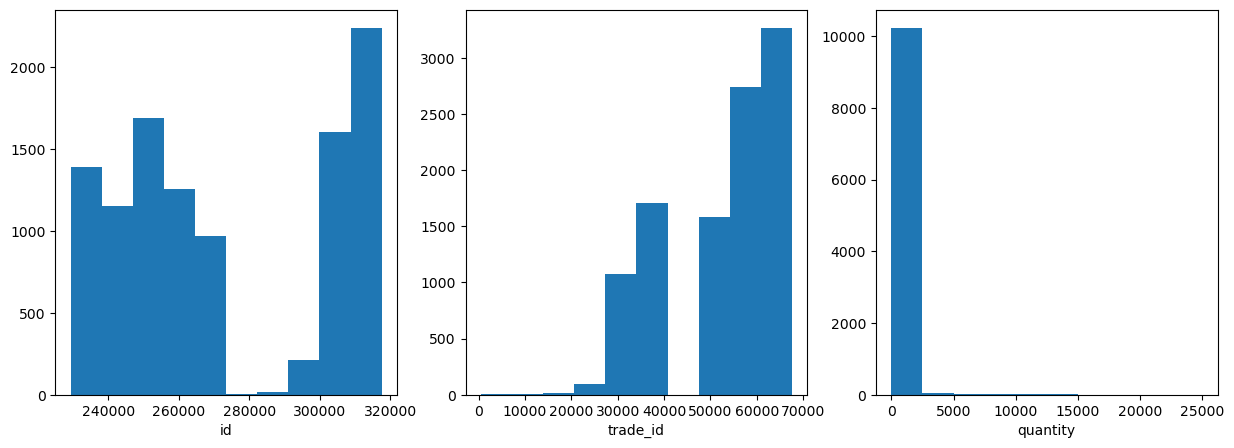

In [11]:
# Cross checking Skewness using Histogram.

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(df['id'])
plt.xlabel('id')

plt.subplot(1,3,2)
plt.hist(df['trade_id'])
plt.xlabel('trade_id')

plt.subplot(1,3,3)
plt.hist(df['quantity'])
plt.xlabel('quantity')

plt.show()

**Quantity Column is Right Skewed.**

In [12]:
print(df[cat_cols].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10520 entries, 0 to 10519
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   target       10520 non-null  object
 1   source       10520 non-null  object
 2   orderYrEst   10516 non-null  object
 3   designation  10520 non-null  object
 4   description  10520 non-null  object
 5   category     10520 non-null  object
dtypes: object(6)
memory usage: 493.3+ KB
None


- **We have few Null Values in OrderYrEst Column.**
- **All Columns are of Object Datatype.**

<class 'pandas.core.series.Series'>
RangeIndex: 10520 entries, 0 to 10519
Series name: target
Non-Null Count  Dtype 
--------------  ----- 
10520 non-null  object
dtypes: object(1)
memory usage: 82.3+ KB
None
Unique values: 208


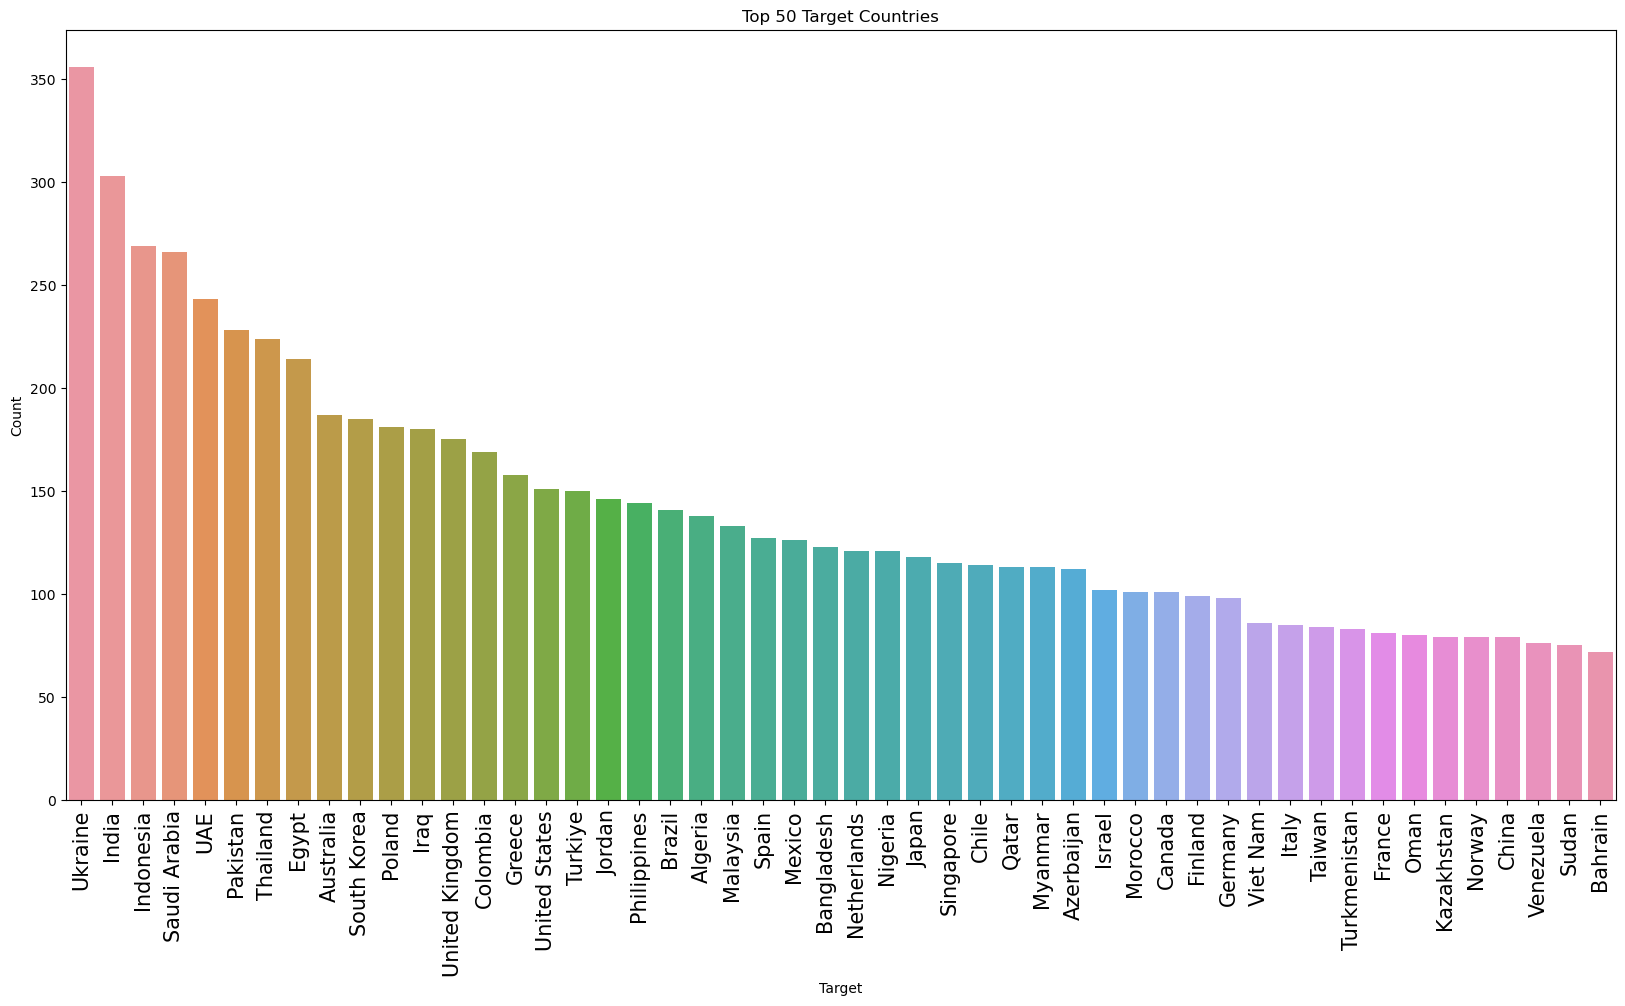

In [13]:
# Display unique values and their counts
print(df['target'].info())
print('Unique values:', df["target"].nunique())

# Get the value counts of the 'description' column
value_counts = df['target'].value_counts()

# Select the top 50 descriptions
top_50 = value_counts.head(50).index

# Filter the DataFrame to include only the top 50 descriptions
df_top_50 = df[df['target'].isin(top_50)]

# Plotting with Seaborn
plt.figure(figsize=(20, 10))  # Adjust figsize for better visualization
sns.countplot(x=df_top_50['target'], order=df_top_50['target'].value_counts().index)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Top 50 Target Countries')
plt.xticks(rotation=90, fontsize=15)  # Rotate and adjust font size for readability

# Show the plot
plt.show()

***In Target column :***
- **All values are in object dtype and no null value is present.**
- **208 Unique Importing/Target countries are there.**
- **Top Importer(by order count) of Military Equipment is Ukraine, followed by India and Indonesia.**

<class 'pandas.core.series.Series'>
RangeIndex: 10520 entries, 0 to 10519
Series name: source
Non-Null Count  Dtype 
--------------  ----- 
10520 non-null  object
dtypes: object(1)
memory usage: 82.3+ KB
None
Unique values: 101


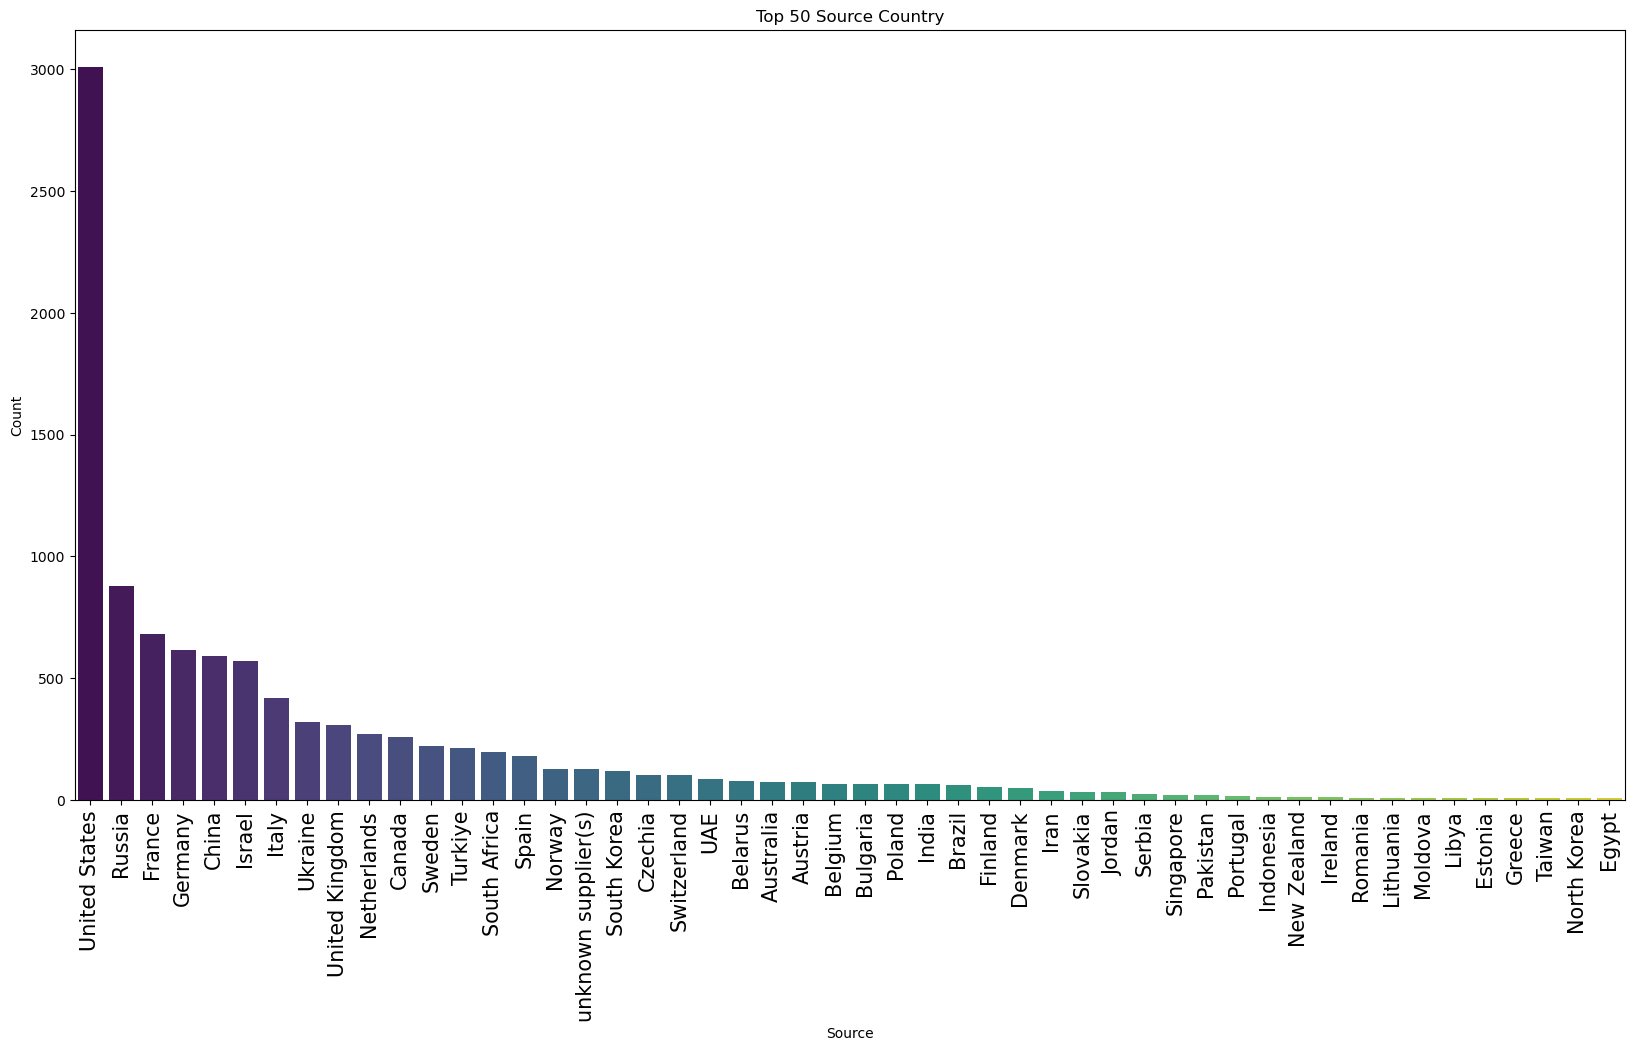

In [14]:
# Display unique values and their counts
print(df['source'].info())
print('Unique values:', df["source"].nunique())

# Get the value counts of the 'description' column
value_counts = df['source'].value_counts()

# Select the top 50 descriptions
top_50 = value_counts.head(50).index

# Filter the DataFrame to include only the top 50 descriptions
df_top_50 = df[df['source'].isin(top_50)]

# Plotting with Seaborn
plt.figure(figsize=(20, 10))  # Adjust figsize for better visualization
sns.countplot(x=df_top_50['source'], order=df_top_50['source'].value_counts().index, palette="viridis")
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Top 50 Source Country')
plt.xticks(rotation=90, fontsize=15)  # Rotate and adjust font size for readability

# Show the plot
plt.show()

***In Source column :***
- **All values are in object dtype and no null value is present.**
- **101 Unique Exporting/Source Countries are there.**
- **Top Exporter(by order count) of Military Equipment is USA, followed by Russia and France.**

<class 'pandas.core.series.Series'>
RangeIndex: 10520 entries, 0 to 10519
Series name: orderYrEst
Non-Null Count  Dtype 
--------------  ----- 
10516 non-null  object
dtypes: object(1)
memory usage: 82.3+ KB
None
Unique values: 2


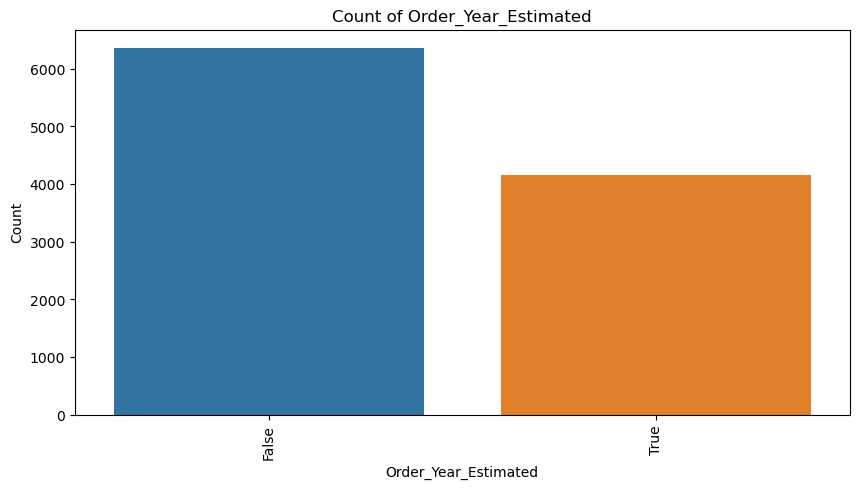

In [15]:
print(df['orderYrEst'].info())
print('Unique values:', df["orderYrEst"].nunique())
# Plotting with Seaborn 
plt.figure(figsize=(10, 5)) 
# Adjust the figsize as needed for better visualization 
sns.countplot(x = df['orderYrEst'], order=df['orderYrEst'].value_counts().index)
plt.xlabel('Order_Year_Estimated')
plt.ylabel('Count')
plt.title('Count of Order_Year_Estimated')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()

***In OrderYrEst Column :***
- **There are some missing values and all values are in object dtype.**

<class 'pandas.core.series.Series'>
RangeIndex: 10520 entries, 0 to 10519
Series name: designation
Non-Null Count  Dtype 
--------------  ----- 
10520 non-null  object
dtypes: object(1)
memory usage: 82.3+ KB
None
Unique values: 2328


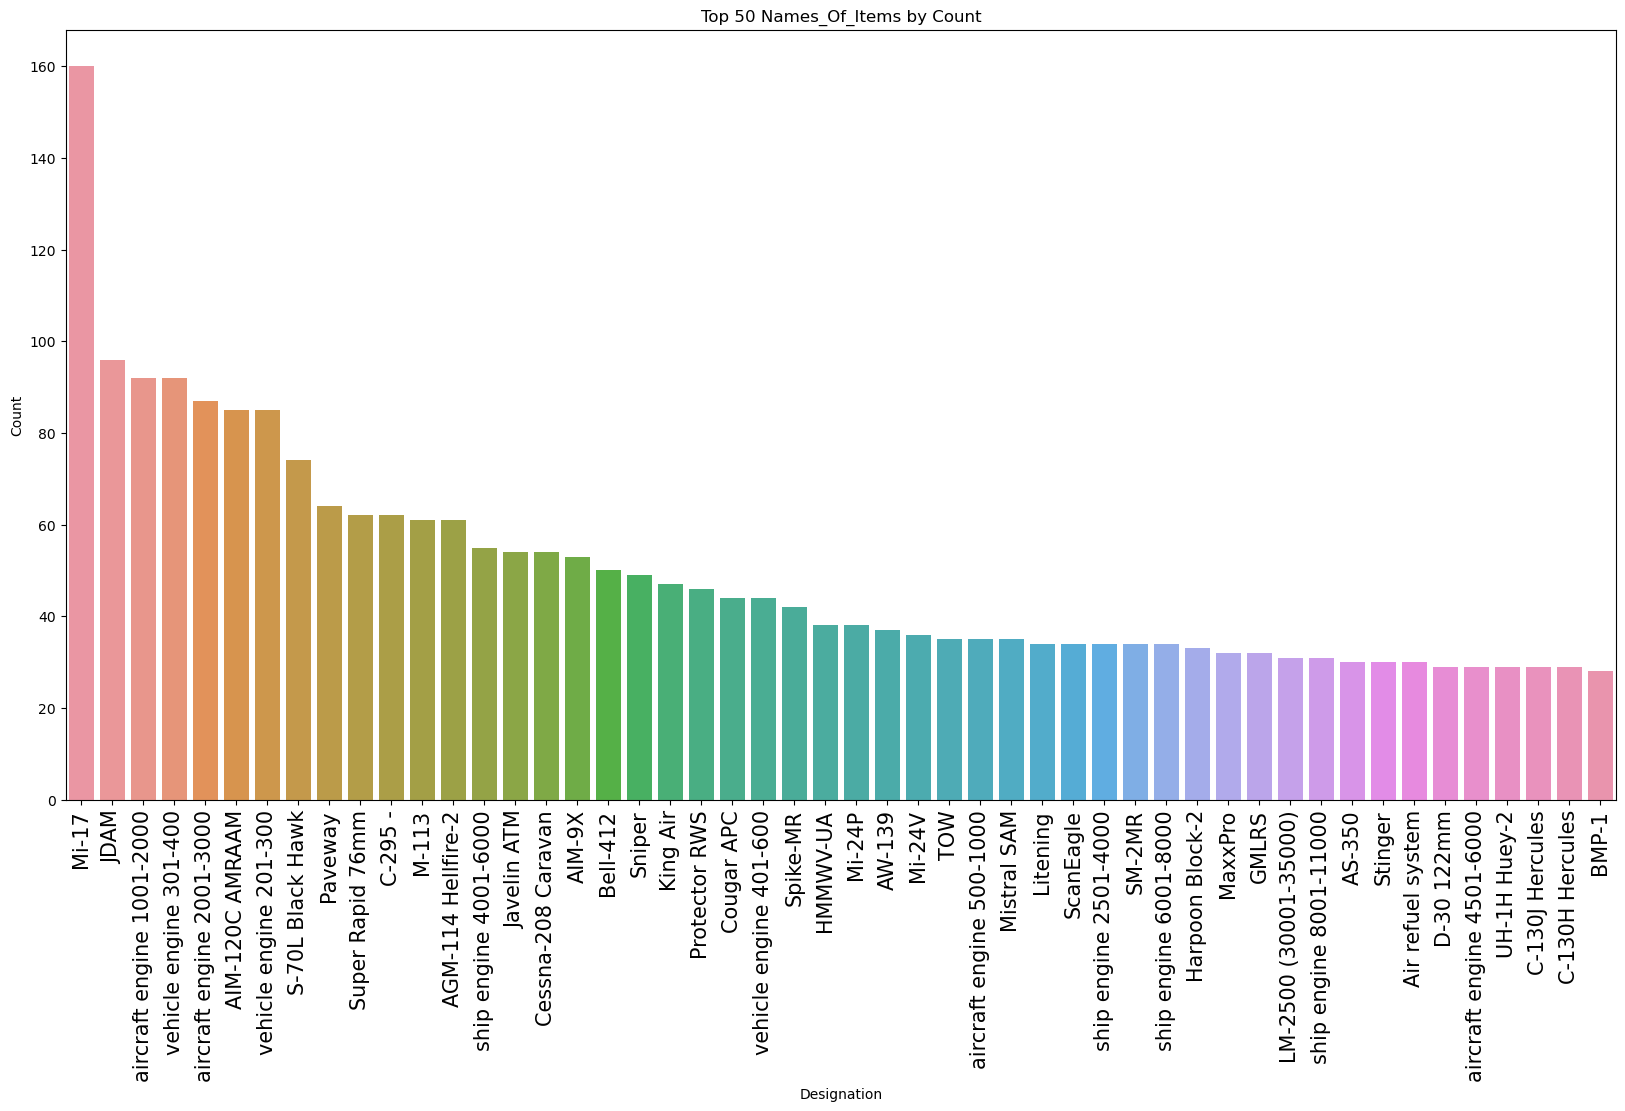

In [16]:
# Display unique values and their counts
print(df['designation'].info())
print('Unique values:', df["designation"].nunique())

# Get the value counts of the 'description' column
value_counts = df['designation'].value_counts()

# Select the top 50 descriptions
top_50 = value_counts.head(50).index

# Filter the DataFrame to include only the top 50 descriptions
df_top_50 = df[df['designation'].isin(top_50)]

# Plotting with Seaborn
plt.figure(figsize=(20, 10))  # Adjust figsize for better visualization
sns.countplot(x=df_top_50['designation'], order=df_top_50['designation'].value_counts().index)
plt.xlabel('Designation')
plt.ylabel('Count')
plt.title('Top 50 Names_Of_Items by Count')
plt.xticks(rotation=90, fontsize=15)  # Rotate and adjust font size for readability

# Show the plot
plt.show()

***In Designation Column :*** 
- **There is no missing value and all values are in object dtype.**
- **In Military Equipment most demanded Items (by order count) is Mi-17, followed by JDAM & Aircraft Engine 1001-2000.**

<class 'pandas.core.series.Series'>
RangeIndex: 10520 entries, 0 to 10519
Series name: description
Non-Null Count  Dtype 
--------------  ----- 
10520 non-null  object
dtypes: object(1)
memory usage: 82.3+ KB
None
Unique values: 192


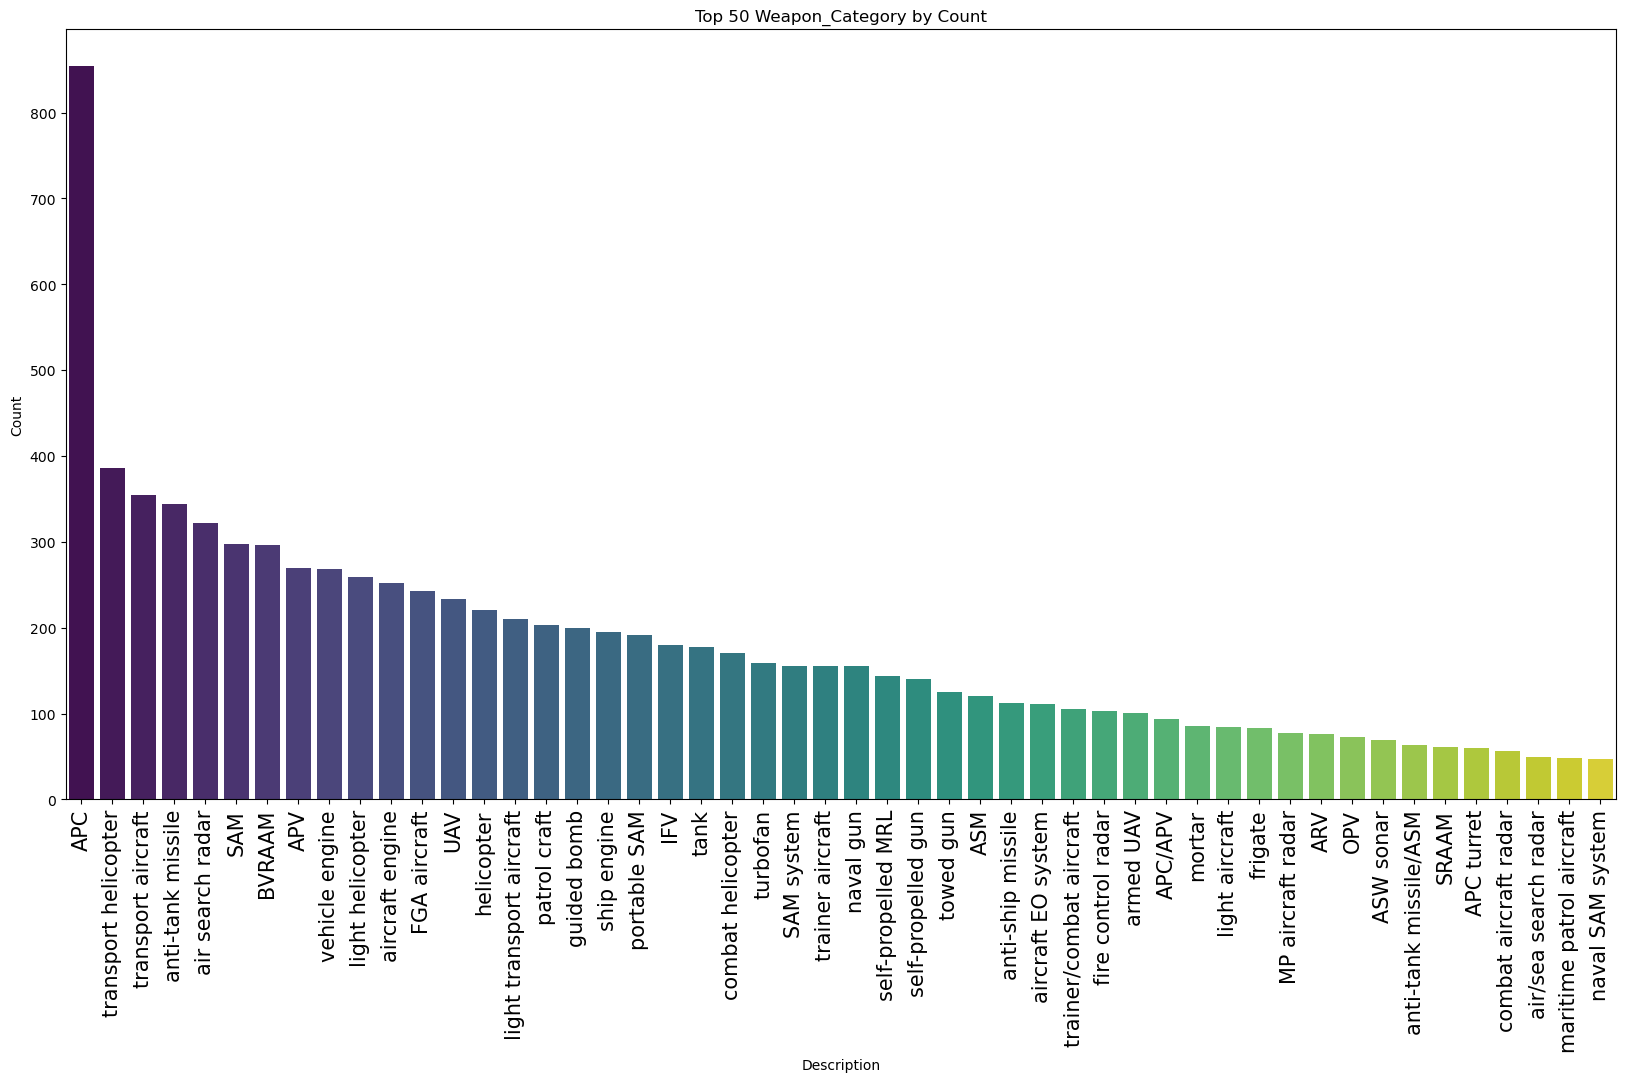

In [17]:
# Display unique values and their counts
print(df['description'].info())
print('Unique values:', df["description"].nunique())

# Get the value counts of the 'description' column
value_counts = df['description'].value_counts()

# Select the top 50 descriptions
top_50 = value_counts.head(50).index

# Filter the DataFrame to include only the top 50 descriptions
df_top_50 = df[df['description'].isin(top_50)]

# Plotting with Seaborn
plt.figure(figsize=(20, 10))  # Adjust figsize for better visualization
sns.countplot(x=df_top_50['description'], order=df_top_50['description'].value_counts().index, palette="viridis")
plt.xlabel('Description')
plt.ylabel('Count')
plt.title('Top 50 Weapon_Category by Count')
plt.xticks(rotation=90, fontsize=15)  # Rotate and adjust font size for readability

# Show the plot
plt.show()

***In Description Column :***
- **There is no missing values and all values are in object dtype.**
- **In Military Equipment Category most demanded weapon category (by order count) is APC, followed by Transport Helicopters & Transport Aircraft.**

<class 'pandas.core.series.Series'>
RangeIndex: 10520 entries, 0 to 10519
Series name: category
Non-Null Count  Dtype 
--------------  ----- 
10520 non-null  object
dtypes: object(1)
memory usage: 82.3+ KB
None
Unique values: 11


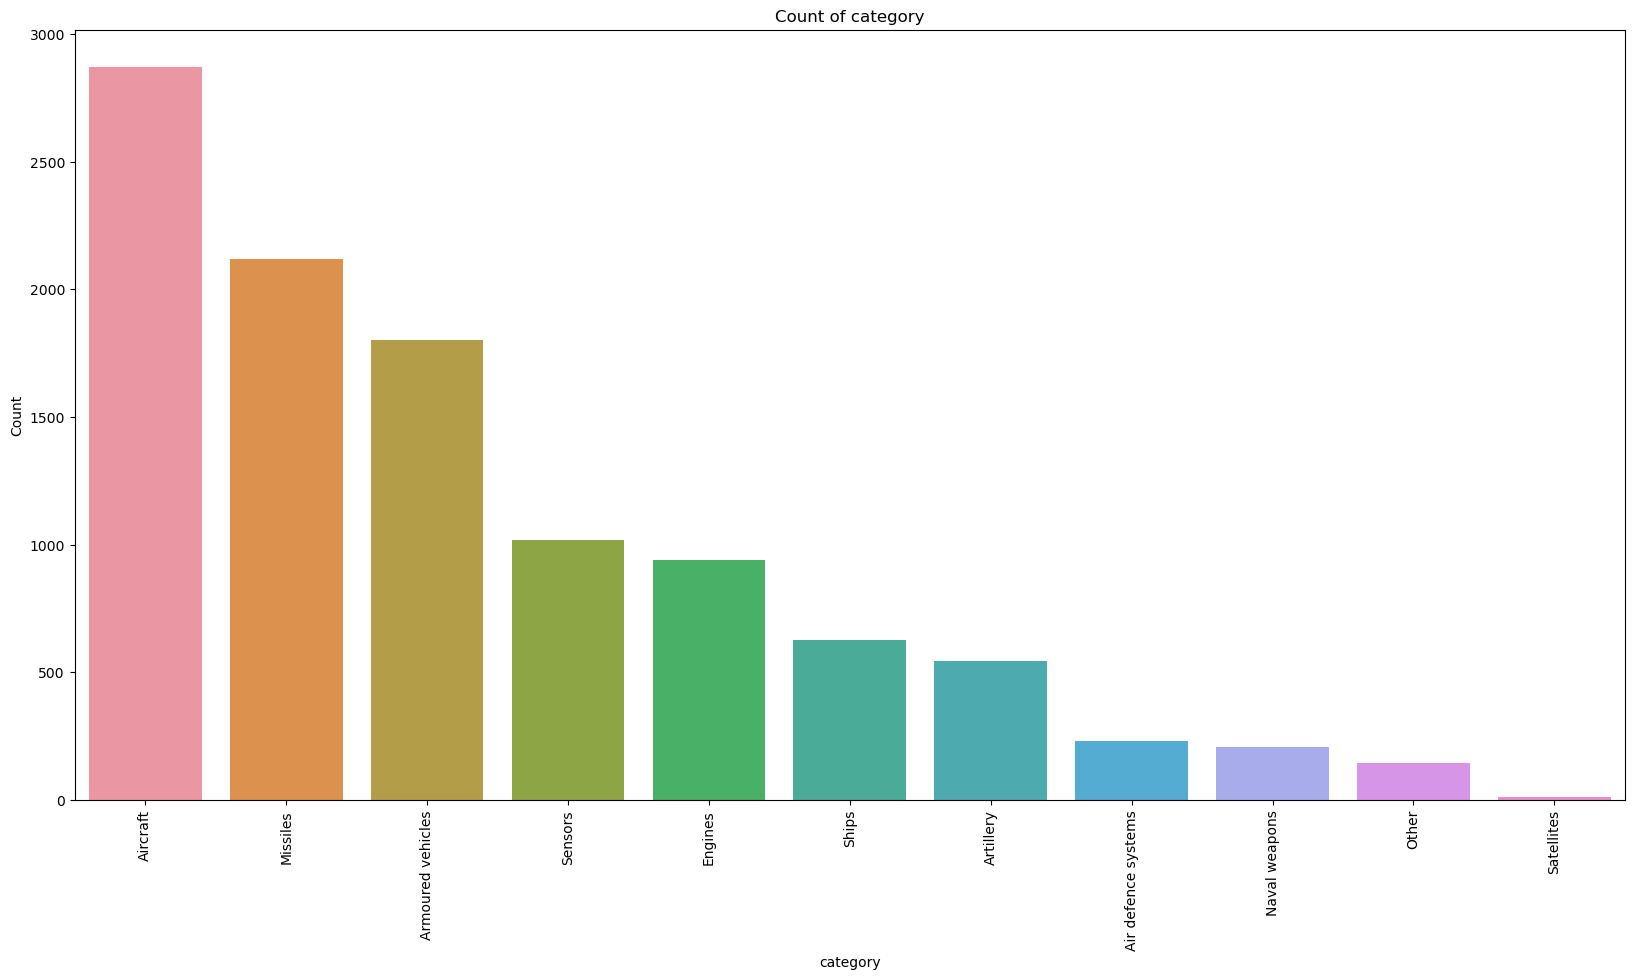

In [18]:
print(df['category'].info())
print('Unique values:', df["category"].nunique())
# Plotting with Seaborn 
plt.figure(figsize=(20,10)) 
# Adjust the figsize as needed for better visualization 
sns.countplot(x = df['category'], order=df['category'].value_counts().index)
plt.xlabel('category')
plt.ylabel('Count')
plt.title('Count of category')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()

***In Category Column :***
- **There is no missing values and all values are in object dtype.**
- **Most demanded category of items (by order count) is Aircraft, followed by Missilles and Armoured Vehicles.**

In [19]:
df['order_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10520 entries, 0 to 10519
Series name: order_date
Non-Null Count  Dtype 
--------------  ----- 
10520 non-null  object
dtypes: object(1)
memory usage: 82.3+ KB


***In Order_date Column :***
- **There is no missing values.**
- **All values are in object dtype which is incorrect dtype.**

In [20]:
df['delivery_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10520 entries, 0 to 10519
Series name: delivery_date
Non-Null Count  Dtype 
--------------  ----- 
8841 non-null   object
dtypes: object(1)
memory usage: 82.3+ KB


***In Delivery_date Column :***
- **There are some missing values.**
- **All values are in object dtype which is incorrect dtype.**

In [21]:
df['source_lat'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10520 entries, 0 to 10519
Series name: source_lat
Non-Null Count  Dtype  
--------------  -----  
10360 non-null  float64
dtypes: float64(1)
memory usage: 82.3 KB


***In Source_lat Column :***
- **There are some missing values and all values are in float dtype.**
- **This column refers to Latitude of Source/Exporter Country.**

In [22]:
df['source_lng'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10520 entries, 0 to 10519
Series name: source_lng
Non-Null Count  Dtype  
--------------  -----  
10360 non-null  float64
dtypes: float64(1)
memory usage: 82.3 KB


***In Source_lng Column :***
- **There are some missing values and all values are in float dtype.**
- **This column refers to Longitude of Source/Exporter Country.**

In [23]:
df['target_lat'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10520 entries, 0 to 10519
Series name: target_lat
Non-Null Count  Dtype  
--------------  -----  
10138 non-null  float64
dtypes: float64(1)
memory usage: 82.3 KB


***In Target_lat Column :***
- **There are some missing values and all values are in float dtype.**
- **This column refers to Latitude of Target/Importer Country.**

In [24]:
df['target_lng'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10520 entries, 0 to 10519
Series name: target_lng
Non-Null Count  Dtype  
--------------  -----  
10138 non-null  float64
dtypes: float64(1)
memory usage: 82.3 KB


***In Target_lng Column :***
- **There are some missing values and all values are in float dtype.**
- **This column refers to Longitude of Target/Importer Country.**

# Data Pre-Processing :

**Data Cleaning**

**1) Checking & Dropping Duplicates**

In [25]:
df.duplicated().sum()

0

**Observation:**
  - In this Dataset We don't have any Duplicated record.

**2) Correcting Data Types :**

In [26]:
# Convert 'order_date' to datetime with timezone handling
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Convert 'delivery_date' to datetime with timezone handling
df['delivery_date'] = pd.to_datetime(df['delivery_date'], errors='coerce')

# Convert 'quantity' to int dtype
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce').astype('Int64')

print(df['order_date'].dtype)
print(df['delivery_date'].dtype)
print(df['quantity'].dtype)

datetime64[ns, UTC]
datetime64[ns, UTC]
Int64


**Data Types of Date Columns are now in DateTime & Quantity Column is now in int dtype**

**Creating Year Columns from Date columns :**
  - As all dates have same Date & Month i.e 01 / 01 in starting , only Years are different.

In [27]:
# Extract only the year from order_date
df['order_year'] = df['order_date'].dt.year.astype('Int64')

# Extract only the year from delivery_date
df['delivery_year'] = df['delivery_date'].dt.year.astype('Int64')

# Drop the original 'order_date' and 'delivery_date' columns
df = df.drop(columns=['order_date', 'delivery_date'])

**3) Dimension Reduction**

**Dropping Un-Important Columns which will not be used in Data Analysis.**

In [28]:
df = df.drop(['id', 'trade_id', 'orderYrEst', 'source_lat', 'source_lng', 'target_lat', 'target_lng'],axis = 1)
df.sample()

target         source  quantity designation description  \
6401  Morocco  United States       146       M-113         APC   

               category  order_year  delivery_year  
6401  Armoured vehicles        2012           2013

**4) Treating Missing/Null Values**

In [29]:
print(df.isnull().sum())

target              0
source              0
quantity          228
designation         0
description         0
category            0
order_year          0
delivery_year    1679
dtype: int64


**We have Null Values in:**
- **quantity Column**
- **delivery_year Column**

In [30]:
# Checking %age of null values :

df.isnull().sum()/len(df)

target           0.000000
source           0.000000
quantity         0.021673
designation      0.000000
description      0.000000
category         0.000000
order_year       0.000000
delivery_year    0.159601
dtype: float64

**%age of missing values is less than 30%, we can't drop any column.**

**Filling Null Values**

In [31]:
# For Continuous Column we fill null values with Median if Outliers are there :

df["quantity"] = df["quantity"].fillna(df["quantity"].median())

# For Delivery Year Continuous Column we fill null values with that corresponding Order Year :

df["delivery_year"] = pd.to_numeric(df["delivery_year"], errors='coerce')
df["order_year"] = pd.to_numeric(df["order_year"], errors='coerce')

df["delivery_year"] = df["delivery_year"].fillna(df["order_year"])

In [32]:
# Rechecking Null Values :

df.isnull().sum()

target           0
source           0
quantity         0
designation      0
description      0
category         0
order_year       0
delivery_year    0
dtype: int64

**All null values are replaced.**

**5) Extracting & Treating Outliers :**

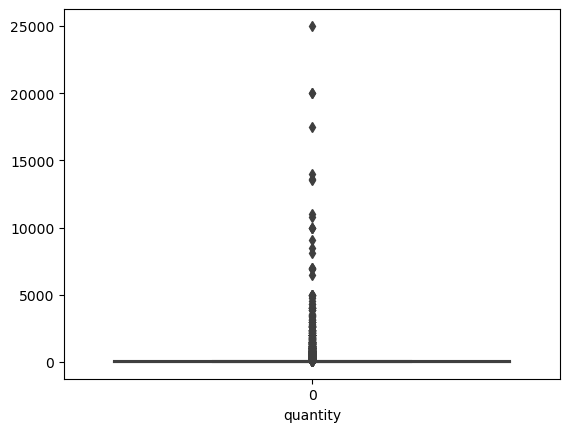

In [33]:
sns.boxplot(df['quantity'])
plt.xlabel('quantity')

plt.show()

**Keeping Outlier for this Dataset.**

# **6) Creating New columns :**

**Creating Continent Column for target & source Countries :** 

In [34]:
# Replacing Incorrect Values in Target Column with Correct Ones :

replacement_dict1 = {
    'NATO**': 'Belgium', 'UAE': 'United Arab Emirates', 'Turkiye': 'Turkey',
    'United Nations**': 'United States', 'Hezbollah (Lebanon)*': 'Lebanon', 'Viet Nam': 'Vietnam',
    'Czechia': 'Czech Republic', 'eSwatini': 'Eswatini', 'Northern Alliance (Afghanistan)*': 'Afghanistan',
    'United Wa State (Myanmar)*': 'Myanmar', 'DR Congo': 'Democratic Republic of the Congo', 'NLA (Macedonia)*': 'North Macedonia',
     'Congo': 'Republic of the Congo', "Cote d'Ivoire": "Ivory Coast", 'LRA (Uganda)*': 'Uganda',
    'unknown recipient(s)': 'Unknown Country', 'African Union**': 'Ethiopia', 'LTTE (Sri Lanka)*': 'Sri Lanka',
    'UIC (Somalia)*': 'Somalia', 'Cabo Verde': 'Cape Verde', 'Hamas (Palestine)*': 'Palestine', 'NTC (Libya)*': 'Libya',
    'Syria rebels*': 'Syria', 'Ukraine Rebels*': 'Ukraine', 'PIJ (Israel/Palestine)*': 'Palestine',
    'PRC (Israel/Palestine)*': 'Palestine', 'Libya HoR*': 'Libya', 'OSCE**': 'Austria', 'Papua New Guinea': 'Papua New Guinea',
    'Micronesia': 'Federated States of Micronesia', 'Libya GNC': 'Libya', 'PKK (Turkiye)*': 'Turkey',
    'Kurdistan Regional Government (Iraq)*': 'Iraq','Houthi rebels (Yemen)*': 'Yemen', 'Darfur rebels (Sudan)*': 'Sudan',
    'Bosnia-Herzegovina': 'Bosnia and Herzegovina',
}

# Inserting Correct values in the 'target' column based on the dictionary 
df['target'] = df['target'].replace(replacement_dict1)

# Replacing Incorrect Values in Source Column with Correct Ones :

replacement_dict2 = {
    'Czechia': 'Czech Republic', 'Turkiye': 'Turkey',
    'Bosnia-Herzegovina': 'Bosnia and Herzegovina', 'UAE': 'United Arab Emirates',
    'Viet Nam': 'Vietnam', 'Libya HoR*': 'Libya', 'European Union**': 'Belgium'
}

# Inserting Correct values in the 'source' column based on the dictionary 
df['source'] = df['source'].replace(replacement_dict2)

# Define values to remove
values_to_remove = ["unknown rebel group*", "unknown supplier(s)", "Unknown Country"]

# Remove rows where 'target' or 'source' contains these values
df = df[~df[['target', 'source']].isin(values_to_remove).any(axis=1)]

# Check unique values after removal
print(df['target'].unique())
print(df['source'].unique())

['Kyrgyzstan' 'Paraguay' 'Greece' 'Belgium' 'China' 'Indonesia' 'Thailand'
 'Qatar' 'Philippines' 'United States' 'Venezuela' 'South Korea'
 'South Africa' 'Brazil' 'Portugal' 'United Arab Emirates' 'Malaysia'
 'Senegal' 'Namibia' 'Saudi Arabia' 'Equatorial Guinea' 'Mauritania'
 'Spain' 'Ethiopia' 'Burundi' 'India' 'Chile' 'Pakistan' 'Japan'
 'Netherlands' 'Syria' 'Turkey' 'United Kingdom' 'Australia' 'Austria'
 'Peru' 'Romania' 'Hungary' 'Sri Lanka' 'Mexico' 'France' 'Germany'
 'Norway' 'Italy' 'New Zealand' 'Oman' 'Kuwait' 'Nigeria' 'Egypt' 'Poland'
 'Lebanon' 'Mauritius' 'Vietnam' 'Singapore' 'Taiwan' 'Finland' 'Ecuador'
 'Algeria' 'Myanmar' 'Yemen' 'Sweden' 'Bangladesh' 'Israel' 'Iraq'
 'Colombia' 'Eritrea' 'Croatia' 'Canada' 'Uruguay' 'Cyprus' 'Denmark'
 'Czech Republic' 'North Macedonia' 'Jordan' 'Switzerland' 'Estonia'
 'Lithuania' 'Slovakia' 'Ireland' 'Belarus' 'Dominican Republic' 'Bahrain'
 'Eswatini' 'Bulgaria' 'Tanzania' 'Argentina' 'Ghana' 'Bolivia'
 'Uzbekistan' 'Angola' 

In [35]:
# Define mapping of countries to continents
importing_continent_map = {
    'Kyrgyzstan': 'Asia', 'Paraguay': 'South America', 'Greece': 'Europe',
    'Belgium': 'Europe', 'China': 'Asia', 'Indonesia': 'Asia',
    'Thailand': 'Asia', 'Qatar': 'Asia', 'Philippines': 'Asia',
    'United States': 'North America', 'Venezuela': 'South America',
    'South Korea': 'Asia', 'South Africa': 'Africa', 'Brazil': 'South America',
    'Portugal': 'Europe', 'United Arab Emirates': 'Asia', 'Malaysia': 'Asia',
    'Senegal': 'Africa', 'Namibia': 'Africa', 'Saudi Arabia': 'Asia',
    'Equatorial Guinea': 'Africa', 'Mauritania': 'Africa', 'Spain': 'Europe',
    'Ethiopia': 'Africa', 'Burundi': 'Africa', 'India': 'Asia', 'Chile': 'South America',
    'Pakistan': 'Asia', 'Japan': 'Asia', 'Netherlands': 'Europe', 'Syria': 'Asia',
    'Turkey': 'Asia', 'United Kingdom': 'Europe', 'Australia': 'Oceania',
    'Austria': 'Europe', 'Peru': 'South America', 'Romania': 'Europe',
    'Hungary': 'Europe', 'Sri Lanka': 'Asia', 'Mexico': 'North America',
    'France': 'Europe', 'Germany': 'Europe', 'Norway': 'Europe', 'Italy': 'Europe',
    'New Zealand': 'Oceania', 'Oman': 'Asia', 'Kuwait': 'Asia', 'Nigeria': 'Africa',
    'Egypt': 'Africa', 'Poland': 'Europe', 'Lebanon': 'Asia', 'Mauritius': 'Africa',
    'Vietnam': 'Asia', 'Singapore': 'Asia', 'Taiwan': 'Asia', 'Finland': 'Europe',
    'Ecuador': 'South America', 'Algeria': 'Africa', 'Myanmar': 'Asia', 'Yemen': 'Asia',
    'Sweden': 'Europe', 'Bangladesh': 'Asia', 'Israel': 'Asia', 'Iraq': 'Asia',
    'Colombia': 'South America', 'Eritrea': 'Africa', 'Croatia': 'Europe', 'Canada': 'North America',
    'Uruguay': 'South America', 'Cyprus': 'Europe', 'Denmark': 'Europe',
    'Czech Republic': 'Europe', 'North Macedonia': 'Europe', 'Jordan': 'Asia',
    'Switzerland': 'Europe', 'Estonia': 'Europe', 'Lithuania': 'Europe',
    'Slovakia': 'Europe', 'Ireland': 'Europe', 'Belarus': 'Europe',
    'Dominican Republic': 'North America', 'Bahrain': 'Asia', 'Eswatini': 'Africa',
    'Bulgaria': 'Europe', 'Tanzania': 'Africa', 'Argentina': 'South America',
    'Ghana': 'Africa', 'Bolivia': 'South America', 'Uzbekistan': 'Asia',
    'Angola': 'Africa', 'Azerbaijan': 'Asia', 'North Korea': 'Asia',
    'Luxembourg': 'Europe', 'Sudan': 'Africa', 'Botswana': 'Africa',
    'Gabon': 'Africa', 'Zimbabwe': 'Africa', 'Slovenia': 'Europe',
    'Rwanda': 'Africa', 'Afghanistan': 'Asia', 'Trinidad and Tobago': 'North America',
    'Latvia': 'Europe', 'Armenia': 'Asia', 'Mali': 'Africa', 'Iran': 'Asia', 'Djibouti': 'Africa',
    'Morocco': 'Africa', 'Georgia': 'Asia', 'Malta': 'Europe',
    'Guinea': 'Africa', 'Chad': 'Africa', 'Uganda': 'Africa', 'Lesotho': 'Africa',
    'Benin': 'Africa', 'Republic of the Congo': 'Africa', 'Tunisia': 'Africa',
    'Ivory Coast': 'Africa', 'Nepal': 'Asia', 'Brunei': 'Asia', 'Kazakhstan': 'Asia',
    'Laos': 'Asia', 'Guyana': 'South America', 'Democratic Republic of the Congo': 'Africa',
    'Cameroon': 'Africa', 'Albania': 'Europe', 'Turkmenistan': 'Asia', 'Zambia': 'Africa',
    'Serbia': 'Europe', 'El Salvador': 'North America', 'Gambia': 'Africa',
    'Bhutan': 'Asia', 'Mozambique': 'Africa', 'Kenya': 'Africa',
    'Palestine': 'Asia', 'Nicaragua': 'North America', 'Burkina Faso': 'Africa',
    'Ukraine': 'Europe', 'Moldova': 'Europe', 'Libya': 'Africa', 'Iceland': 'Europe',
    'Maldives': 'Asia', 'Tajikistan': 'Asia', 'Jamaica': 'North America',
    'Central African Republic': 'Africa', 'Sierra Leone': 'Africa', 'Russia': 'Europe',
    'Somalia': 'Africa', 'Honduras': 'North America', 'Bahamas': 'North America',
    'Cambodia': 'Asia', 'Cape Verde': 'Africa', 'Barbados': 'North America',
    'Niger': 'Africa', 'Comoros': 'Africa', 'South Sudan': 'Africa', 'Mongolia': 'Asia',
    'Seychelles': 'Africa', 'Suriname': 'South America', 'Timor-Leste': 'Asia',
    'Guatemala': 'North America', 'Malawi': 'Africa', 'Togo': 'Africa',
    'Papua New Guinea': 'Oceania', 'Tonga': 'Oceania', 'Solomon Islands': 'Oceania',
    'Fiji': 'Oceania', 'Tuvalu': 'Oceania', 'Kiribati': 'Oceania', 'Samoa': 'Oceania',
    'Vanuatu': 'Oceania', 'Federated States of Micronesia': 'Oceania', 'Palau': 'Oceania',
    'Marshall Islands': 'Oceania', 'Kosovo': 'Europe', 'Western Sahara': 'Africa',
    'Montenegro': 'Europe', 'Costa Rica': 'North America', 'Madagascar': 'Africa',
    'Bosnia and Herzegovina': 'Europe', 'Cuba': 'North America', 'Belize': 'North America',
    'Antigua and Barbuda': 'North America', 'Liberia': 'Africa', 'Unknown Country': 'Unknown'
}

# Function to get continent
def get_importing_continent(country):
    return importing_continent_map.get(country, 'Unknown')  # Assign 'Unknown' if country not in map

# Apply function to create new column
df['Importing_Continent'] = df['target'].apply(get_importing_continent)

# Display DataFrame
df.head()

target         source  quantity            designation  \
0  Kyrgyzstan         Russia         1                  Mi-17   
2    Paraguay          Spain         1                  C-212   
3      Greece  United States         4         APG-78 Longbow   
4     Belgium  United States         5                   RQ-4   
5       China        Germany        48  ship engine 1001-2500   

            description  category  order_year  delivery_year  \
0  transport helicopter  Aircraft        2005           2005   
2    transport aircraft  Aircraft        2003           2004   
3     combat heli radar   Sensors        2003           2007   
4                   UAV  Aircraft        2012           2020   
5           ship engine   Engines        2000           2006   

  Importing_Continent  
0                Asia  
2       South America  
3              Europe  
4              Europe  
5                Asia

In [36]:
# Define mapping of countries to continents
exporting_continent_map = {
    'Russia': 'Europe', 'Spain': 'Europe', 'United States': 'North America',
    'Germany': 'Europe', 'France': 'Europe', 'Poland': 'Europe',
    'Israel': 'Asia', 'Libya': 'Africa', 'Belgium': 'Europe', 'China': 'Asia',
    'Ukraine': 'Europe', 'Japan': 'Asia', 'United Kingdom': 'Europe',
    'Switzerland': 'Europe', 'Romania': 'Europe', 'Sweden': 'Europe',
    'Lebanon': 'Asia', 'Italy': 'Europe', 'Brazil': 'South America',
    'Norway': 'Europe', 'Czech Republic': 'Europe', 'Austria': 'Europe',
    'Netherlands': 'Europe', 'Australia': 'Oceania', 'Pakistan': 'Asia',
    'South Korea': 'Asia', 'South Africa': 'Africa', 'Turkey': 'Asia',
    'Uzbekistan': 'Asia', 'Iran': 'Asia', 'India': 'Asia', 'Hungary': 'Europe',
    'Canada': 'North America', 'Indonesia': 'Asia', 'Finland': 'Europe',
    'Uruguay': 'South America', 'Denmark': 'Europe', 'Slovakia': 'Europe',
    'Bulgaria': 'Europe', 'Argentina': 'South America', 'Singapore': 'Asia',
    'New Zealand': 'Oceania', 'Taiwan': 'Asia', 'Moldova': 'Europe',
    'Greece': 'Europe', 'Bahrain': 'Asia', 'Belarus': 'Europe',
    'Croatia': 'Europe', 'Lithuania': 'Europe', 'Kyrgyzstan': 'Asia',
    'Peru': 'South America', 'Serbia': 'Europe', 'Chile': 'South America',
    'Angola': 'Africa', 'Bosnia and Herzegovina': 'Europe', 'Colombia': 'South America',
    'Portugal': 'Europe', 'Thailand': 'Asia', 'Georgia': 'Asia',
    'Ireland': 'Europe', 'Jordan': 'Asia', 'Venezuela': 'South America',
    'United Arab Emirates': 'Asia', 'Malta': 'Europe', 'Kazakhstan': 'Asia',
    'Oman': 'Asia', 'Malaysia': 'Asia', 'Syria': 'Asia', 'Qatar': 'Asia',
    'Zimbabwe': 'Africa', 'Eritrea': 'Africa', 'Montenegro': 'Europe',
    'Vietnam': 'Asia', 'Philippines': 'Asia', 'Costa Rica': 'North America',
    'North Korea': 'Asia', 'Luxembourg': 'Europe', 'Brunei': 'Asia',
    'Saudi Arabia': 'Asia', 'Ghana': 'Africa', 'Albania': 'Europe',
    'Armenia': 'Asia', 'Ecuador': 'South America', 'Sudan': 'Africa',
    'Egypt': 'Africa', 'Estonia': 'Europe', 'Bahamas': 'North America',
    'Uganda': 'Africa', 'Algeria': 'Africa', 'Slovenia': 'Europe',
    'Dominican Republic': 'North America', 'Mexico': 'North America',
    'Panama': 'North America', 'Nigeria': 'Africa', 'Cyprus': 'Europe',
    'Latvia': 'Europe', 'North Macedonia': 'Europe', 'Morocco': 'Africa'
}

# Function to get exporting continent
def get_exporting_continent(country):
    return exporting_continent_map.get(country, 'Unknown')  # Assign 'Unknown' if country not in map

# Apply function to create new column
df['Exporting_Continent'] = df['source'].apply(get_exporting_continent)

# Display DataFrame
df.head()

target         source  quantity            designation  \
0  Kyrgyzstan         Russia         1                  Mi-17   
2    Paraguay          Spain         1                  C-212   
3      Greece  United States         4         APG-78 Longbow   
4     Belgium  United States         5                   RQ-4   
5       China        Germany        48  ship engine 1001-2500   

            description  category  order_year  delivery_year  \
0  transport helicopter  Aircraft        2005           2005   
2    transport aircraft  Aircraft        2003           2004   
3     combat heli radar   Sensors        2003           2007   
4                   UAV  Aircraft        2012           2020   
5           ship engine   Engines        2000           2006   

  Importing_Continent Exporting_Continent  
0                Asia              Europe  
2       South America              Europe  
3              Europe       North America  
4              Europe       North America  
5                Asia              Europe

**6) Renaming Columns as per Syntax :**

In [37]:
df.rename(columns={'target': 'Importing_Country'}, inplace=True)
df.rename(columns={'source': 'Exporting_Country'}, inplace=True)
df.rename(columns={'order_year': 'Order_Year'}, inplace=True)
df.rename(columns={'quantity': 'No_Of_Quantity'}, inplace=True)
df.rename(columns={'delivery_year': 'Delivery_Year'}, inplace=True)
df.rename(columns={'designation': 'Name_of_Item'}, inplace=True)
df.rename(columns={'description': 'Item_Category'}, inplace=True)
df.rename(columns={'category': 'Item_Weapon_Category'}, inplace=True)

# Reorder columns as needed
df = df[['Importing_Country', 'Exporting_Country', 'Order_Year', 'Delivery_Year', 'No_Of_Quantity',
         'Name_of_Item', 'Item_Category', 'Item_Weapon_Category','Importing_Continent','Exporting_Continent']]

df

Importing_Country Exporting_Country  Order_Year  Delivery_Year  \
0                Kyrgyzstan            Russia        2005           2005   
2                  Paraguay             Spain        2003           2004   
3                    Greece     United States        2003           2007   
4                   Belgium     United States        2012           2020   
5                     China           Germany        2000           2006   
...                     ...               ...         ...            ...   
10515                Guyana     United States        2021           2023   
10516  United Arab Emirates            Israel        2022           2022   
10517  United Arab Emirates            Israel        2022           2022   
10518          Saudi Arabia       South Korea        2022           2022   
10519          Saudi Arabia       South Korea        2022           2022   

       No_Of_Quantity           Name_of_Item         Item_Category  \
0                   1                  Mi-17  transport helicopter   
2                   1                  C-212    transport aircraft   
3                   4         APG-78 Longbow     combat heli radar   
4                   5                   RQ-4                   UAV   
5                  48  ship engine 1001-2500           ship engine   
...               ...                    ...                   ...   
10515               1            Defiant-115          patrol craft   
10516              10                  Derby                BVRAAM   
10517              10               Python-5                BVRAAM   
10518              10              Cheongung            SAM system   
10519            1000           Cheongung MI                   SAM   

      Item_Weapon_Category Importing_Continent Exporting_Continent  
0                 Aircraft                Asia              Europe  
2                 Aircraft       South America              Europe  
3                  Sensors              Europe       North America  
4                 Aircraft              Europe       North America  
5                  Engines                Asia              Europe  
...                    ...                 ...                 ...  
10515                Ships       South America       North America  
10516             Missiles                Asia                Asia  
10517             Missiles                Asia                Asia  
10518  Air defence systems                Asia                Asia  
10519             Missiles                Asia                Asia  

[10327 rows x 10 columns]

**We have 10 Columns with 10347 Rows.**

In [38]:
Conti_Cols = ['Order_Year','Delivery_Year','No_Of_Quantity']
Categorical_cols = ['Importing_Country','Exporting_Country','Name_of_Item','Item_Category','Item_Weapon_Category','Importing_Continent','Exporting_Continent']

**We have 3 Continuous Col & 7 Discrete_Categorical Col.**

# Data Pre-Processing is completed.

In [39]:
# Converting Cleaned Data to Excel. 

# df.to_excel('SIPRI1.xlsx')

# Data Analysis :

# 1
**Top 20 Importing Country and their Top Exporter :** (Order Count Wise)

In [40]:
# Count occurrences of each importing country
top_importing_counts = df['Importing_Country'].value_counts().head(20)

# Create a DataFrame for the plot
top_20_importing = pd.DataFrame({
    'Importing Country': top_importing_counts.index,
    'Import Count': top_importing_counts.values
})

# Find the top exporter for each top importing country and their count
top_20_exporter_counts = []
for country in top_20_importing['Importing Country']:
    top_exporter = df[df['Importing_Country'] == country]['Exporting_Country'].value_counts().idxmax()
    export_count = df[(df['Importing_Country'] == country) & (df['Exporting_Country'] == top_exporter)].shape[0]
    top_20_exporter_counts.append((country, top_exporter, export_count))

top_20_exporters = pd.DataFrame(top_20_exporter_counts, columns=['Importing Country', 'Top Export Partner', 'Export Count'])

# Merge these DataFrames for plotting
plot_data = top_20_importing.merge(top_20_exporters, on='Importing Country')

print(plot_data)

       Importing Country  Import Count Top Export Partner  Export Count
0                Ukraine           357      United States            68
1                  India           301             Russia            83
2              Indonesia           268      United States            44
3           Saudi Arabia           264      United States           113
4   United Arab Emirates           241      United States            83
5               Pakistan           228              China            70
6               Thailand           224      United States            54
7                  Egypt           214      United States            78
8              Australia           187      United States           113
9            South Korea           184      United States           123
10                Poland           181      United States            74
11                  Iraq           177      United States            83
12        United Kingdom           175      United States       

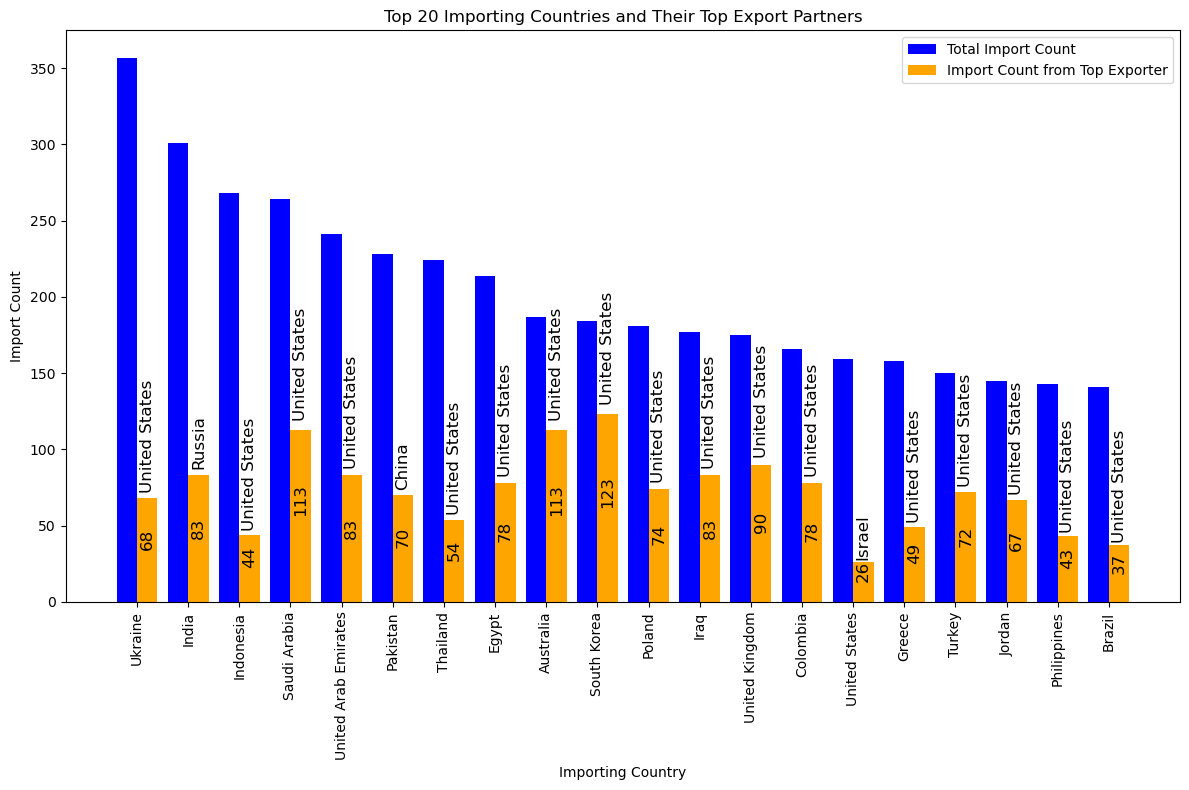

In [41]:
# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Indices for locating the bars
indices = np.arange(len(plot_data))

# Width of the bars
width = 0.4

# Plotting the data
bars1 = ax.bar(indices - width/2, plot_data['Import Count'], width, color='blue', label='Total Import Count')
bars2 = ax.bar(indices + width/2, plot_data['Export Count'], width, color='orange', label='Import Count from Top Exporter')

# Customize the plot
ax.set_title('Top 20 Importing Countries and Their Top Export Partners')
ax.set_ylabel('Import Count')
ax.set_xlabel('Importing Country')
ax.set_xticks(indices)
ax.set_xticklabels(plot_data['Importing Country'], rotation=90)
ax.legend()

# Add annotations for export partners and export counts slightly staggered
for i, (bar2, partner) in enumerate(zip(bars2, plot_data['Top Export Partner'])):
    # Top export partner name slightly above the bar
    ax.text(bar2.get_x() + bar2.get_width() / 2, bar2.get_height() * 1.05, partner, ha='center', va='bottom', fontsize=12,rotation = 90, color='black')
    # Export count slightly above the export partner name
    ax.text(bar2.get_x() + bar2.get_width() / 2, bar2.get_height() * 0.5, str(plot_data['Export Count'][i]), ha='center', va='bottom', fontsize=12,rotation = 90, color='black')

plt.tight_layout()
plt.show()

# Observation :
- US is the dominant exporter to majority of top importers.
- Countries with regional dependencies:
   - India heavily relies on Russia.
   - Pakistan prefers China.
- US-Saudi Arabia tops in order count, showing a strong strategic tie.

# 2
**Top 20 Importing Country and their Top Exporter :** (Quantity Order)

In [42]:
# Step 1: Calculate the top 20 importing countries based on 'No_Of_Quantity'
top_importing_quantities = df.groupby('Importing_Country')['No_Of_Quantity'].sum().sort_values(ascending=False).head(20)

# Create a DataFrame for the plot (top 20 importing countries)
top_20_importing = pd.DataFrame({
    'Importing Country': top_importing_quantities.index,
    'Import Quantity': top_importing_quantities.values
})

# Step 2: Find the top exporter for each importing country and their quantity
top_20_exporter_quantities = []
for country in top_20_importing['Importing Country']:
    # For each importing country, get the top exporter based on No_Of_Quantity
    top_exporter = df[df['Importing_Country'] == country].groupby('Exporting_Country')['No_Of_Quantity'].sum().idxmax()
    export_quantity = df[(df['Importing_Country'] == country) & (df['Exporting_Country'] == top_exporter)]['No_Of_Quantity'].sum()
    top_20_exporter_quantities.append((country, top_exporter, export_quantity))

# Step 3: Create a DataFrame for the top exporters
top_20_exporters = pd.DataFrame(top_20_exporter_quantities, columns=['Importing Country', 'Top Export Partner', 'Export Quantity'])

# Step 4: Merge the importing and exporting data for plotting
plot_data = top_20_importing.merge(top_20_exporters, on='Importing Country')

# Display the merged DataFrame
print(plot_data)

       Importing Country  Import Quantity Top Export Partner  Export Quantity
0           Saudi Arabia           104388      United States            78339
1                Ukraine            93272      United States            63562
2                  India            89635             Russia            74328
3   United Arab Emirates            69447      United States            48202
4                 Poland            54307      United States            19514
5         United Kingdom            49155      United States            23756
6                 Israel            42874      United States            40976
7          United States            38584             Norway            17792
8                   Iraq            37870      United States            26321
9                  Egypt            27332      United States            15086
10              Pakistan            26556      United States            11534
11             Australia            24827      United States    

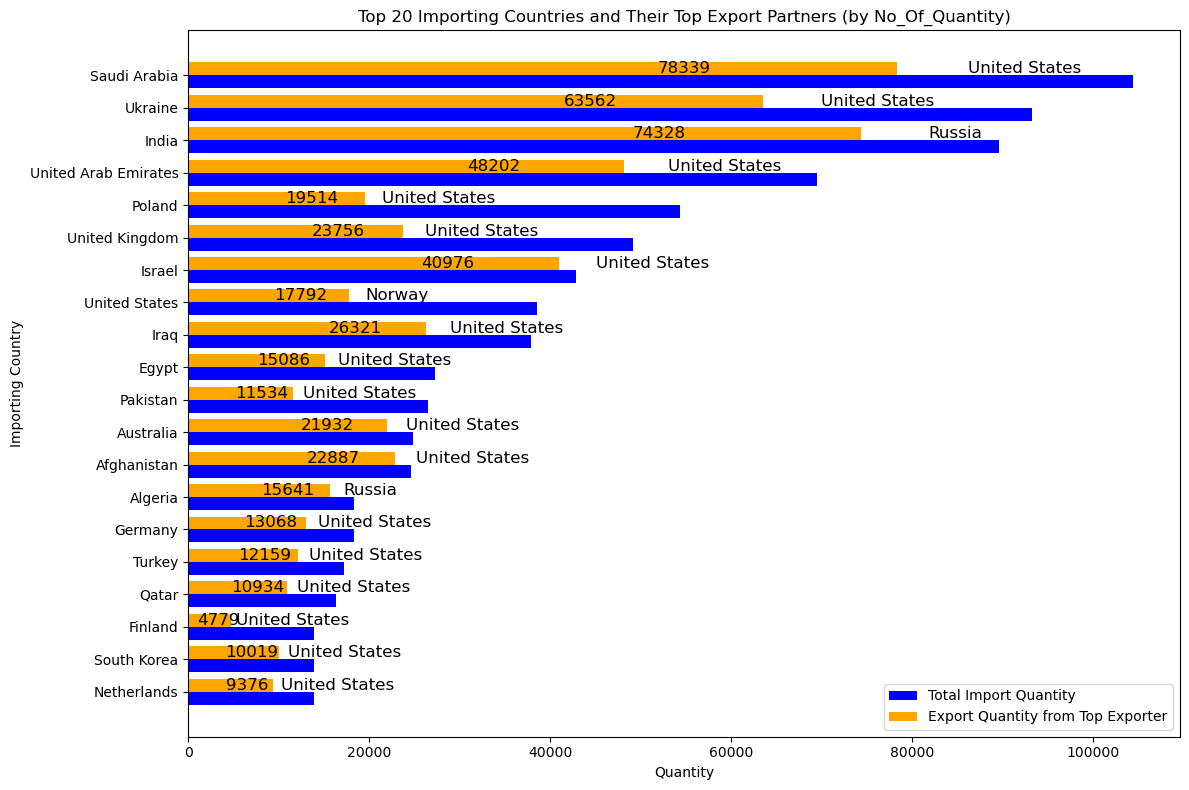

In [43]:
# Sort data by Import Quantity in descending order
plot_data = plot_data.sort_values(by='Import Quantity', ascending=True)  # Ascending for correct barh ordering

# Indices for locating the bars
indices = np.arange(len(plot_data))

# Width of the bars
width = 0.4

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the data as horizontal bars
bars1 = ax.barh(indices - width/2, plot_data['Import Quantity'], height=width, color='blue', label='Total Import Quantity')
bars2 = ax.barh(indices + width/2, plot_data['Export Quantity'], height=width, color='orange', label='Export Quantity from Top Exporter')

# Customize the plot
ax.set_title('Top 20 Importing Countries and Their Top Export Partners (by No_Of_Quantity)')
ax.set_xlabel('Quantity')
ax.set_ylabel('Importing Country')
ax.set_yticks(indices)
ax.set_yticklabels(plot_data['Importing Country'])  # Countries on y-axis
ax.legend()

# Add annotations for export quantity and export partner names
for i, (bar2, partner) in enumerate(zip(bars2, plot_data['Top Export Partner'])):
    # Export partner name slightly to the right of the bar
    ax.text(bar2.get_width() * 1.10, bar2.get_y() + bar2.get_height() / 2, partner, 
            ha='left', va='center', fontsize=12, color='black')

    # Export quantity slightly inside the bar
    ax.text(bar2.get_width() * 0.7, bar2.get_y() + bar2.get_height() / 2, 
            str(plot_data['Export Quantity'].iloc[i]), ha='center', va='center', 
            fontsize=12, color='black')

plt.tight_layout()
plt.show()

# Observation :

- US & Russia dominate by volume, supplying bulk of global arms.
- US-Saudi Arabia is the largest single-volume relationship.

# 3
**Top 20 Exporting Country and their Top Importer :** (Order Count Wise)

In [44]:
# Count occurrences of each exporting country
top_exporting_counts = df['Exporting_Country'].value_counts().head(20)

# Create a DataFrame for the plot
top_20_exporting = pd.DataFrame({
    'Exporting Country': top_exporting_counts.index,
    'Export Count': top_exporting_counts.values
})

# Find the top importer for each top exporting country and their count
top_20_importer_counts = []
for country in top_20_exporting['Exporting Country']:
    top_importer = df[df['Exporting_Country'] == country]['Importing_Country'].value_counts().idxmax()
    import_count = df[(df['Exporting_Country'] == country) & (df['Importing_Country'] == top_importer)].shape[0]
    top_20_importer_counts.append((country, top_importer, import_count))

top_20_importers = pd.DataFrame(top_20_importer_counts, columns=['Exporting Country', 'Top Import Partner', 'Import Count'])

# Merge these DataFrames for plotting
plot_data = top_20_exporting.merge(top_20_importers, on='Exporting Country')

print(plot_data)

       Exporting Country  Export Count    Top Import Partner  Import Count
0          United States          3004           South Korea           123
1                 Russia           878                 India            83
2                 France           681             Indonesia            40
3                Germany           613               Ukraine            31
4                  China           589              Pakistan            70
5                 Israel           546                 India            75
6                  Italy           415                Turkey            18
7                Ukraine           318            Azerbaijan            21
8         United Kingdom           307               Ukraine            33
9            Netherlands           272                Greece            20
10                Canada           259         United States            15
11                Sweden           216               Finland            27
12                Turkey 

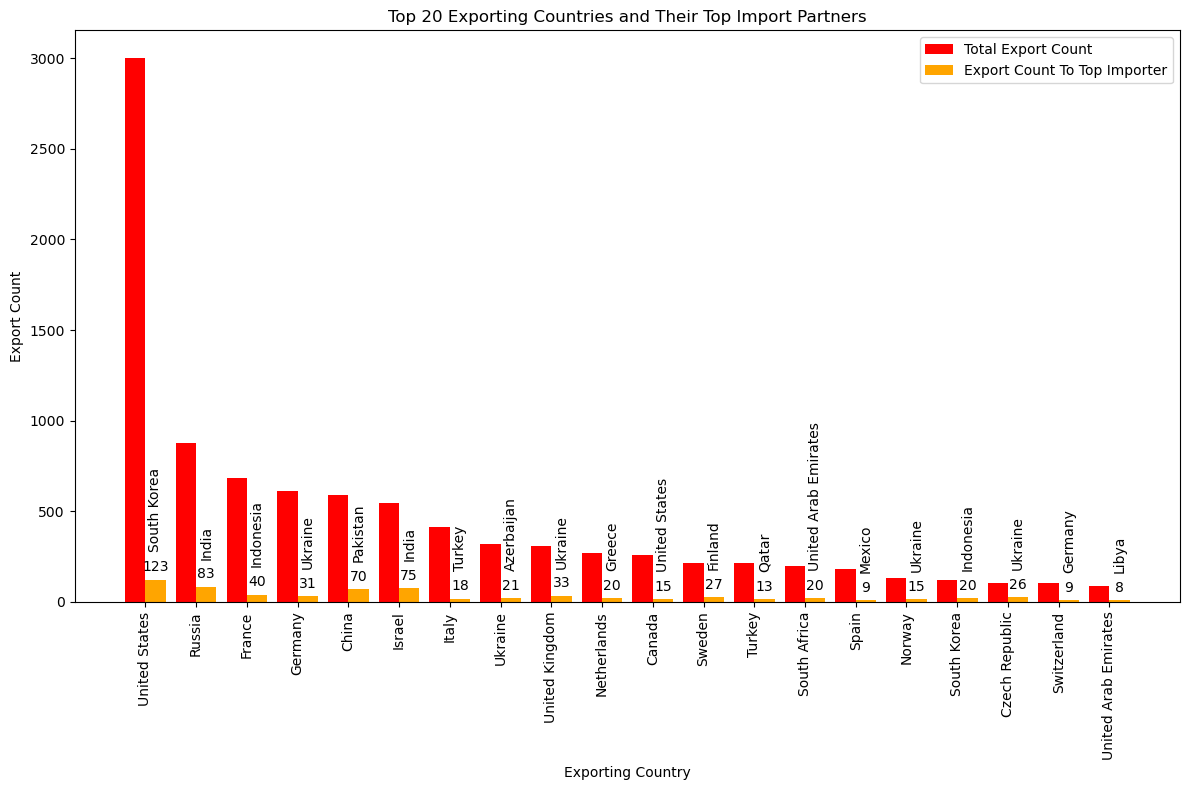

In [45]:
# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Indices for locating the bars
indices = np.arange(len(plot_data))

# Width of the bars
width = 0.4

# Plotting the data
bars1 = ax.bar(indices - width/2, plot_data['Export Count'], width, color='red', label='Total Export Count')
bars2 = ax.bar(indices + width/2, plot_data['Import Count'], width, color='orange', label='Export Count To Top Importer')

# Customize the plot
ax.set_title('Top 20 Exporting Countries and Their Top Import Partners')
ax.set_ylabel('Export Count')
ax.set_xlabel('Exporting Country')
ax.set_xticks(indices)
ax.set_xticklabels(plot_data['Exporting Country'], rotation=90)
ax.legend()

# Add annotations for import partners and import counts
partner_offset = 150  # Adjust this value as needed
count_offset = 30  # Adjust this value as needed

for i, (bar2, partner) in enumerate(zip(bars2, plot_data['Top Import Partner'])):
    # Top import partner name at fixed offset above the bar
    ax.text(bar2.get_x() + bar2.get_width() / 2, bar2.get_height() + partner_offset, partner, ha='center', va='bottom', fontsize=10, rotation=90, color='black')
    # Import count at a further fixed offset above the import partner name
    ax.text(bar2.get_x() + bar2.get_width() / 2, bar2.get_height() + count_offset, str(plot_data['Import Count'][i]), ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# Observation :

- US has the widest customer base — strong export network.
- Russia’s exports highly concentrated to India.
- China’s focus on Pakistan shows regional security priorities.

# 4
**Top 20 Exporting Country and their Top Importer :** (Quantity Order)

In [46]:
# Step 1: Calculate the top 20 exporting countries based on 'No_Of_Quantity'
top_exporting_quantities = df.groupby('Exporting_Country')['No_Of_Quantity'].sum().sort_values(ascending=False).head(20)

# Create a DataFrame for the top 20 exporting countries
top_20_exporting = pd.DataFrame({
    'Exporting Country': top_exporting_quantities.index,
    'Export Quantity': top_exporting_quantities.values
})

# Step 2: Find the top importer for each exporting country and their quantity
top_20_importer_quantities = []
for country in top_20_exporting['Exporting Country']:
    # Get the top importer based on No_Of_Quantity
    top_importer = df[df['Exporting_Country'] == country].groupby('Importing_Country')['No_Of_Quantity'].sum().idxmax()
    import_quantity = df[(df['Exporting_Country'] == country) & (df['Importing_Country'] == top_importer)]['No_Of_Quantity'].sum()
    top_20_importer_quantities.append((country, top_importer, import_quantity))

# Step 3: Create a DataFrame for the top exporters
top_20_importers = pd.DataFrame(top_20_importer_quantities, columns=['Exporting Country', 'Top Import Partner', 'Import Quantity'])

# Step 4: Merge the exporting and importing data for plotting
plot_data = top_20_exporting.merge(top_20_importers, on='Exporting Country')

# Display the merged DataFrame
plot_data

Exporting Country  Export Quantity    Top Import Partner  \
0          United States           554986          Saudi Arabia   
1                 Russia           162138                 India   
2                 Israel            60641                Poland   
3                 Sweden            41374        United Kingdom   
4                Germany            35818               Ukraine   
5         United Kingdom            32764               Ukraine   
6                 France            30764          Saudi Arabia   
7                  China            27978              Pakistan   
8                 Norway            22491         United States   
9                Ukraine            18184          Saudi Arabia   
10           South Korea            16389                Poland   
11          South Africa            15287  United Arab Emirates   
12                Turkey            12520  United Arab Emirates   
13                 Italy            11160              Pakistan   
14                Canada            10724         United States   
15              Bulgaria             5995          Saudi Arabia   
16  United Arab Emirates             5213                 Egypt   
17           Netherlands             4691                 Egypt   
18                Poland             4422               Ukraine   
19                 Spain             3259  United Arab Emirates   

    Import Quantity  
0             78339  
1             74328  
2             13697  
3             21291  
4              5757  
5             12093  
6              5242  
7             10517  
8             17792  
9              3070  
10            12538  
11             6884  
12             2493  
13             1883  
14             4386  
15             2224  
16             2022  
17             1060  
18             2038  
19             1321

# Observation :

- US leads by total volume exported globally.
- Russia’s bulk deals with India dominate its export strategy.
- Israel specializes in fewer, higher-volume deals with niche technology

# 5
**Top 3 Importing Country who Ordered Most Year-Wise :**

In [47]:
# Step 1: Aggregate data by Importing Country and Order Year to get total quantity
agg_data = df.groupby(['Importing_Country', 'Order_Year'])['No_Of_Quantity'].sum().reset_index(name='Total_Quantity')

# Step 2: Sort the data by Order Year and Total Quantity (Descending order for quantity)
agg_data_sorted = agg_data.sort_values(by=['Order_Year', 'Total_Quantity'], ascending=[True, False])

# Step 3: Extract the top 3 importing countries based on total quantity for each year
top_3_importing_by_quantity = []

for year in agg_data_sorted['Order_Year'].unique():
    year_data = agg_data_sorted[agg_data_sorted['Order_Year'] == year]
    
    # Top 3 countries (handle cases where there are less than 3)
    top_countries = year_data.head(3)
    
    top_3_importing_by_quantity.append({
        'Order_Year': year,
        'Top_Importing_Country': top_countries.iloc[0]['Importing_Country'] if len(top_countries) > 0 else None,
        'Top_Quantity': top_countries.iloc[0]['Total_Quantity'] if len(top_countries) > 0 else None,
        'Second_Top_Importing_Country': top_countries.iloc[1]['Importing_Country'] if len(top_countries) > 1 else None,
        'Second_Top_Quantity': top_countries.iloc[1]['Total_Quantity'] if len(top_countries) > 1 else None,
        'Third_Top_Importing_Country': top_countries.iloc[2]['Importing_Country'] if len(top_countries) > 2 else None,
        'Third_Top_Quantity': top_countries.iloc[2]['Total_Quantity'] if len(top_countries) > 2 else None
    })

# Step 4: Convert the result to a DataFrame for better readability
top_3_importing_df = pd.DataFrame(top_3_importing_by_quantity)

# Display the result
top_3_importing_df

Order_Year Top_Importing_Country  Top_Quantity  \
0         2000         United States          3189   
1         2001                 India          3214   
2         2002        United Kingdom         14051   
3         2003        United Kingdom          6576   
4         2004              Pakistan          2471   
5         2005                  Iraq         10005   
6         2006              Pakistan          4209   
7         2007         United States          6597   
8         2008           Afghanistan          4910   
9         2009                 Egypt          7237   
10        2010           Afghanistan          6821   
11        2011          Saudi Arabia         10682   
12        2012                 India         11730   
13        2013                 India         25623   
14        2014          Saudi Arabia         20203   
15        2015          Saudi Arabia         14111   
16        2016  United Arab Emirates          3883   
17        2017  United Arab Emirates         22630   
18        2018                 Qatar          6181   
19        2019          Saudi Arabia         20507   
20        2020               Germany          2517   
21        2021                 India         18281   
22        2022               Ukraine         86744   
23        2023                Poland         27823   

   Second_Top_Importing_Country  Second_Top_Quantity  \
0                  Saudi Arabia                 2614   
1                   Netherlands                 2400   
2                        Israel                 3922   
3                        Poland                 4532   
4                        Israel                 1570   
5                       Algeria                 4414   
6                       Algeria                 2839   
7                      Pakistan                 4777   
8          United Arab Emirates                 4381   
9                  Saudi Arabia                 4605   
10                 Saudi Arabia                 3477   
11                       Canada                 2599   
12                       Israel                 5468   
13                 Saudi Arabia                 7723   
14                         Iraq                13016   
15         United Arab Emirates                 5806   
16                 Saudi Arabia                 3708   
17                  Afghanistan                 6335   
18                United States                 5387   
19                        India                 8860   
20                        India                 1325   
21                       Israel                 2820   
22                       Poland                13965   
23                      Ukraine                 4865   

   Third_Top_Importing_Country  Third_Top_Quantity  
0                       Israel                2601  
1               United Kingdom                1656  
2                  Switzerland                3000  
3                        India                3140  
4               United Kingdom                1445  
5               United Kingdom                2907  
6                        Spain                2820  
7                       Canada                2656  
8                       Kuwait                3591  
9                United States                4331  
10                    Pakistan                1550  
11                  Azerbaijan                2573  
12               United States                3091  
13                   Australia                4724  
14        United Arab Emirates               11657  
15                       Egypt                4962  
16                   Australia                3545  
17                Saudi Arabia                4838  
18                   Australia                4625  
19                     Germany                3501  
20                    Pakistan                 917  
21        United Arab Emirates                2027  
22              United Kingdom   

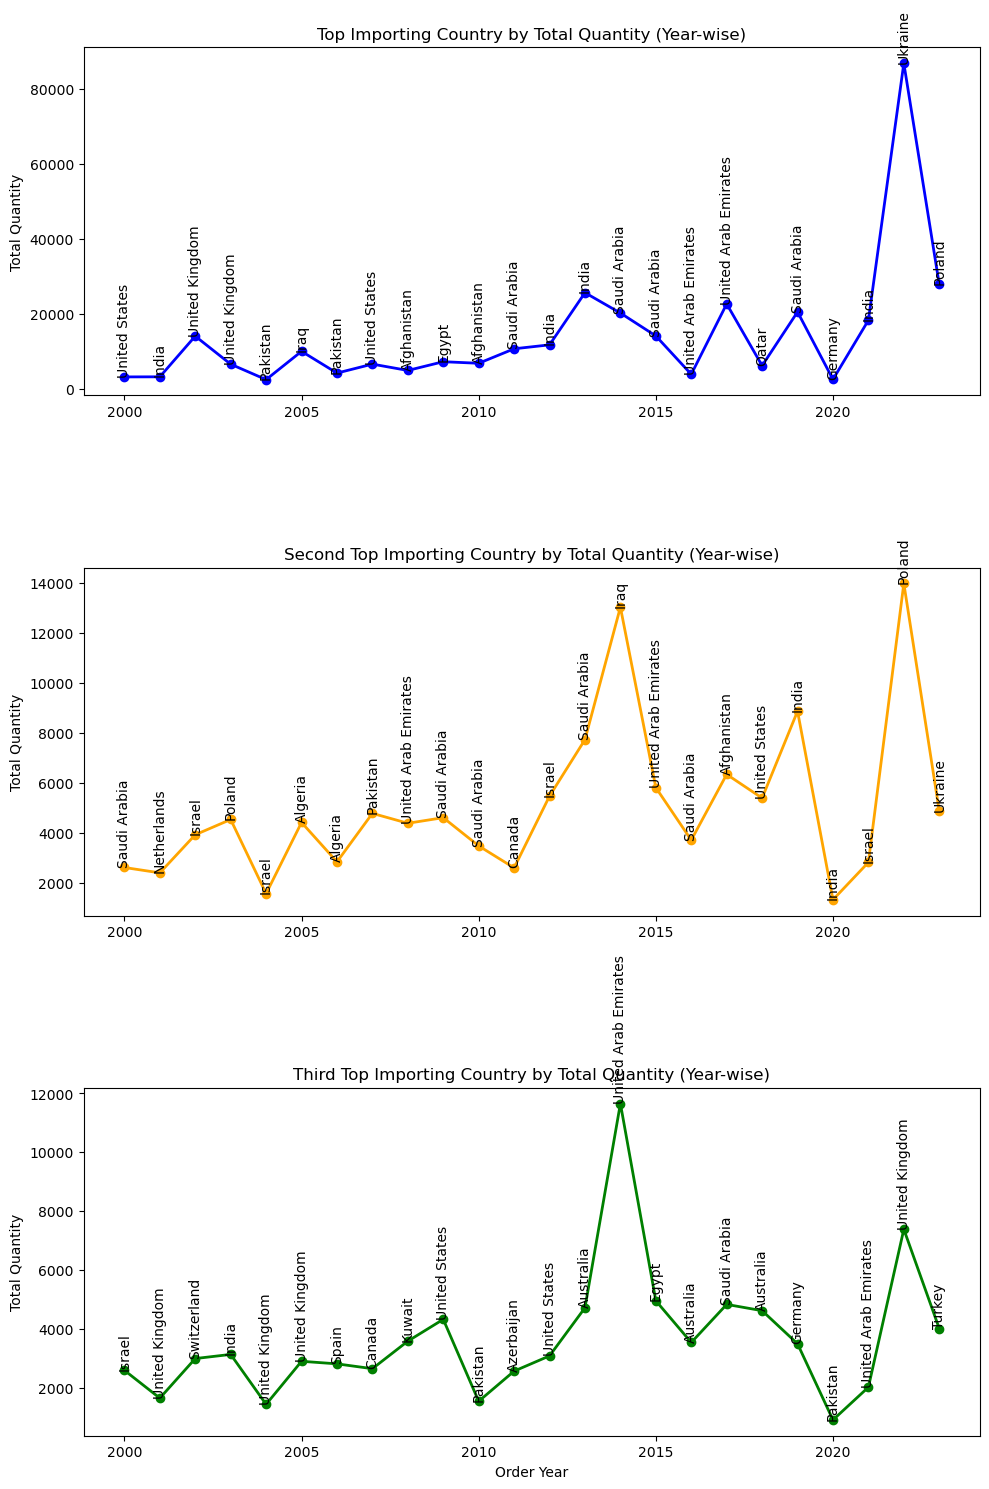

In [48]:
# Step 1: Prepare the data
years = top_3_importing_df['Order_Year']
top_countries = top_3_importing_df[['Top_Importing_Country', 'Second_Top_Importing_Country', 'Third_Top_Importing_Country']]
quantities = top_3_importing_df[['Top_Quantity', 'Second_Top_Quantity', 'Third_Top_Quantity']]

# Step 2: Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Step 3: Plot Top Importing Country
axes[0].plot(years, quantities['Top_Quantity'], marker='o', label='Top Importing Country', color='blue', linewidth=2, markersize=6)
axes[0].set_title('Top Importing Country by Total Quantity (Year-wise)')
axes[0].set_ylabel('Total Quantity')

# Add annotations for the Top Importing Country
for i, year in enumerate(years):
    axes[0].text(year, quantities['Top_Quantity'].iloc[i] + 0.1, top_countries.iloc[i, 0],  
                 va='bottom', ha='center', fontsize=10, color='black', rotation=90)

# Step 4: Plot Second Top Importing Country
axes[1].plot(years, quantities['Second_Top_Quantity'], marker='o', label='Second Top Importing Country', color='orange', linewidth=2, markersize=6)
axes[1].set_title('Second Top Importing Country by Total Quantity (Year-wise)')
axes[1].set_ylabel('Total Quantity')

# Add annotations for the Second Top Importing Country
for i, year in enumerate(years):
    axes[1].text(year, quantities['Second_Top_Quantity'].iloc[i] + 0.1, top_countries.iloc[i, 1],  
                 va='bottom', ha='center', fontsize=10, color='black', rotation=90)

# Step 5: Plot Third Top Importing Country
axes[2].plot(years, quantities['Third_Top_Quantity'], marker='o', label='Third Top Importing Country', color='green', linewidth=2, markersize=6)
axes[2].set_title('Third Top Importing Country by Total Quantity (Year-wise)')
axes[2].set_xlabel('Order Year')
axes[2].set_ylabel('Total Quantity')

# Add annotations for the Third Top Importing Country
for i, year in enumerate(years):
    axes[2].text(year, quantities['Third_Top_Quantity'].iloc[i] + 0.1, top_countries.iloc[i, 2],  
                 va='bottom', ha='center', fontsize=10, color='black', rotation=90)

# Step 6: Adjust the layout
plt.tight_layout()

# Step 7: Show the plot
plt.show()

# Observation :

- Trends evolve over decades:
  - Early 2000s: 🇺🇸 US leads.
  - 2010s: India surges.
  - 2022: Ukraine spikes dramatically (war-driven emergency buying).
- Conflict zones like Afghanistan & Iraq show sharp spikes during wars.

# 6
**Top 3 Exporting Country Who delivered Most Order Year-Wise :**

In [49]:
# Step 1: Aggregate data by Exporting Country and Order Year to get total quantity
agg_data = df.groupby(['Exporting_Country', 'Order_Year'])['No_Of_Quantity'].sum().reset_index(name='Total_Quantity')

# Step 2: Sort the data by Order Year and Total Quantity (Descending order for quantity)
agg_data_sorted = agg_data.sort_values(by=['Order_Year', 'Total_Quantity'], ascending=[True, False])

# Step 3: Extract the top 3 exporting countries based on total quantity for each year
top_3_exporting_by_quantity = []

for year in agg_data_sorted['Order_Year'].unique():
    year_data = agg_data_sorted[agg_data_sorted['Order_Year'] == year]
    
    # Top 3 countries (handle cases where there are less than 3)
    top_countries = year_data.head(3)
    
    top_3_exporting_by_quantity.append({
        'Year': year,
        'Top_Exporting_Country': top_countries.iloc[0]['Exporting_Country'] if len(top_countries) > 0 else None,
        'Top_Qty': top_countries.iloc[0]['Total_Quantity'] if len(top_countries) > 0 else None,
        '2nd_Top_Exporting_Country': top_countries.iloc[1]['Exporting_Country'] if len(top_countries) > 1 else None,
        '2nd_Top_Qty': top_countries.iloc[1]['Total_Quantity'] if len(top_countries) > 1 else None,
        '3rd_Top_Exporting_Country': top_countries.iloc[2]['Exporting_Country'] if len(top_countries) > 2 else None,
        '3rd_Top_Qty': top_countries.iloc[2]['Total_Quantity'] if len(top_countries) > 2 else None
    })

# Step 4: Convert the result to a DataFrame for better readability
top_3_exporting_df = pd.DataFrame(top_3_exporting_by_quantity)

# Step 5: Display the result using Pandas' built-in display
print(top_3_exporting_df.to_string(index=False))

 Year Top_Exporting_Country  Top_Qty 2nd_Top_Exporting_Country  2nd_Top_Qty 3rd_Top_Exporting_Country  3rd_Top_Qty
 2000         United States    12960                    Russia         6567                    Canada         2282
 2001         United States     9984                    Russia         6746                    Israel         3279
 2002                Sweden    14366             United States        12183                    Russia         6991
 2003         United States    11642                    Russia         4136                    Israel         4103
 2004         United States    11152                    Russia         3252                    France         1203
 2005         United States    17625                    Russia         7619            United Kingdom         2322
 2006         United States     9235                    Russia         6242                    Israel         3731
 2007         United States    15819                    Norway         6574     

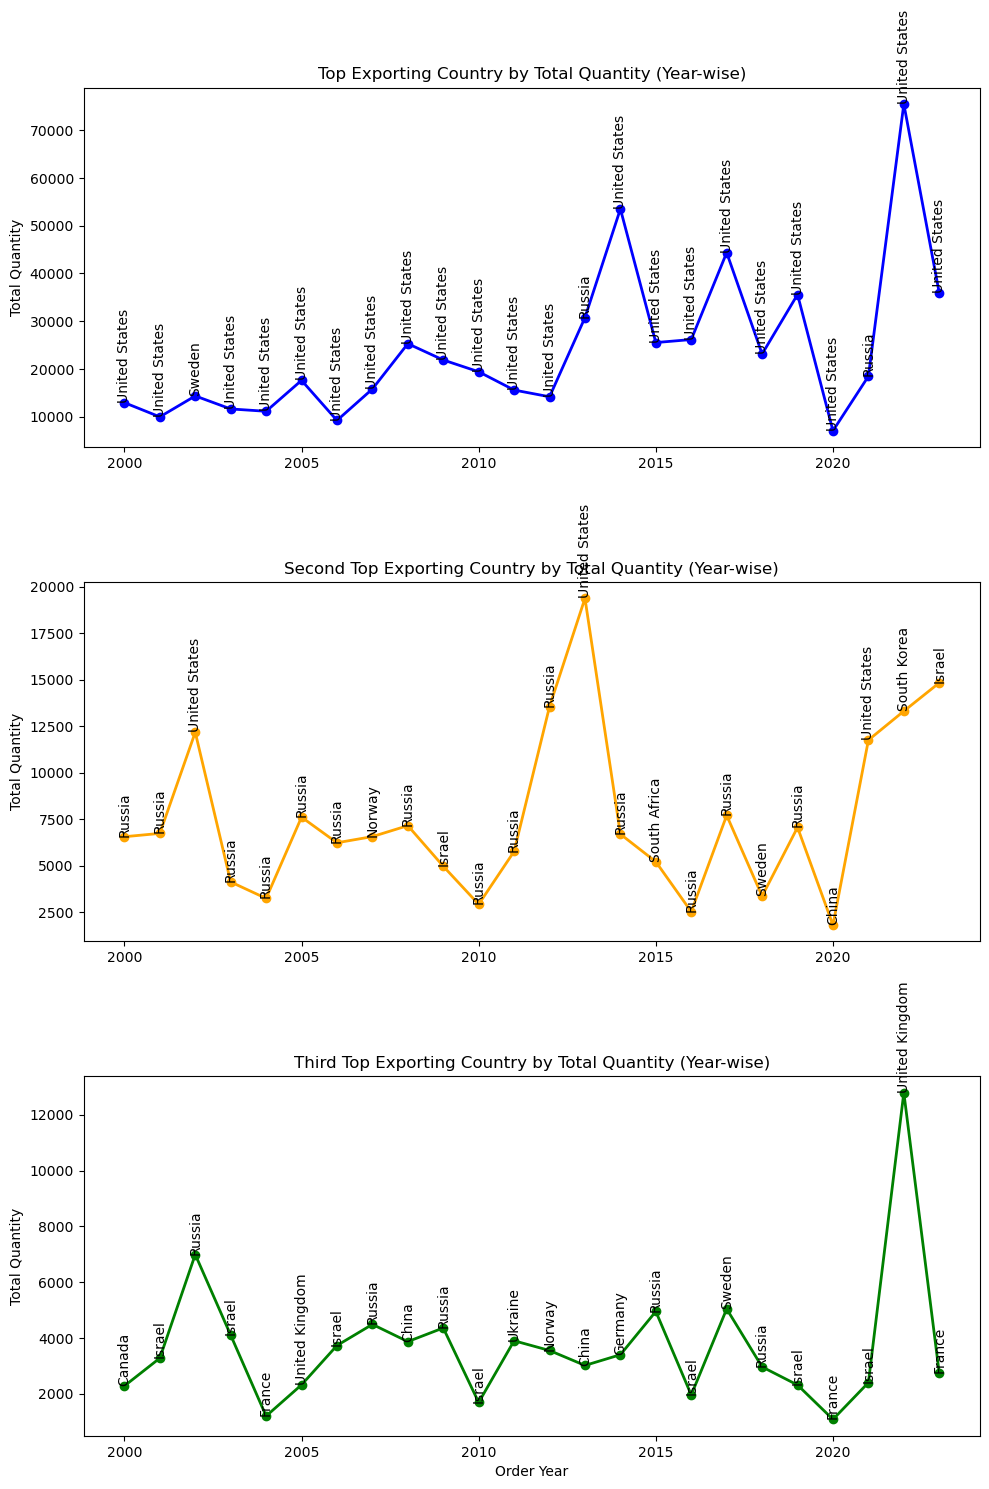

In [50]:
# Step 1: Prepare the data
years = top_3_exporting_df['Year']
top_countries = top_3_exporting_df[['Top_Exporting_Country', '2nd_Top_Exporting_Country', '3rd_Top_Exporting_Country']]
quantities = top_3_exporting_df[['Top_Qty', '2nd_Top_Qty', '3rd_Top_Qty']]

# Step 2: Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Step 3: Plot Top Exporting Country
axes[0].plot(years, quantities['Top_Qty'], marker='o', label='Top Exporting Country', color='blue', linewidth=2, markersize=6)
axes[0].set_title('Top Exporting Country by Total Quantity (Year-wise)')
axes[0].set_ylabel('Total Quantity')

# Add annotations for the Top Exporting Country
for i, year in enumerate(years):
    axes[0].text(year, quantities['Top_Qty'].iloc[i] + 0.1, top_countries.iloc[i, 0],  
                 va='bottom', ha='center', fontsize=10, color='black', rotation=90)

# Step 4: Plot Second Top Exporting Country
axes[1].plot(years, quantities['2nd_Top_Qty'], marker='o', label='2nd Top Exporting Country', color='orange', linewidth=2, markersize=6)
axes[1].set_title('Second Top Exporting Country by Total Quantity (Year-wise)')
axes[1].set_ylabel('Total Quantity')

# Add annotations for the Second Top Exporting Country
for i, year in enumerate(years):
    axes[1].text(year, quantities['2nd_Top_Qty'].iloc[i] + 0.1, top_countries.iloc[i, 1],  
                 va='bottom', ha='center', fontsize=10, color='black', rotation=90)

# Step 5: Plot Third Top Exporting Country
axes[2].plot(years, quantities['3rd_Top_Qty'], marker='o', label='3rd Top Exporting Country', color='green', linewidth=2, markersize=6)
axes[2].set_title('Third Top Exporting Country by Total Quantity (Year-wise)')
axes[2].set_xlabel('Order Year')
axes[2].set_ylabel('Total Quantity')

# Add annotations for the Third Top Exporting Country
for i, year in enumerate(years):
    axes[2].text(year, quantities['3rd_Top_Qty'].iloc[i] + 0.1, top_countries.iloc[i, 2],  
                 va='bottom', ha='center', fontsize=10, color='black', rotation=90)

# Step 6: Adjust the layout
plt.tight_layout()

# Step 7: Show the plot
plt.show()

# Observation :

- US consistently dominates exports across years.
- Russia’s exports surge during large India or Middle East deals.
- Israel emerges in some years via niche high-tech exports.

# 7
**Top 20 Importing Country According to Quantity Ordered :**

In [51]:
# Group by 'Importing_Country' and aggregate with sum, max, and mean
country_stats = df.groupby('Importing_Country')['No_Of_Quantity'].agg(['sum', 'max', 'mean'])

# Sort by the total quantity (sum) and get the top 20 countries
top_20_quantity_ordering_country = country_stats.nlargest(20, 'sum')

# Print the table
print("Top 20 Importing countries by total quantity ordered:")
print(top_20_quantity_ordering_country)

Top 20 Importing countries by total quantity ordered:
                         sum    max        mean
Importing_Country                              
Saudi Arabia          104388  20000  395.409091
Ukraine                93272  20000  261.266106
India                  89635  25000  297.790698
United Arab Emirates   69447  13640  288.161826
Poland                 54307  10000  300.038674
United Kingdom         49155  14000  280.885714
Israel                 42874   4100  420.333333
United States          38584   6500  242.666667
Iraq                   37870   8500  213.954802
Egypt                  27332   6928  127.719626
Pakistan               26556   3198  116.473684
Australia              24827   4002  132.764706
Afghanistan            24676   4735  316.358974
Algeria                18307   4500   132.65942
Germany                18280   3330  186.530612
Turkey                 17230   1600  114.866667
Qatar                  16344   5000  144.637168
Finland                13902   240

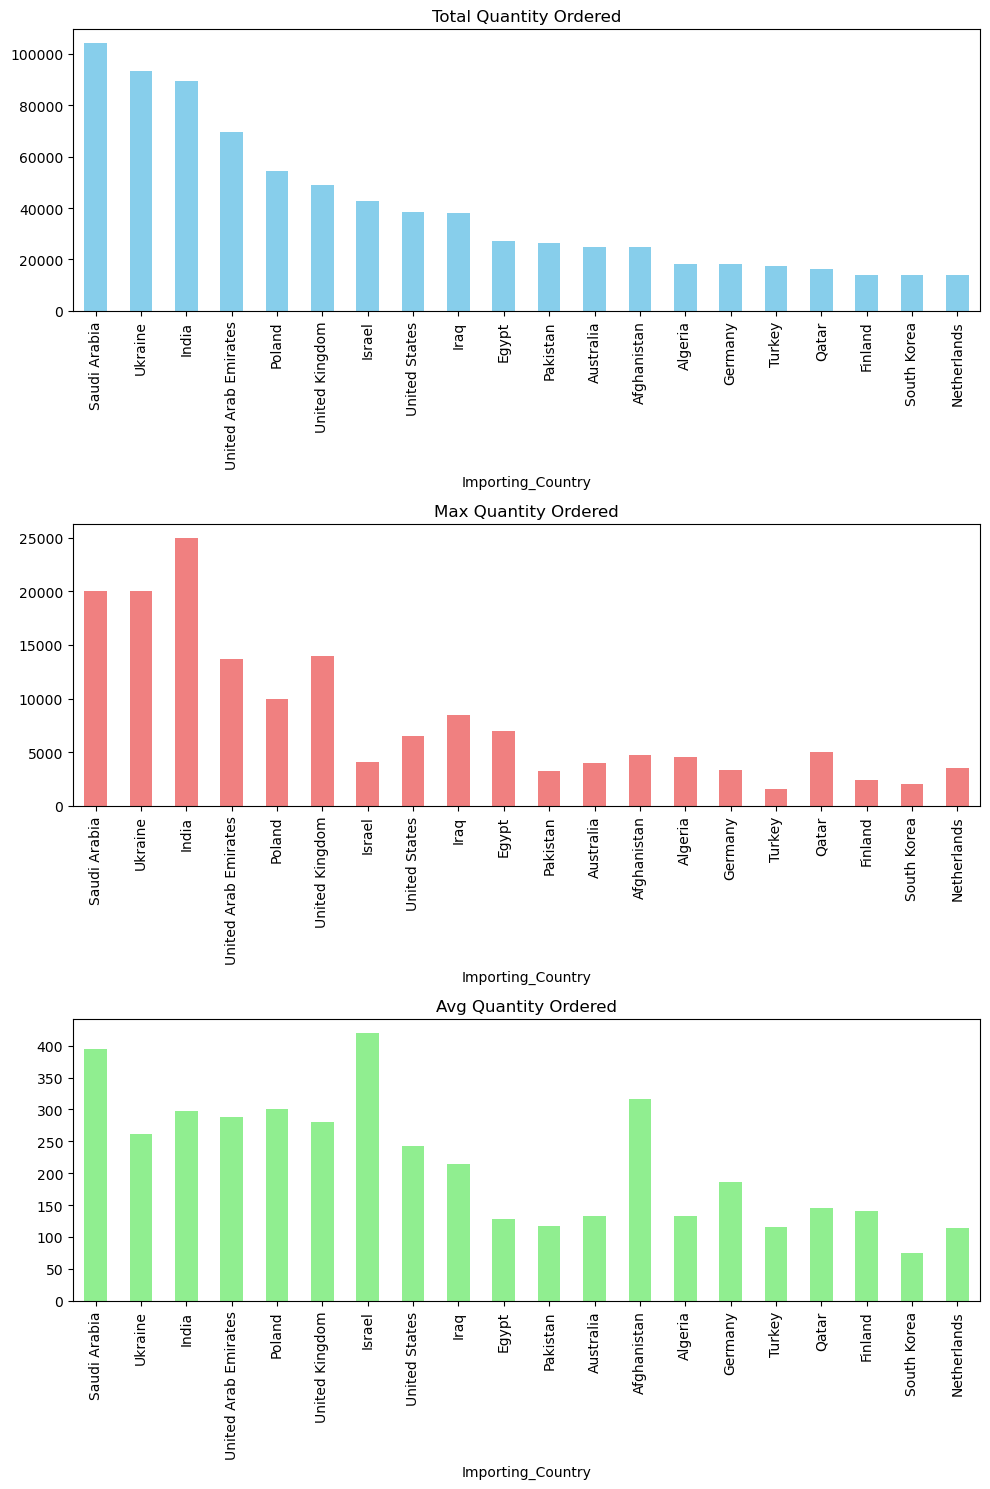

In [52]:
# Plotting the results
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot Total, Max, and Avg in separate subplots
top_20_quantity_ordering_country['sum'].plot(kind='bar', ax=axes[0], color='skyblue', title='Total Quantity Ordered')
top_20_quantity_ordering_country['max'].plot(kind='bar', ax=axes[1], color='lightcoral', title='Max Quantity Ordered')
top_20_quantity_ordering_country['mean'].plot(kind='bar', ax=axes[2], color='lightgreen', title='Avg Quantity Ordered')

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

# Observation :

- Top 5 by total quantity:
  - Saudi Arabia, Ukraine, India, UAE, Poland.
- Saudi Arabia’s steady orders = long-term military build-up.
- Ukraine’s massive spike in 2022 = conflict-driven emergency orders.
- European demand (Poland) rises post-2014 (Crimea conflict).

# 8
**Top 20 Exporting Country According to Quantity Delivered :**

In [53]:
# Group by 'Exporting_Country' and aggregate with sum, max, and mean
country_stats = df.groupby('Exporting_Country')['No_Of_Quantity'].agg(['sum', 'max', 'mean'])

# Sort by the total quantity (sum) and get the top 20 countries
top_20_quantity_delivering_country = country_stats.nlargest(20, 'sum')

# Print the table
print("Top 20 Exporting countries by total quantity delivered:")
print(top_20_quantity_delivering_country)

Top 20 Exporting countries by total quantity delivered:
                         sum    max        mean
Exporting_Country                              
United States         554986  20000  184.749001
Russia                162138  25000  184.667426
Israel                 60641  10000  111.064103
Sweden                 41374  14000  191.546296
Germany                35818   2700   58.430669
United Kingdom         32764   6900  106.723127
France                 30764   1000   45.174743
China                  27978   1200   47.500849
Norway                 22491   6500  174.348837
Ukraine                18184   1806    57.18239
South Korea            16389  10000     136.575
South Africa           15287   4000   77.994898
Turkey                 12520   2000   59.056604
Italy                  11160   1410   26.891566
Canada                 10724   2131   41.405405
Bulgaria                5995   2200   92.230769
United Arab Emirates    5213   2000   60.616279
Netherlands             4691    

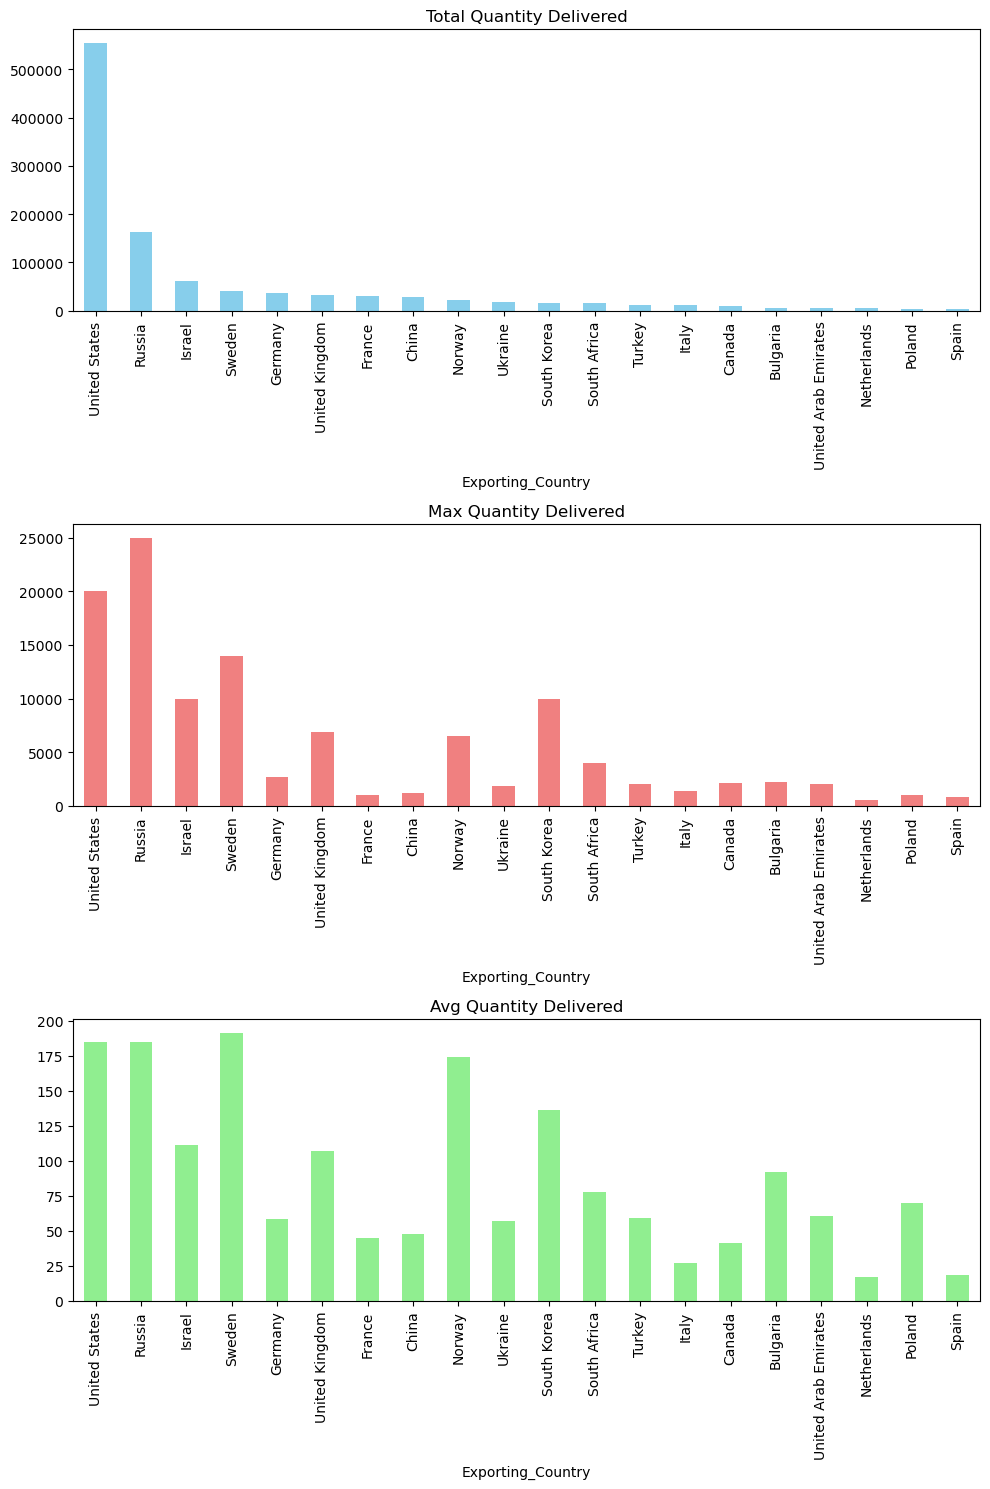

In [54]:
# Plotting the results
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot Total, Max, and Avg in separate subplots
top_20_quantity_delivering_country['sum'].plot(kind='bar', ax=axes[0], color='skyblue', title='Total Quantity Delivered')
top_20_quantity_delivering_country['max'].plot(kind='bar', ax=axes[1], color='lightcoral', title='Max Quantity Delivered')
top_20_quantity_delivering_country['mean'].plot(kind='bar', ax=axes[2], color='lightgreen', title='Avg Quantity Delivered')

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

# Observation :

- USA leads global exports — over 554k units delivered.
- Russia & 🇮🇱 Israel follow, with Sweden, Germany, UK also key players.
- Emerging Exporters: South Africa, UAE, Turkey showing rising presence.


# 9
**Top 10 Item & Their Top 5 Importing Country :**

In [55]:
# Step 1: Get the top 10 items based on total imported quantity
top_10_items = df.groupby('Name_of_Item', as_index=False)['No_Of_Quantity'].sum().nlargest(10, 'No_Of_Quantity')

# Step 2: Filter the original data for only these top 10 items
filtered_data = df[df['Name_of_Item'].isin(top_10_items['Name_of_Item'])]

# Step 3: Get the top 5 importing countries for each of these top items
top_5_item_countries = (
    filtered_data.groupby(['Name_of_Item', 'Importing_Country'], as_index=False)['No_Of_Quantity'].sum()
    .groupby('Name_of_Item', group_keys=False)
    .apply(lambda x: x.nlargest(5, 'No_Of_Quantity'))
    .reset_index(drop=True)
)

# Step 4: Sort items by total quantity first, then by country-wise quantity
top_5_item_countries = (
    top_5_item_countries.merge(top_10_items, on='Name_of_Item', suffixes=('', '_Total'))
    .sort_values(['No_Of_Quantity_Total', 'No_Of_Quantity'], ascending=[False, False])
)

# Step 5: Display the result in a tabular format using Pandas' built-in display
print("\nTop 10 Items & Their Top 5 Importing Countries\n")
print(top_5_item_countries[['Name_of_Item', 'Importing_Country', 'No_Of_Quantity']].to_string(index=False))


Top 10 Items & Their Top 5 Importing Countries

      Name_of_Item    Importing_Country  No_Of_Quantity
           Paveway         Saudi Arabia           34220
           Paveway United Arab Emirates           14628
           Paveway       United Kingdom            5803
           Paveway               Canada            2625
           Paveway             Pakistan            1700
              JDAM               Israel           21379
              JDAM United Arab Emirates            9106
              JDAM               Turkey            4193
              JDAM         Saudi Arabia            4145
              JDAM              Germany            3716
             GMLRS              Ukraine           21114
             GMLRS               Poland           10751
             GMLRS              Germany            5220
             GMLRS              Finland            2886
             GMLRS       United Kingdom            2844
               TOW         Saudi Arabia           15878

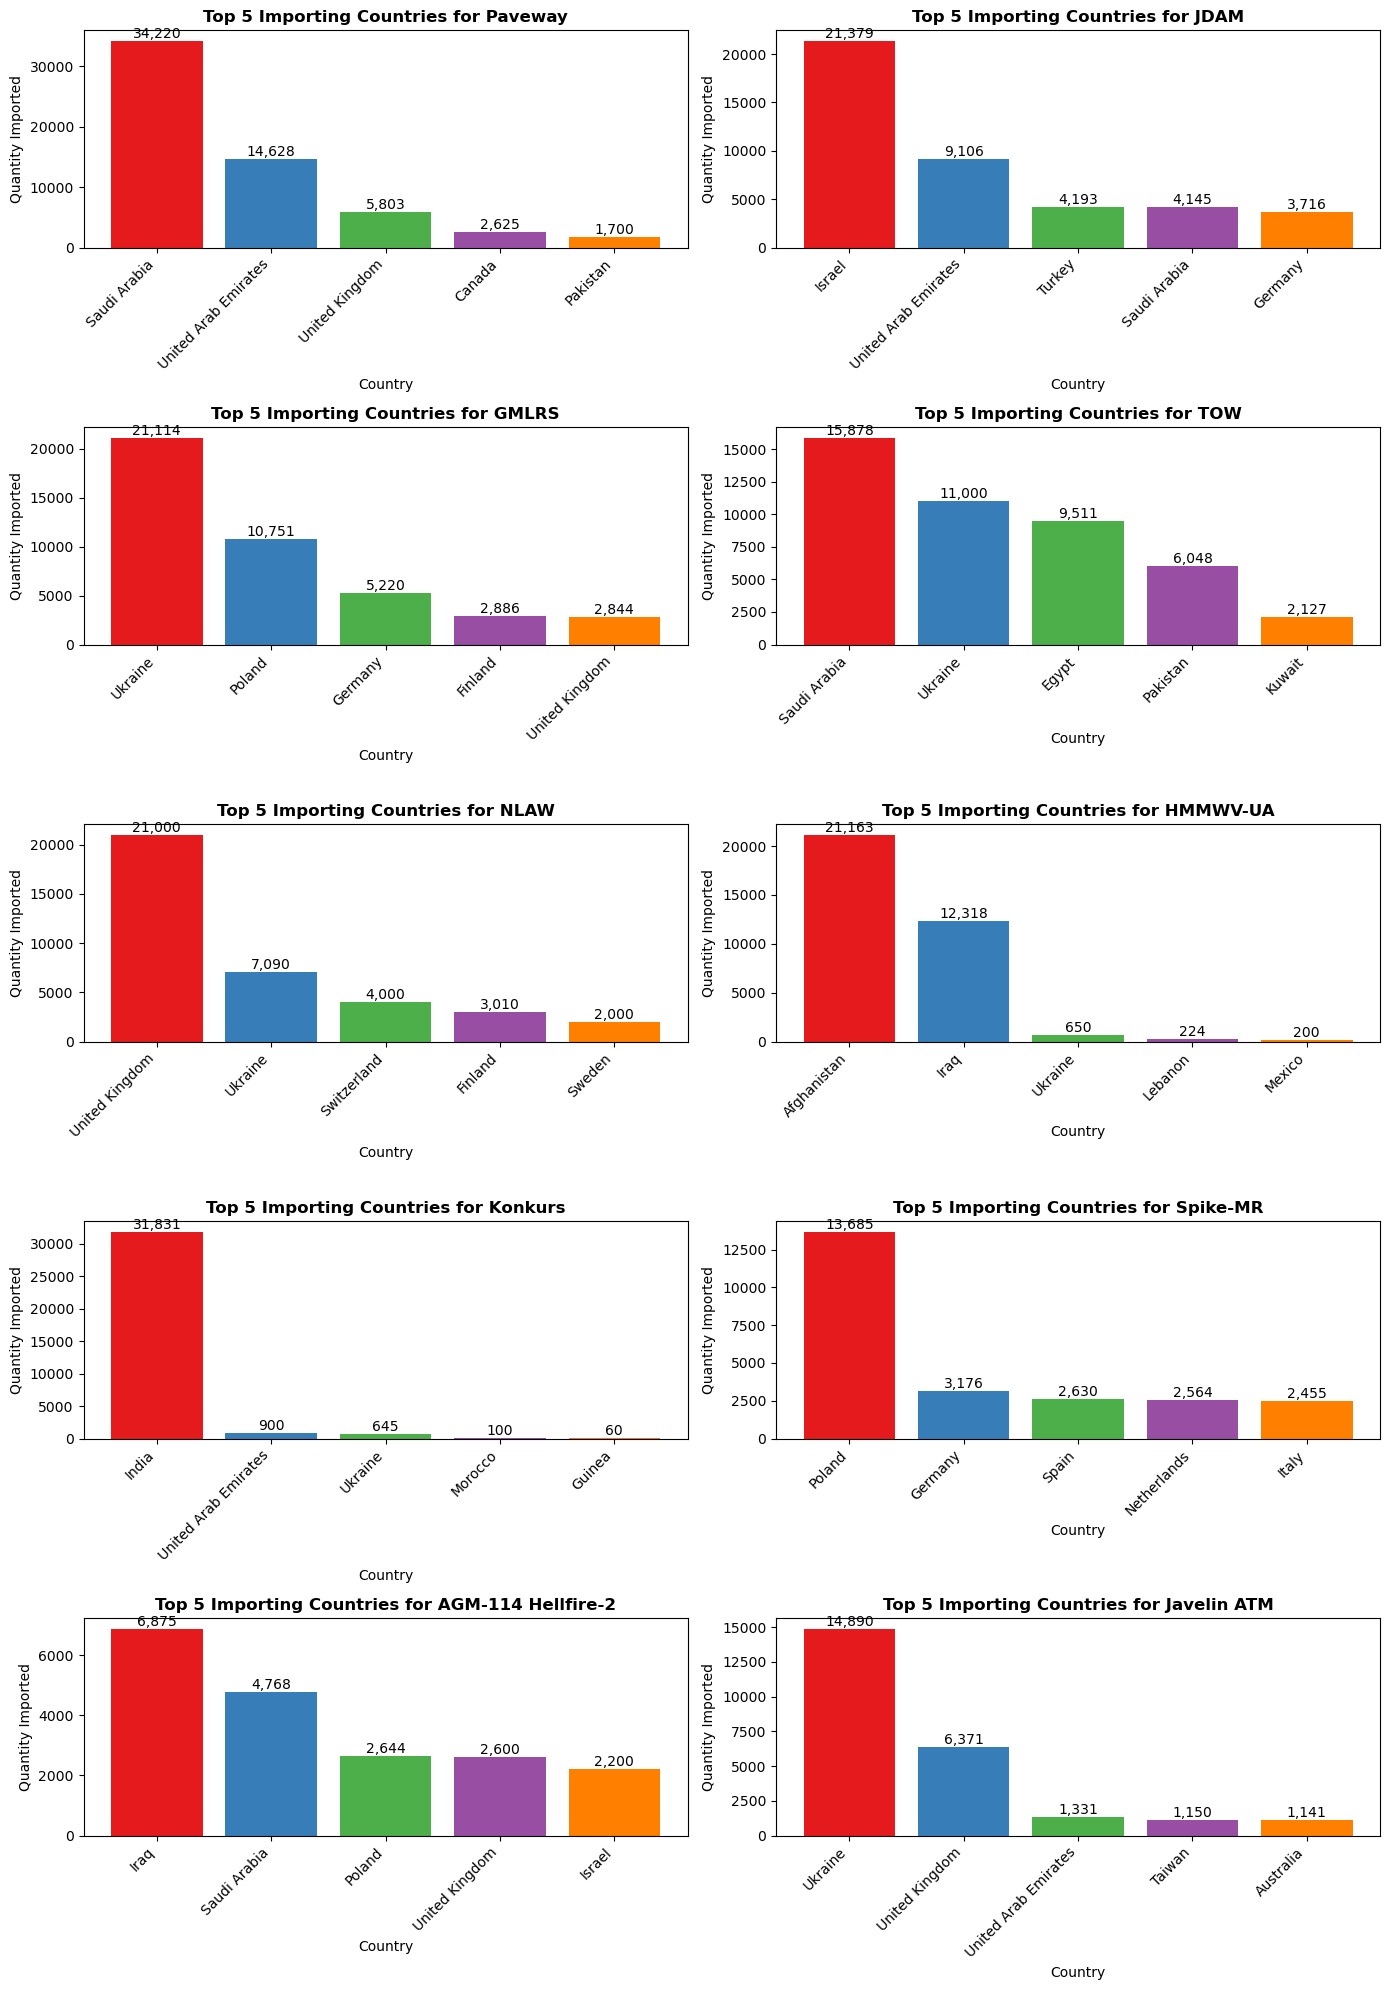

In [56]:
# Plot Data in 10 Subplots (5 Rows, 2 Columns)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))  # Create a 5x2 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array for easier indexing

# Get unique top 10 items
unique_items = top_5_item_countries['Name_of_Item'].unique()

for i, item in enumerate(unique_items):
    ax = axes[i]

    # Select top 5 importing countries for the current item
    item_data = top_5_item_countries[top_5_item_countries['Name_of_Item'] == item]

    # Plot bar chart
    ax.bar(item_data['Importing_Country'], item_data['No_Of_Quantity'], color=['#E41A1C','#377EB8', '#4DAF4A', '#984EA3', '#FF7F00', 
        '#FFFF33', '#A65628', '#F781BF', '#999999'])

    # Annotate bars with values
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.0f}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')

    # Set labels and title
    ax.set_title(f'Top 5 Importing Countries for {item}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Country')
    ax.set_ylabel('Quantity Imported')
    ax.set_xticklabels(item_data['Importing_Country'], rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

# Observation :

- Paveway, JDAM, GMLRS are the top 3 globally traded items.
- Ukraine’s emergency demand spreads across multiple systems.
- Saudi Arabia & UAE dominate guided bomb imports.
- Insight: Precision munitions & ATGMs in highest demand globally.

# 10
**Top 10 Importing Country & Their Top 5 Imported Item:**

In [57]:
# Get the top 10 importing countries based on total quantity
top_10_countries = df.groupby('Importing_Country', as_index=False)['No_Of_Quantity'].sum().nlargest(10, 'No_Of_Quantity')

# Get top 5 imported items per country
top_5_items_per_country = (
    df[df['Importing_Country'].isin(top_10_countries['Importing_Country'])]
    .groupby(['Importing_Country', 'Name_of_Item'], as_index=False)['No_Of_Quantity'].sum()
    .sort_values(['Importing_Country', 'No_Of_Quantity'], ascending=[True, False])
    .groupby('Importing_Country').head(5)  # Get top 5 items per country
)

# Merge for sorting by total quantity per country
result = (
    top_5_items_per_country.merge(top_10_countries, on='Importing_Country', suffixes=('', '_Total'))
    .sort_values(['No_Of_Quantity_Total', 'No_Of_Quantity'], ascending=[False, False])
)

# Display result using Pandas' built-in formatting
print("\nTop 10 Importing Countries & Their Top 5 Imported Items (Descending Order)\n")
print(result[['Importing_Country', 'Name_of_Item', 'No_Of_Quantity']].to_string(index=False))


Top 10 Importing Countries & Their Top 5 Imported Items (Descending Order)

   Importing_Country             Name_of_Item  No_Of_Quantity
        Saudi Arabia                  Paveway           34220
        Saudi Arabia                      TOW           15878
        Saudi Arabia                   TOW-2B            4941
        Saudi Arabia       AGM-114 Hellfire-2            4768
        Saudi Arabia                     JDAM            4145
             Ukraine                    GMLRS           21114
             Ukraine              Javelin ATM           14890
             Ukraine                      TOW           11000
             Ukraine                     NLAW            7090
             Ukraine                Excalibur            7050
               India                  Konkurs           31831
               India                   9M119            25000
               India                   Kornet            3000
               India                     Igla          

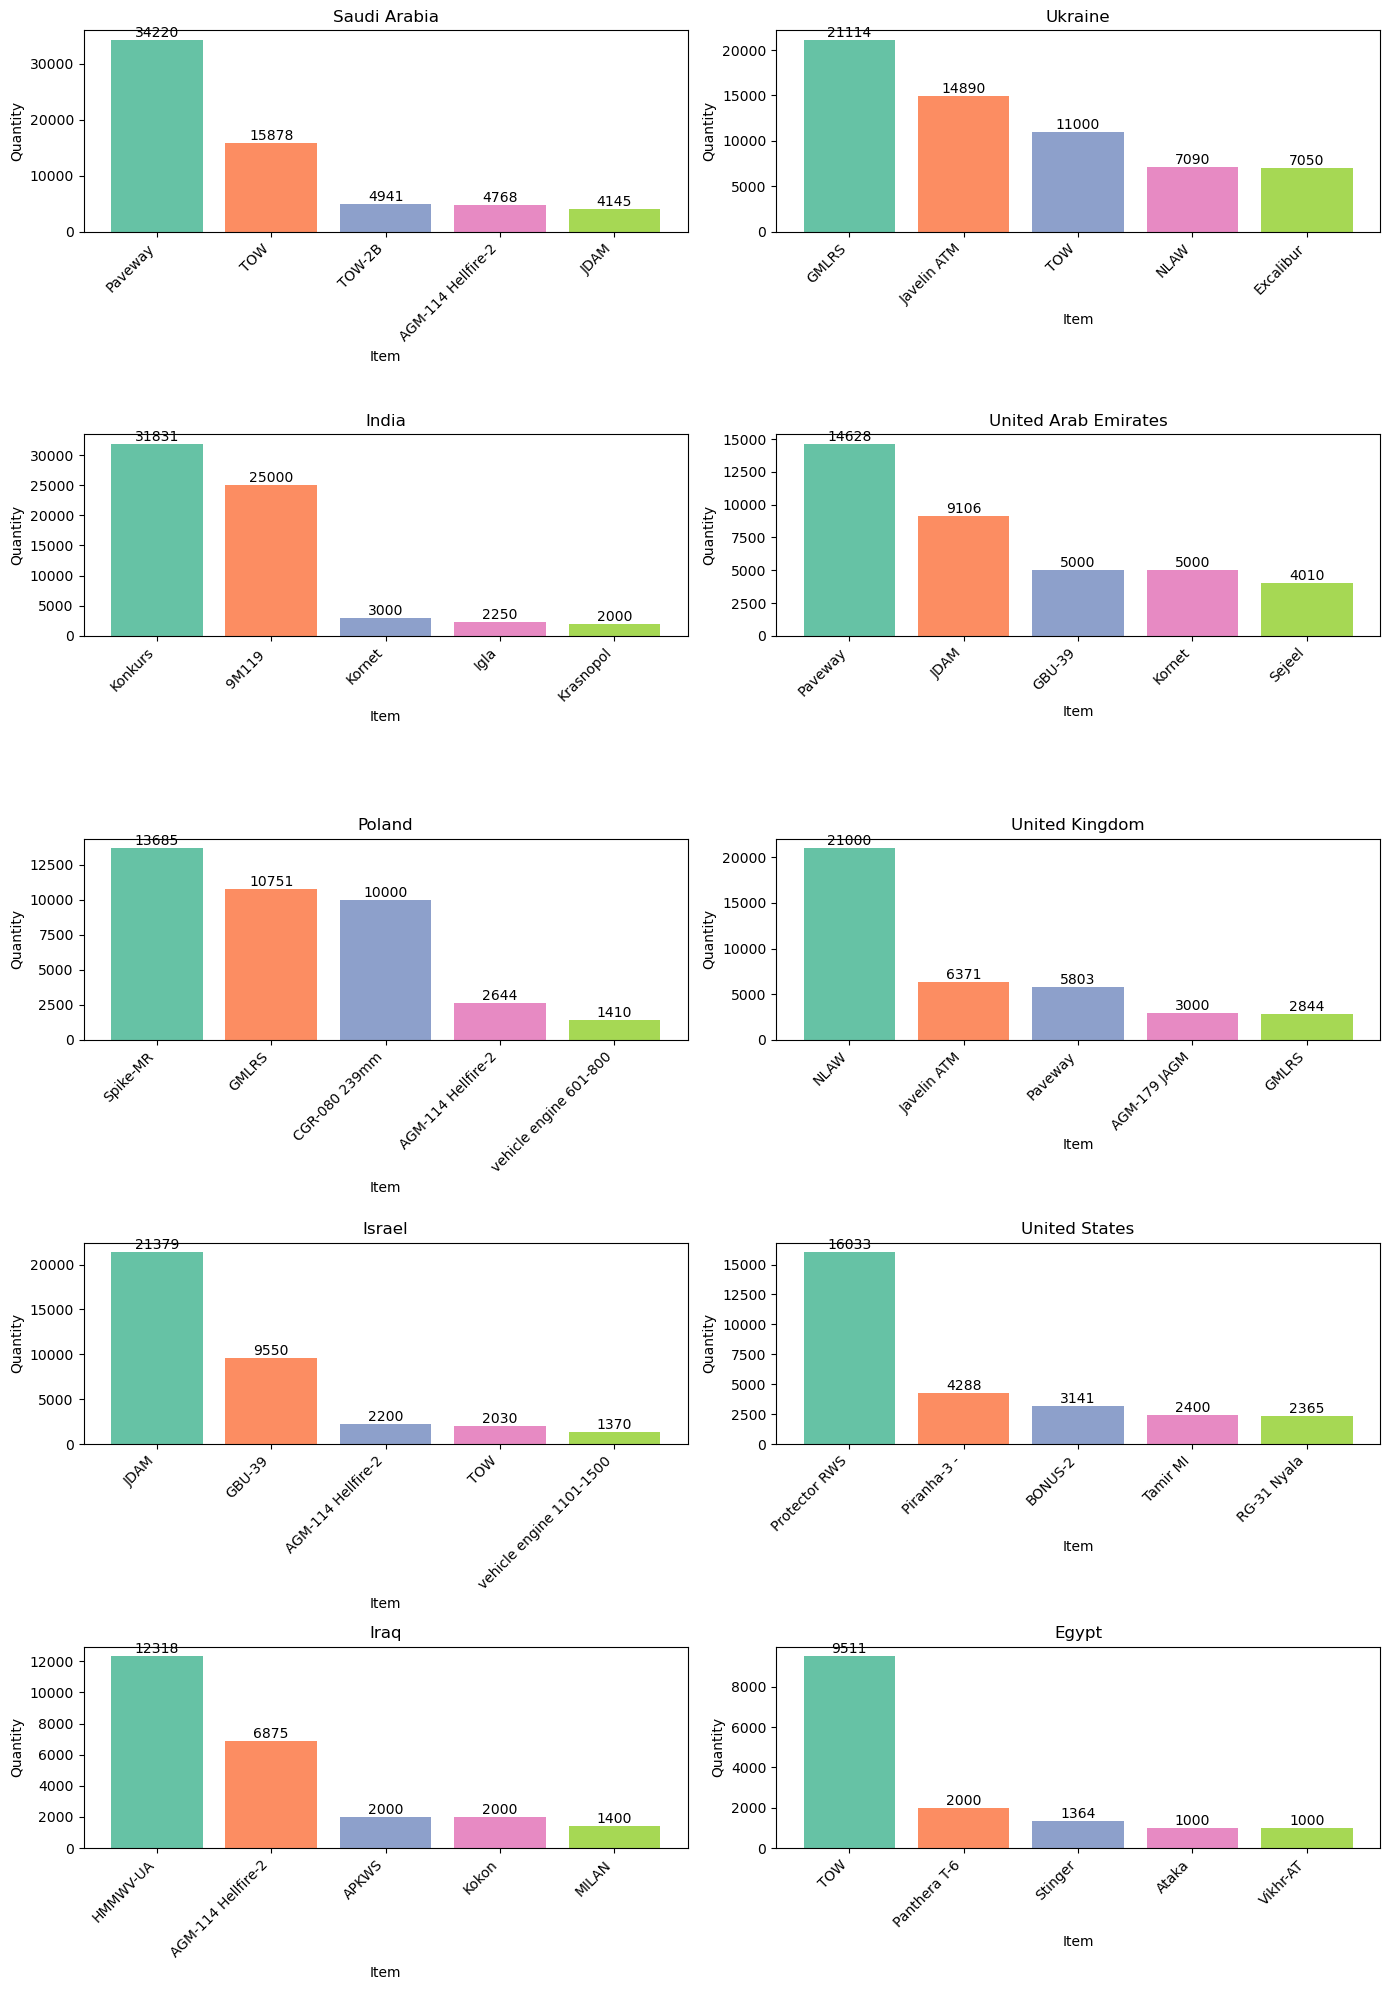

In [58]:
# Sort countries in descending order based on total import quantity
ordered_countries = result.groupby('Importing_Country')['No_Of_Quantity_Total'].max().sort_values(ascending=False).index

# Create subplots (5 rows × 2 columns)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))
axes = axes.flatten()  # Flatten for easy iteration

# Plot top 5 items for each country
for i, country in enumerate(ordered_countries):
    ax = axes[i]
    
    # Get top 5 imported items for the country
    top_items = result[result['Importing_Country'] == country].nlargest(5, 'No_Of_Quantity')

    # Bar plot
    ax.bar(top_items['Name_of_Item'], top_items['No_Of_Quantity'], color=['#66C2A5', '#FC8D62', '#8DA0CB', '#E78AC3', 
        '#A6D854', '#FFD92F', '#E5C494', '#B3B3B3'])

    # Labels & Title
    ax.set_title(f'{country}', fontsize=12)
    ax.set_xlabel('Item', fontsize=10)
    ax.set_ylabel('Quantity', fontsize=10)
    ax.set_xticklabels(top_items['Name_of_Item'], rotation=45, ha='right')

    # Annotate bars with values
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

# Observation :

- Saudi Arabia is the top importer, prioritizing bombs & missiles.
- Ukraine continues as a major buyer — clear wartime spike.
- India’s focus: Anti-tank missiles (Konkurs, 9M119).


# 11
**Top 10 Item & Their Top 5 Exporting Country :**

In [59]:
# Step 1: Get the top 10 items based on total quantity
top_10_items = df.groupby('Name_of_Item', as_index=False)['No_Of_Quantity'].sum().nlargest(10, 'No_Of_Quantity')

# Step 2: Filter the original data for only these top 10 items
filtered_data = df[df['Name_of_Item'].isin(top_10_items['Name_of_Item'])]

# Step 3: Get the top 5 exporting countries for each of these top items
top_5_item_countries = (
    filtered_data.groupby(['Name_of_Item', 'Exporting_Country'], as_index=False)['No_Of_Quantity'].sum()
    .groupby('Name_of_Item', group_keys=False)
    .apply(lambda x: x.nlargest(5, 'No_Of_Quantity'))
    .reset_index(drop=True)
)

# Step 4: Sort items by total quantity first, then by country-wise quantity
top_5_item_countries = (
    top_5_item_countries.merge(top_10_items, on='Name_of_Item', suffixes=('', '_Total'))
    .sort_values(['No_Of_Quantity_Total', 'No_Of_Quantity'], ascending=[False, False])
)

# Step 5: Display the result in a tabular format using Pandas' built-in display
print("\nTop 10 Items & Their Top 5 Exporting Countries\n")
print(top_5_item_countries[['Name_of_Item', 'Exporting_Country', 'No_Of_Quantity']].to_string(index=False))


Top 10 Items & Their Top 5 Exporting Countries

      Name_of_Item    Exporting_Country  No_Of_Quantity
           Paveway        United States           66428
           Paveway       United Kingdom            2800
           Paveway United Arab Emirates             666
              JDAM        United States           58673
             GMLRS        United States           55401
             GMLRS       United Kingdom             820
             GMLRS              Germany             294
               TOW        United States           53585
               TOW          Netherlands             555
               TOW              Denmark             535
               TOW               Norway             159
              NLAW               Sweden           29400
              NLAW       United Kingdom            8900
              NLAW           Luxembourg             100
          HMMWV-UA        United States           35364
           Konkurs               Russia           31931

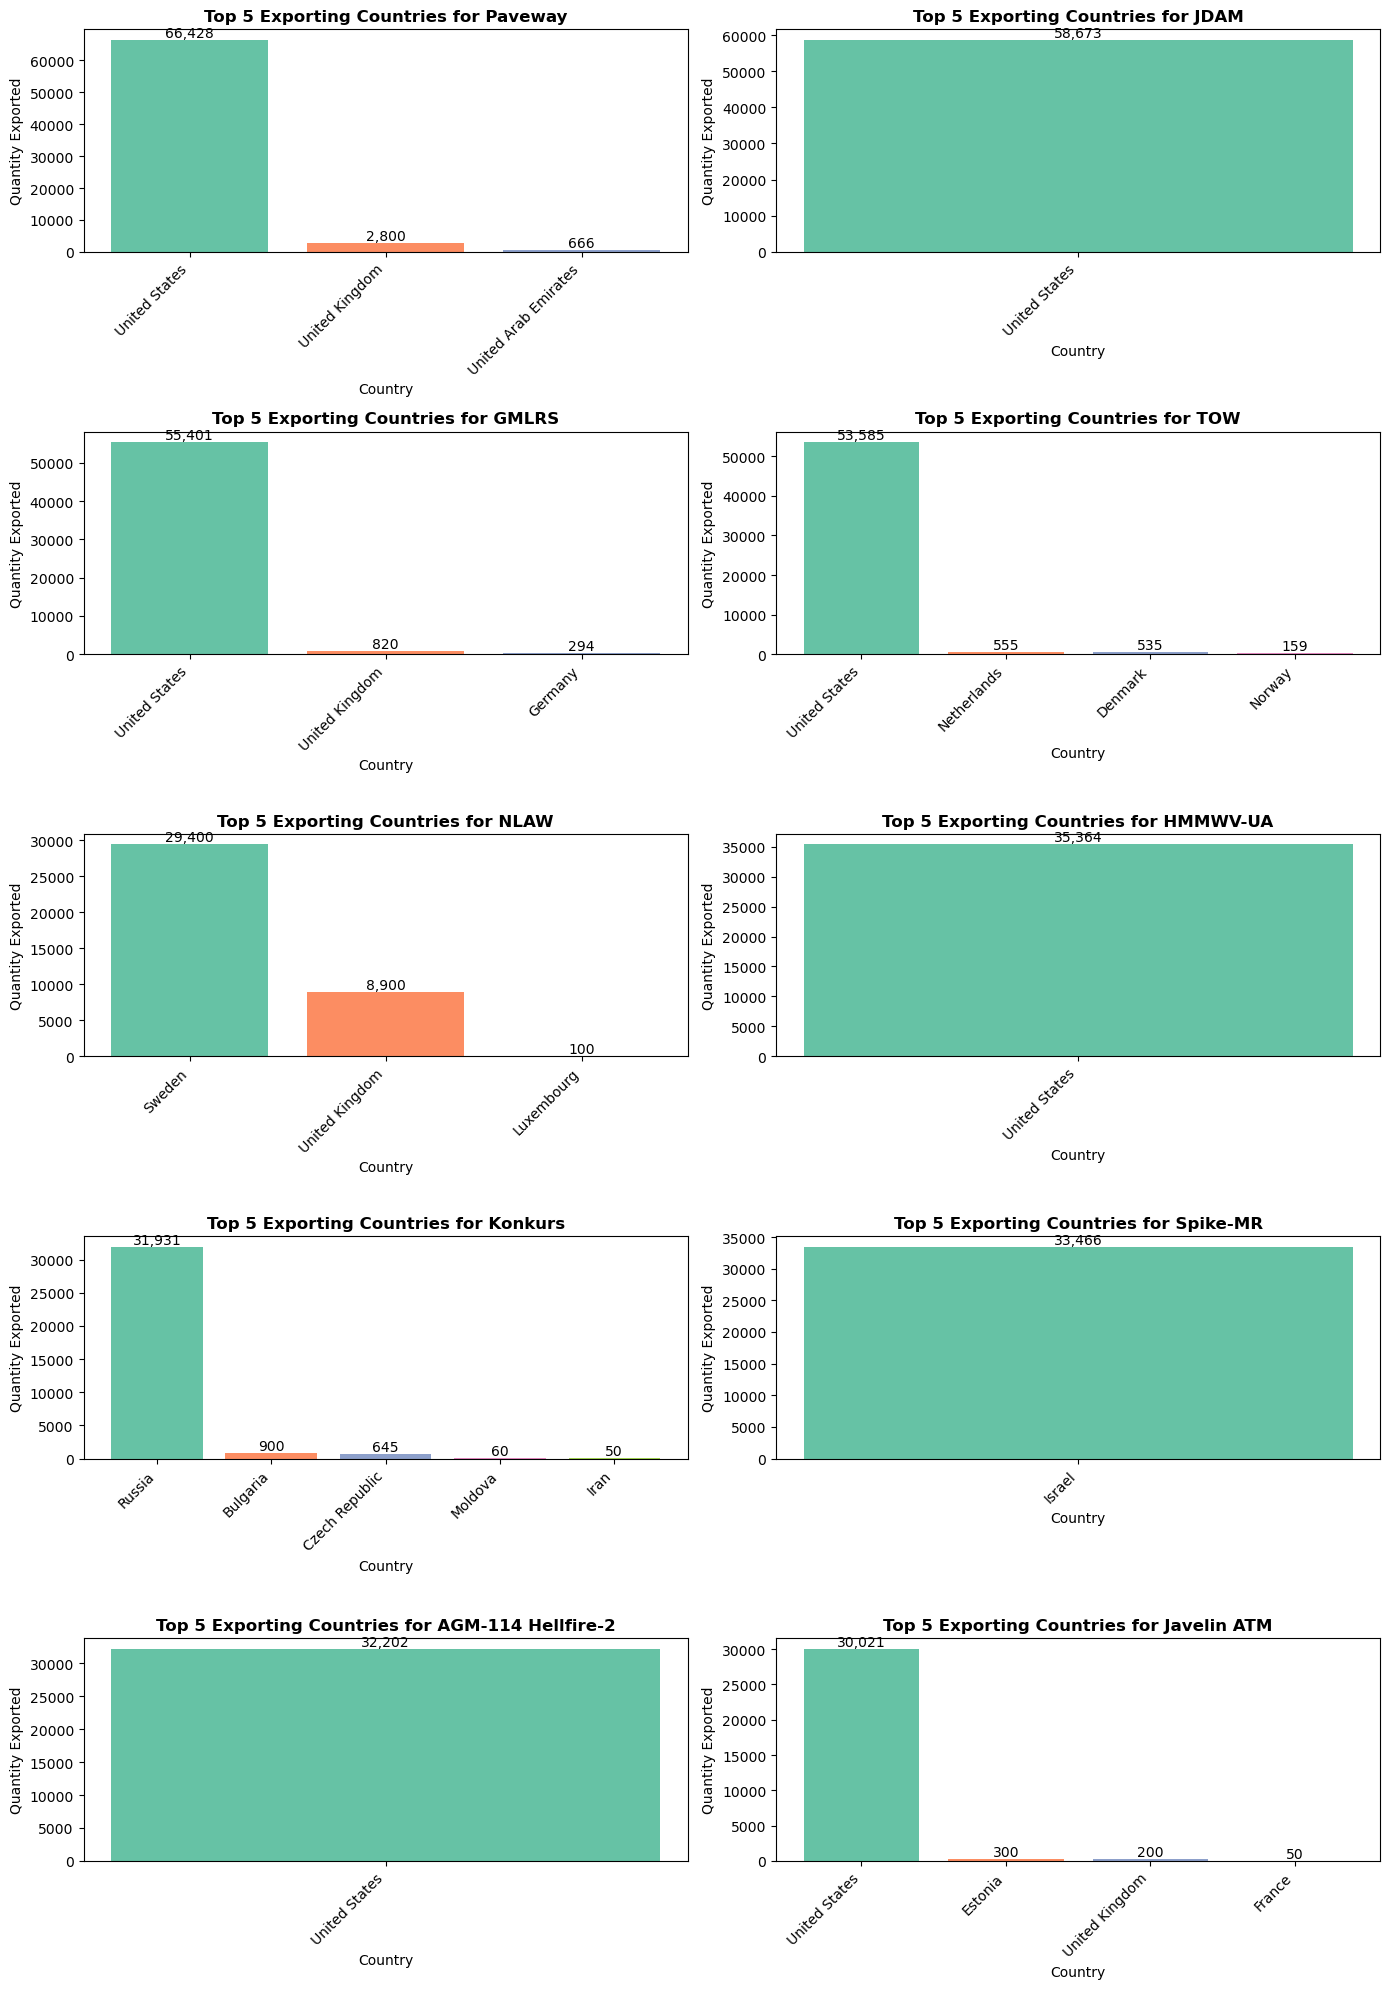

In [60]:
# Plot Data in 10 Subplots (5 Rows, 2 Columns)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))  # Create a 5x2 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array for easier indexing

# Get unique top 10 items
unique_items = top_5_item_countries['Name_of_Item'].unique()

# Define color palette
color_palette = ['#66C2A5', '#FC8D62', '#8DA0CB', '#E78AC3', '#A6D854', '#FFD92F', '#E5C494', '#B3B3B3']

for i, item in enumerate(unique_items):
    ax = axes[i]

    # Select top 5 exporting countries for the current item
    item_data = top_5_item_countries[top_5_item_countries['Name_of_Item'] == item]

    # Dynamically slice colors based on actual data length
    colors = color_palette[:len(item_data)]

    # Plot bar chart
    ax.bar(item_data['Exporting_Country'], item_data['No_Of_Quantity'], color=colors)

    # Annotate bars with values
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.0f}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')

    # Set labels and title
    ax.set_title(f'Top 5 Exporting Countries for {item}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Country')
    ax.set_ylabel('Quantity Exported')

    # Set correct xticks and labels
    ax.set_xticks(range(len(item_data)))
    ax.set_xticklabels(item_data['Exporting_Country'], rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

# Observation :

- US dominates top exported items — bombs, rockets, anti-tank.
- Russia leads in ATGM exports (Konkurs, Kornet).
- Sweden owns NLAW market.
- Trend: Export specialization — US (precision), Russia (ATGM), Sweden (niche systems).

# 12
**Top 10 Exporting Country & Their Top 5 Exported Item:**

In [61]:
# Step 1: Get the top 10 exporting countries based on total quantity
top_10_countries = df.groupby('Exporting_Country', as_index=False)['No_Of_Quantity'].sum().nlargest(10, 'No_Of_Quantity')

# Step 2: Filter the dataset for only these top 10 exporting countries
filtered_data = df[df['Exporting_Country'].isin(top_10_countries['Exporting_Country'])]

# Step 3: Get the top 5 exported items per country
top_5_items_per_country = (
    filtered_data.groupby(['Exporting_Country', 'Name_of_Item'], as_index=False)['No_Of_Quantity'].sum()
    .sort_values(['Exporting_Country', 'No_Of_Quantity'], ascending=[True, False])
    .groupby('Exporting_Country').head(5)  # Select top 5 items per country
)

# Step 4: Merge with top_10_countries to sort first by country total, then item quantity (both descending)
result = (
    top_5_items_per_country.merge(top_10_countries, on='Exporting_Country', suffixes=('', '_Total'))
    .sort_values(['No_Of_Quantity_Total', 'No_Of_Quantity'], ascending=[False, False])
)

# Step 5: Display result in a tabular format using Pandas' built-in display
print("\nTop 10 Exporting Countries & Their Top 5 Exported Items (Descending Order)\n")
print(result[['Exporting_Country', 'Name_of_Item', 'No_Of_Quantity']].to_string(index=False))


Top 10 Exporting Countries & Their Top 5 Exported Items (Descending Order)

Exporting_Country             Name_of_Item  No_Of_Quantity
    United States                  Paveway           66428
    United States                     JDAM           58673
    United States                    GMLRS           55401
    United States                      TOW           53585
    United States                 HMMWV-UA           35364
           Russia                  Konkurs           31931
           Russia                   Kornet           26828
           Russia                   9M119            25000
           Russia                   Igla-S           11104
           Russia                     57E6            4760
           Israel                 Spike-MR           33466
           Israel                 Tamir MI            2400
           Israel                 Spike-SR            2260
           Israel                 Spike-ER            2225
           Israel               Spike-

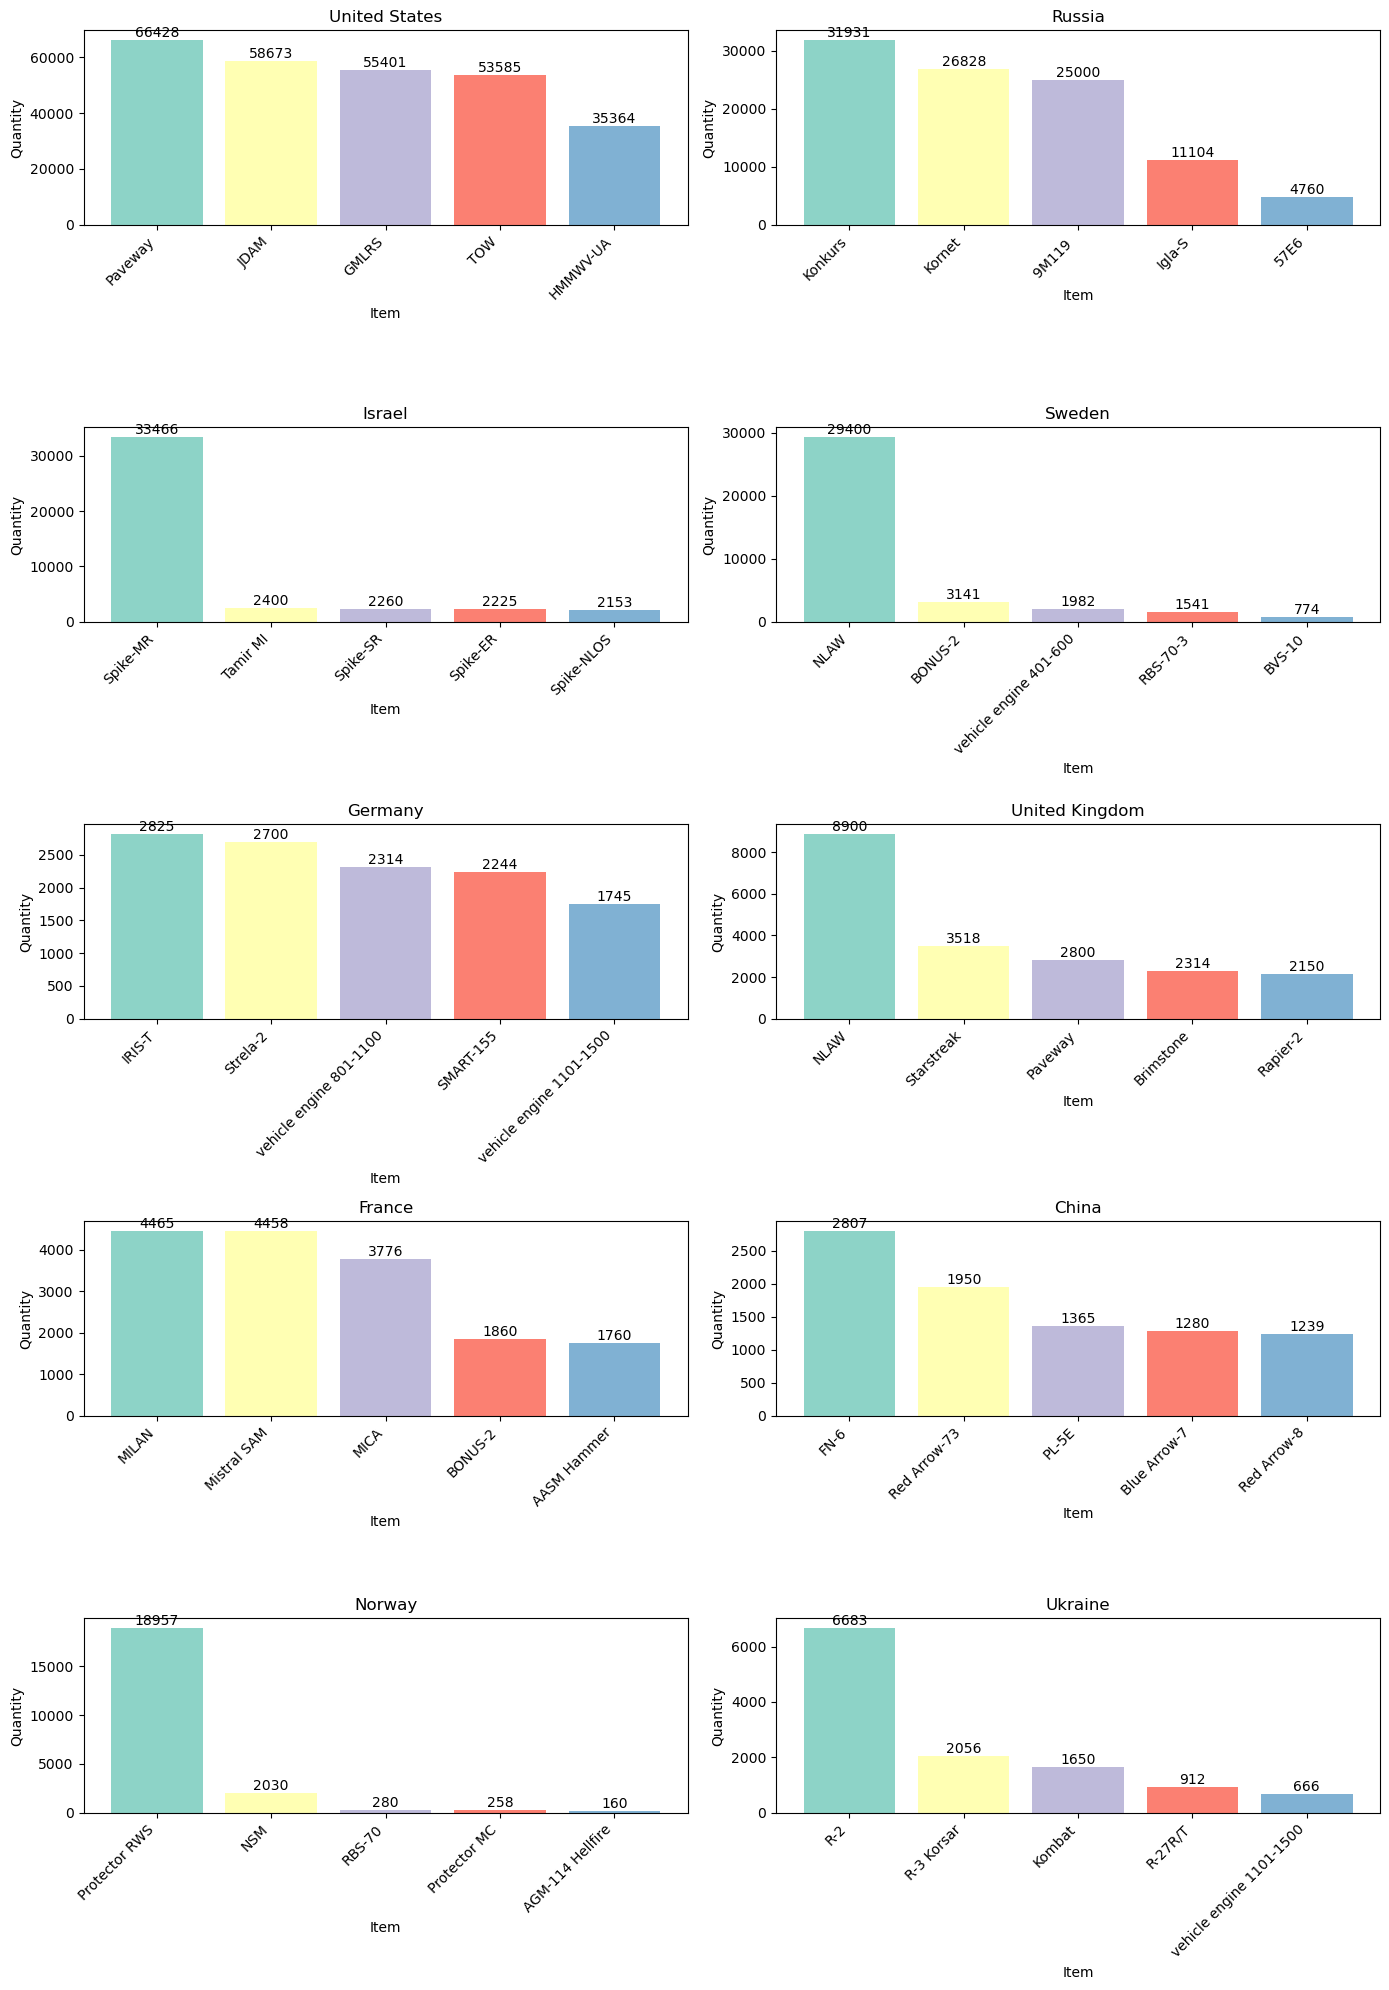

In [62]:
# Sort countries in descending order based on total import quantity
ordered_countries = result.groupby('Exporting_Country')['No_Of_Quantity_Total'].max().sort_values(ascending=False).index

# Create subplots (5 rows × 2 columns)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))
axes = axes.flatten()  # Flatten for easy iteration

color_palette = ['#8DD3C7', '#FFFFB3', '#BEBADA', '#FB8072', '#80B1D3', '#FDB462']

# Plot top 5 items for each country
for i, country in enumerate(ordered_countries):
    ax = axes[i]
    
    # Get top 10 imported items for the country
    top_items = result[result['Exporting_Country'] == country].nlargest(5, 'No_Of_Quantity')
    
    colors = color_palette[:len(top_items)]

    # Bar plot
    ax.bar(top_items['Name_of_Item'], top_items['No_Of_Quantity'], color=colors)

    # Labels & Title
    ax.set_title(f'{country}', fontsize=12)
    ax.set_xlabel('Item', fontsize=10)
    ax.set_ylabel('Quantity', fontsize=10)
    ax.set_xticklabels(top_items['Name_of_Item'], rotation=45, ha='right')

    # Annotate bars with values
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

# Observation :

- US exports a diverse high-tech arsenal — bombs, rockets, anti-tank.
- Russia focuses on cost-effective ATGMs & MANPADS.
- Israel’s exports are tech-centric — led by Spike systems.
- Germany focuses on engines & platforms.

# 13
**Top 10 Item Category and their Top 5 Importing Country :**

In [63]:
# Step 1: Get top 10 item categories based on total quantity
top_categories = df.groupby('Item_Category', as_index=False)['No_Of_Quantity'].sum().nlargest(10, 'No_Of_Quantity')

# Step 2: Filter data for only these top categories
filtered_df = df[df['Item_Category'].isin(top_categories['Item_Category'])]

# Step 3: Get top 5 buyers (importing countries) for each category
top_buyers = (
    filtered_df.groupby(['Item_Category', 'Importing_Country'], as_index=False)['No_Of_Quantity'].sum()
    .groupby('Item_Category').apply(lambda x: x.nlargest(5, 'No_Of_Quantity'))
    .reset_index(drop=True)
)

# Step 4: Merge with top_categories and sort properly
result = (
    top_buyers.merge(top_categories, on='Item_Category', suffixes=('', '_Total'))
    .sort_values(['No_Of_Quantity_Total', 'No_Of_Quantity'], ascending=[False, False])
)

# Step 5: Display the result in table format using Pandas' built-in display
print("\nTop 10 Item Categories & Their Top 5 Buyers (Descending Order)\n")
print(result[['Item_Category', 'Importing_Country', 'No_Of_Quantity']].to_string(index=False))


Top 10 Item Categories & Their Top 5 Buyers (Descending Order)

        Item_Category    Importing_Country  No_Of_Quantity
    anti-tank missile                India           63213
    anti-tank missile              Ukraine           34739
    anti-tank missile       United Kingdom           27371
    anti-tank missile         Saudi Arabia           26457
    anti-tank missile               Poland           14365
          guided bomb         Saudi Arabia           39715
          guided bomb United Arab Emirates           28094
          guided bomb               Israel           22729
          guided bomb       United Kingdom            5803
          guided bomb              Germany            4416
        guided rocket              Ukraine           21114
        guided rocket               Poland           20751
        guided rocket              Germany            5220
        guided rocket              Finland            2886
        guided rocket       United Kingdom        

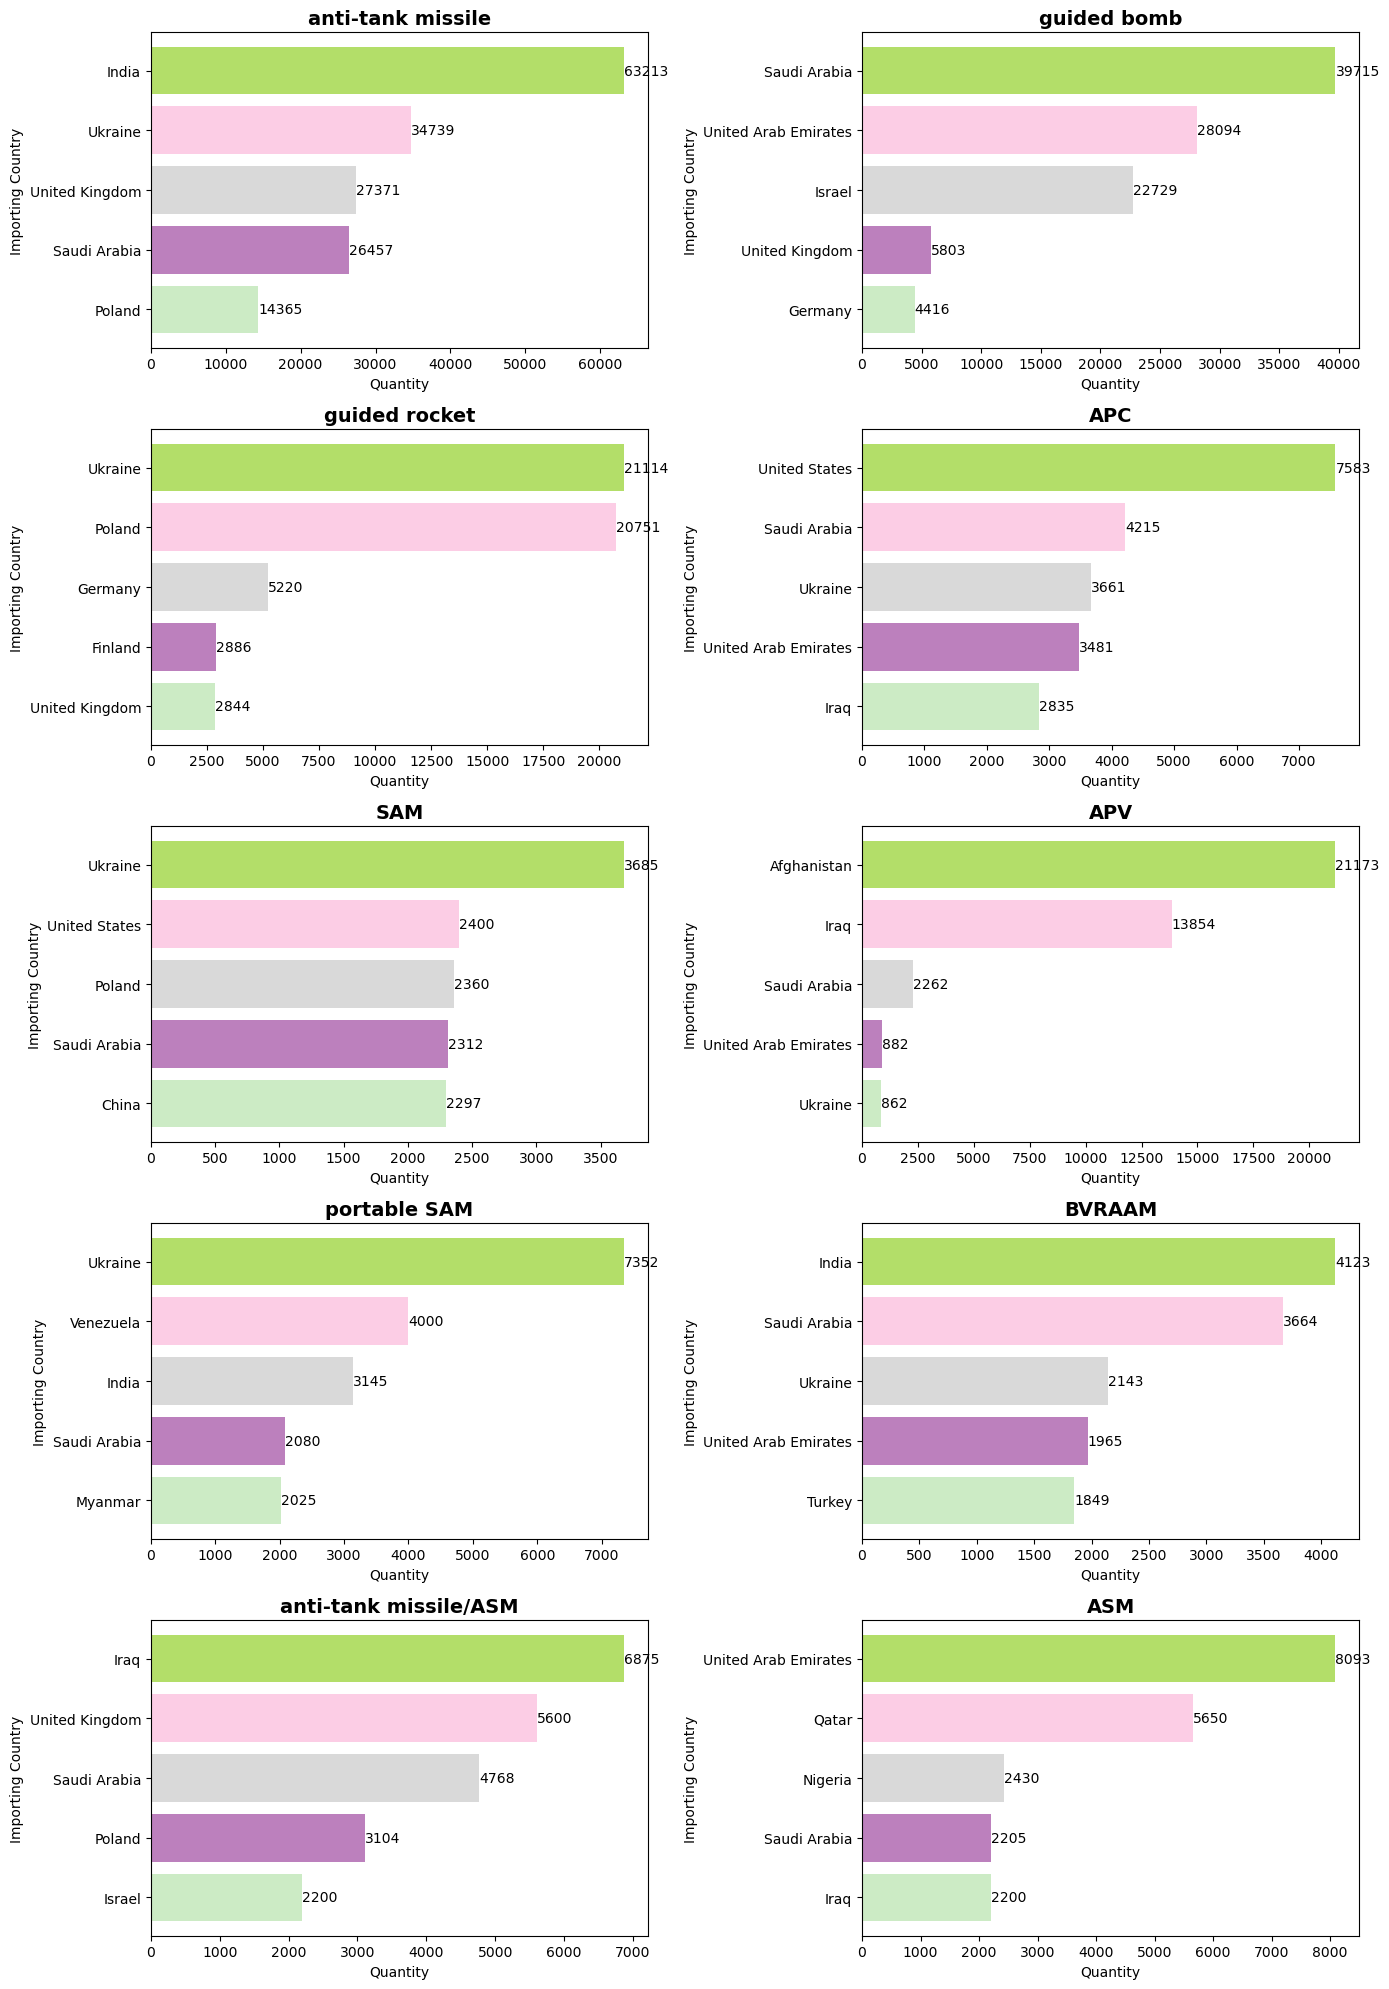

In [64]:
# Create 5x2 subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))
axes = axes.flatten()  # Convert 2D axes array into a 1D list for easier indexing

# Get unique top 10 item categories
top_categories_list = result['Item_Category'].unique()

color_palette = ['#B3DE69', '#FCCDE5', '#D9D9D9', '#BC80BD', '#CCEBC5', '#FFED6F']

# Loop through each category and plot its top 5 buyers
for i, category in enumerate(top_categories_list):
    if i < len(axes):  # Prevent index error if fewer than 10 categories
        ax = axes[i]  # Select the corresponding subplot

        # Filter data for the current category
        category_data = result[result['Item_Category'] == category]

        colors = color_palette[:len(top_items)]

        # Plot bar chart
        ax.barh(category_data['Importing_Country'], category_data['No_Of_Quantity'], color=colors)

        # Add labels inside bars
        for bar in ax.patches:
            try:
                ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
                        f'{int(bar.get_width())}', ha='left', va='center', fontsize=10)
            except Exception:
                pass  # Ignore errors in case of empty bars

        # Set labels and title
        ax.set_title(category, fontsize=14, fontweight='bold')
        ax.set_xlabel('Quantity')
        ax.set_ylabel('Importing Country')
        ax.invert_yaxis()  # Invert so highest values appear on top

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

# Observation :

- Anti-tank missiles = top traded category.
- India, 🇺🇦 Ukraine, 🇸🇦 Saudi Arabia = largest buyers of anti-tank systems.
- Guided bombs & rockets dominate in Middle East & Ukraine.
- Demand Signals: Rising focus on precision strikes & mobile defenses.

# 14
**Top 10 Importing Country & their Top 5 buying Item_Category :**

In [65]:
# Get the top 10 importing countries based on total quantity
top_10_countries = df.groupby('Importing_Country', as_index=False)['No_Of_Quantity'].sum().nlargest(10, 'No_Of_Quantity')

# Get top 5 imported items per country
top_5_items_per_country = (
    df[df['Importing_Country'].isin(top_10_countries['Importing_Country'])]
    .groupby(['Importing_Country', 'Item_Category'], as_index=False)['No_Of_Quantity'].sum()
    .sort_values(['Importing_Country', 'No_Of_Quantity'], ascending=[True, False])
    .groupby('Importing_Country').head(5)  # Get top 5 items per country
)

# Merge before sorting to prevent errors
result = (
    top_5_items_per_country.merge(top_10_countries, on='Importing_Country', suffixes=('', '_Total'))
    .sort_values(['No_Of_Quantity_Total', 'No_Of_Quantity'], ascending=[False, False])
)

# Display result
print("\nTop 10 Importing Countries & Their Top 5 Imported Item Categories (Descending Order)\n")
print(result[['Importing_Country', 'Item_Category', 'No_Of_Quantity']])


Top 10 Importing Countries & Their Top 5 Imported Item Categories (Descending Order)

       Importing_Country          Item_Category  No_Of_Quantity
25          Saudi Arabia            guided bomb           39715
26          Saudi Arabia      anti-tank missile           26457
27          Saudi Arabia  anti-tank missile/ASM            4768
28          Saudi Arabia                    APC            4215
29          Saudi Arabia         vehicle engine            4203
30               Ukraine      anti-tank missile           34739
31               Ukraine          guided rocket           21114
32               Ukraine           guided shell            7405
33               Ukraine           portable SAM            7352
34               Ukraine                    SAM            3685
5                  India      anti-tank missile           63213
6                  India                 BVRAAM            4123
7                  India           guided shell            3300
8                

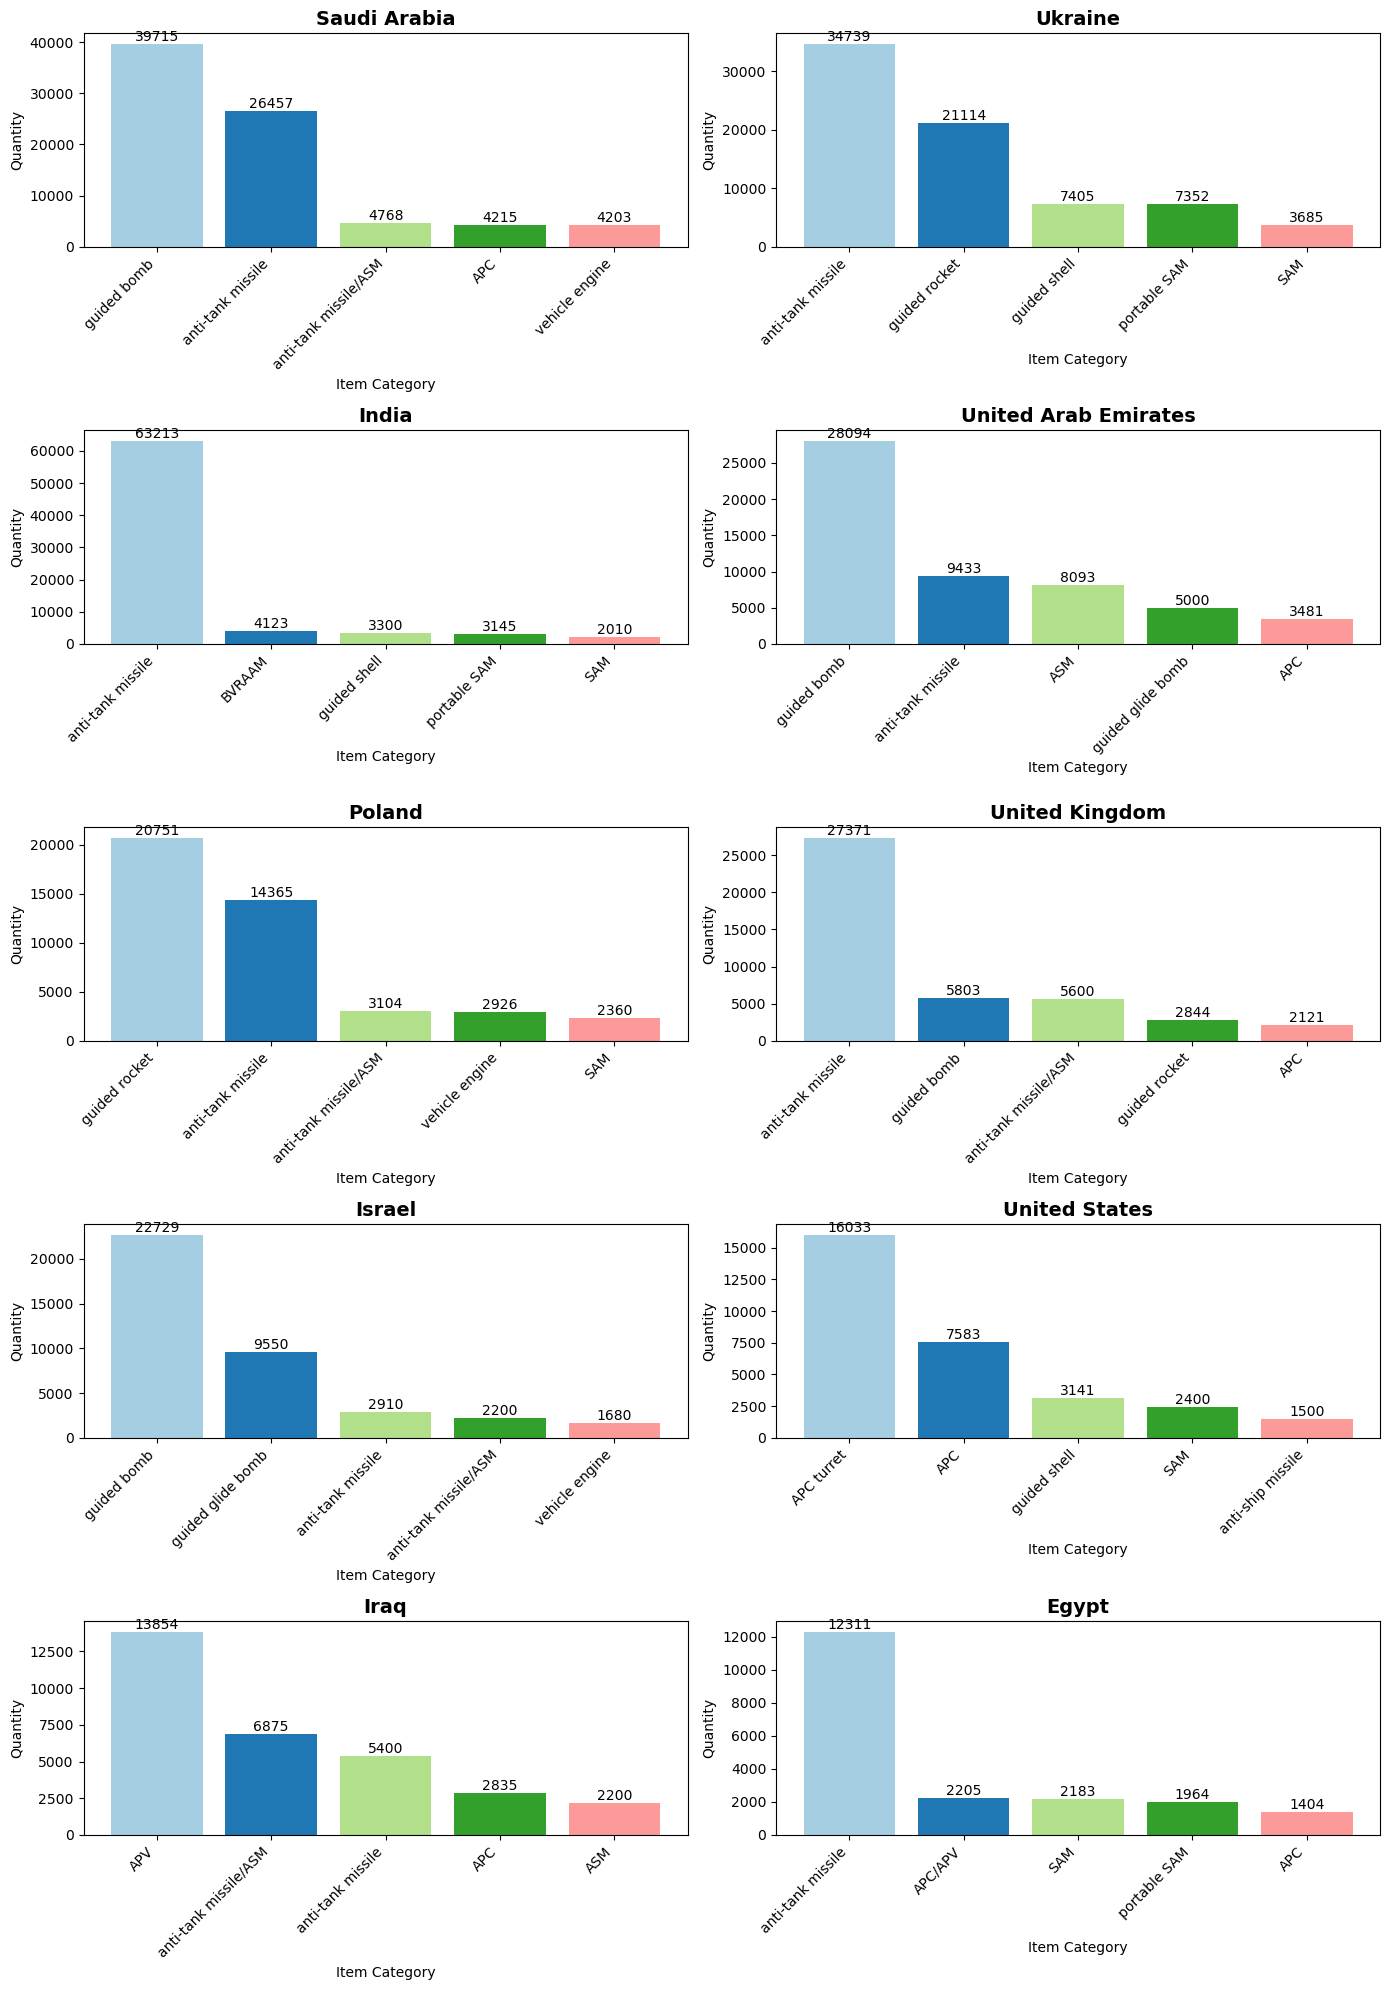

In [66]:
# Create subplots (5 rows × 2 columns)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))
axes = axes.flatten()  # Flatten for easy iteration

# Get unique top 10 importing countries
top_countries_list = result['Importing_Country'].unique()

color_palette = ['#A6CEE3', '#1F78B4', '#B2DF8A', '#33A02C', '#FB9A99', '#E31A1C']

# Loop through each country and plot its top 5 imported item categories
for i, country in enumerate(top_countries_list):
    ax = axes[i]  # Select the corresponding subplot

    # Filter data for the current country
    country_data = result[result['Importing_Country'] == country]
    
    colors = color_palette[:len(top_items)]

    # Plot bar chart (Items on X-axis, Quantity on Y-axis)
    ax.bar(country_data['Item_Category'], country_data['No_Of_Quantity'], color=colors)

    # Add labels inside bars
    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
                f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=10)

    # Set labels and title
    ax.set_title(f"{country}", fontsize=14, fontweight='bold')
    ax.set_xlabel('Item Category')
    ax.set_ylabel('Quantity')
    ax.set_xticklabels(country_data['Item_Category'], rotation=45, ha='right')  # Rotate for better readability

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

# Observation :

- Saudi Arabia tops, prioritizing guided bombs, ATGMs, and APCs.
- Ukraine imports broad spectrum — from rockets to SAMs.
- India specializes in anti-tank & air-to-air missile imports.

# 15
**Top 10 Item Category and their Top 5 Exporting Country :**

In [67]:
# Get top 10 item categories based on quantity
top_categories = df.groupby('Item_Category', as_index=False)['No_Of_Quantity'].sum().nlargest(10, 'No_Of_Quantity')

# Filter data for only these top categories
filtered_df = df[df['Item_Category'].isin(top_categories['Item_Category'])]

# Get top 5 sellers (exporting countries) for each category
top_buyers = (
    filtered_df.groupby(['Item_Category', 'Exporting_Country'], as_index=False)['No_Of_Quantity'].sum()
    .groupby('Item_Category').apply(lambda x: x.nlargest(5, 'No_Of_Quantity'))
    .reset_index(drop=True)
)

# Rename columns to avoid '_x' and '_y' issues after merging
top_categories = top_categories.rename(columns={'No_Of_Quantity': 'Total_Quantity'})

# Sort by total category quantity, then country quantity (both descending)
result = top_buyers.merge(top_categories, on='Item_Category').sort_values(
    ['Total_Quantity', 'No_Of_Quantity'], ascending=[False, False]
)

# Display the result
print("\nTop 10 Item Categories & Their Top 5 Sellers (Descending Order)\n")
print(result[['Item_Category', 'Exporting_Country', 'No_Of_Quantity']])


Top 10 Item Categories & Their Top 5 Sellers (Descending Order)

            Item_Category Exporting_Country  No_Of_Quantity
25      anti-tank missile     United States          102739
26      anti-tank missile            Russia          101540
27      anti-tank missile            Israel           40246
28      anti-tank missile            Sweden           29650
29      anti-tank missile           Ukraine           10441
32            guided bomb     United States          128074
33            guided bomb      South Africa            4010
34            guided bomb    United Kingdom            2800
35            guided bomb            Israel            2450
36            guided bomb             China            1150
37          guided rocket     United States           55401
38          guided rocket       South Korea           10000
39          guided rocket    United Kingdom             820
40          guided rocket            Israel             388
41          guided rocket         

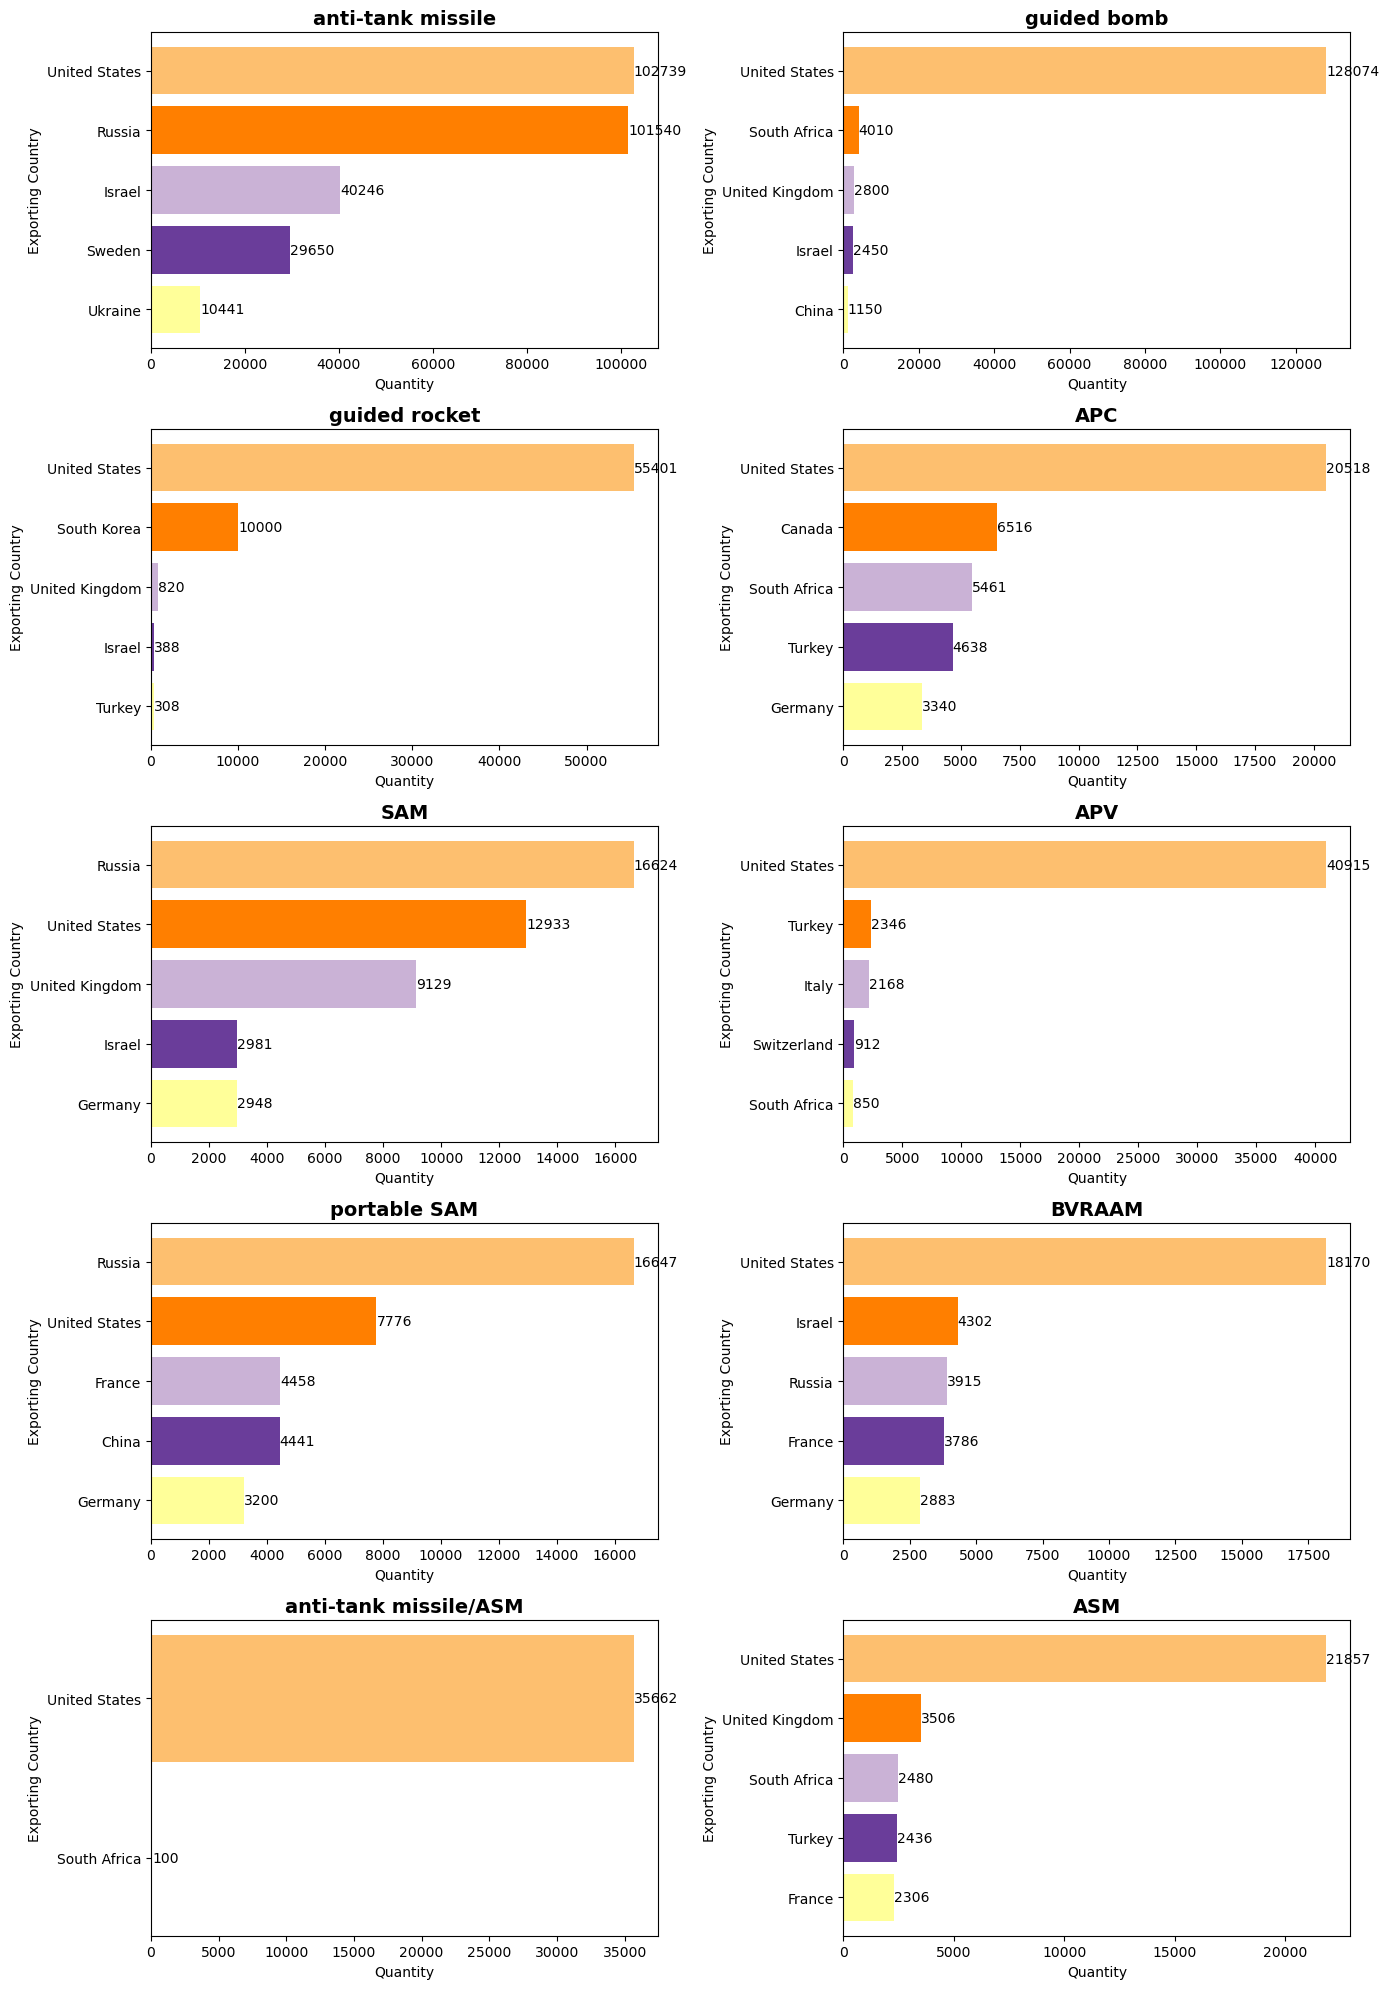

In [68]:
# Create 5x2 subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))
axes = axes.flatten()  # Convert 2D axes array into a 1D list for easier indexing

# Get unique top 10 item categories
top_categories_list = result['Item_Category'].unique()

color_palette = ['#FDBF6F', '#FF7F00', '#CAB2D6', '#6A3D9A', '#FFFF99', '#B15928']

# Loop through each category and plot its top 5 buyers
for i, category in enumerate(top_categories_list):
    ax = axes[i]  # Select the corresponding subplot

    # Filter data for the current category
    category_data = result[result['Item_Category'] == category]
    
    colors = color_palette[:len(top_items)]

    # Plot bar chart
    ax.barh(category_data['Exporting_Country'], category_data['No_Of_Quantity'], color=colors)
    
    # Add labels inside bars
    for bar in ax.patches:
        ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
                f'{int(bar.get_width())}', ha='left', va='center', fontsize=10)

    # Set labels and title
    ax.set_title(category, fontsize=14, fontweight='bold')
    ax.set_xlabel('Quantity')
    ax.set_ylabel('Exporting Country')
    ax.invert_yaxis()  # Invert so highest values appear on top

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

# Observation :

- Missiles (Anti-tank, SAM, BVRAAM, ASM) dominate arms exports.
- USA leads across multiple categories — guided bombs, rockets, APCs, and anti-tank systems.
- Russia excels in SAMs, anti-tank missiles, and portable SAMs.
- Israel’s niche: anti-tank & BVRAAM exports, plus some guided bombs.
- South Africa, Sweden, and Turkey carve out space in APCs, guided bombs & rockets.

# 16
**Top 10 Exporting Country & their Top 5 Selling Item_Category :**

In [69]:
# Get the top 10 exporting countries based on total quantity
top_10_exporters = df.groupby('Exporting_Country', as_index=False)['No_Of_Quantity'].sum().nlargest(10, 'No_Of_Quantity')

# Rename total quantity column before merging
top_10_exporters = top_10_exporters.rename(columns={'No_Of_Quantity': 'Total_Quantity'})

# Filter dataset to include only these top 10 exporters
filtered_data = df[df['Exporting_Country'].isin(top_10_exporters['Exporting_Country'])]

# Get the top 5 exported item categories per country
top_10_items_per_exporter = (
    filtered_data.groupby(['Exporting_Country', 'Item_Category'], as_index=False)['No_Of_Quantity'].sum()
    .sort_values(['Exporting_Country', 'No_Of_Quantity'], ascending=[True, False])
    .groupby('Exporting_Country').head(5)  # Get top 5 items per country
)

# Merge with top exporters for final sorting
result = (
    top_10_items_per_exporter.merge(top_10_exporters, on='Exporting_Country')
    .sort_values(['Total_Quantity', 'No_Of_Quantity'], ascending=[False, False])
)

# Display result
print("\nTop 10 Exporters & Their Top 5 Selling Item Categories (Descending Order)\n")
print(result[['Exporting_Country', 'Item_Category', 'No_Of_Quantity']])


Top 10 Exporters & Their Top 5 Selling Item Categories (Descending Order)

   Exporting_Country          Item_Category  No_Of_Quantity
45     United States            guided bomb          128074
46     United States      anti-tank missile          102739
47     United States          guided rocket           55401
48     United States                    APV           40915
49     United States  anti-tank missile/ASM           35662
25            Russia      anti-tank missile          101540
26            Russia           portable SAM           16647
27            Russia                    SAM           16624
28            Russia                 BVRAAM            3915
29            Russia                   tank            3130
15            Israel      anti-tank missile           40246
16            Israel                 BVRAAM            4302
17            Israel                    SAM            2981
18            Israel            guided bomb            2450
19            Israel    

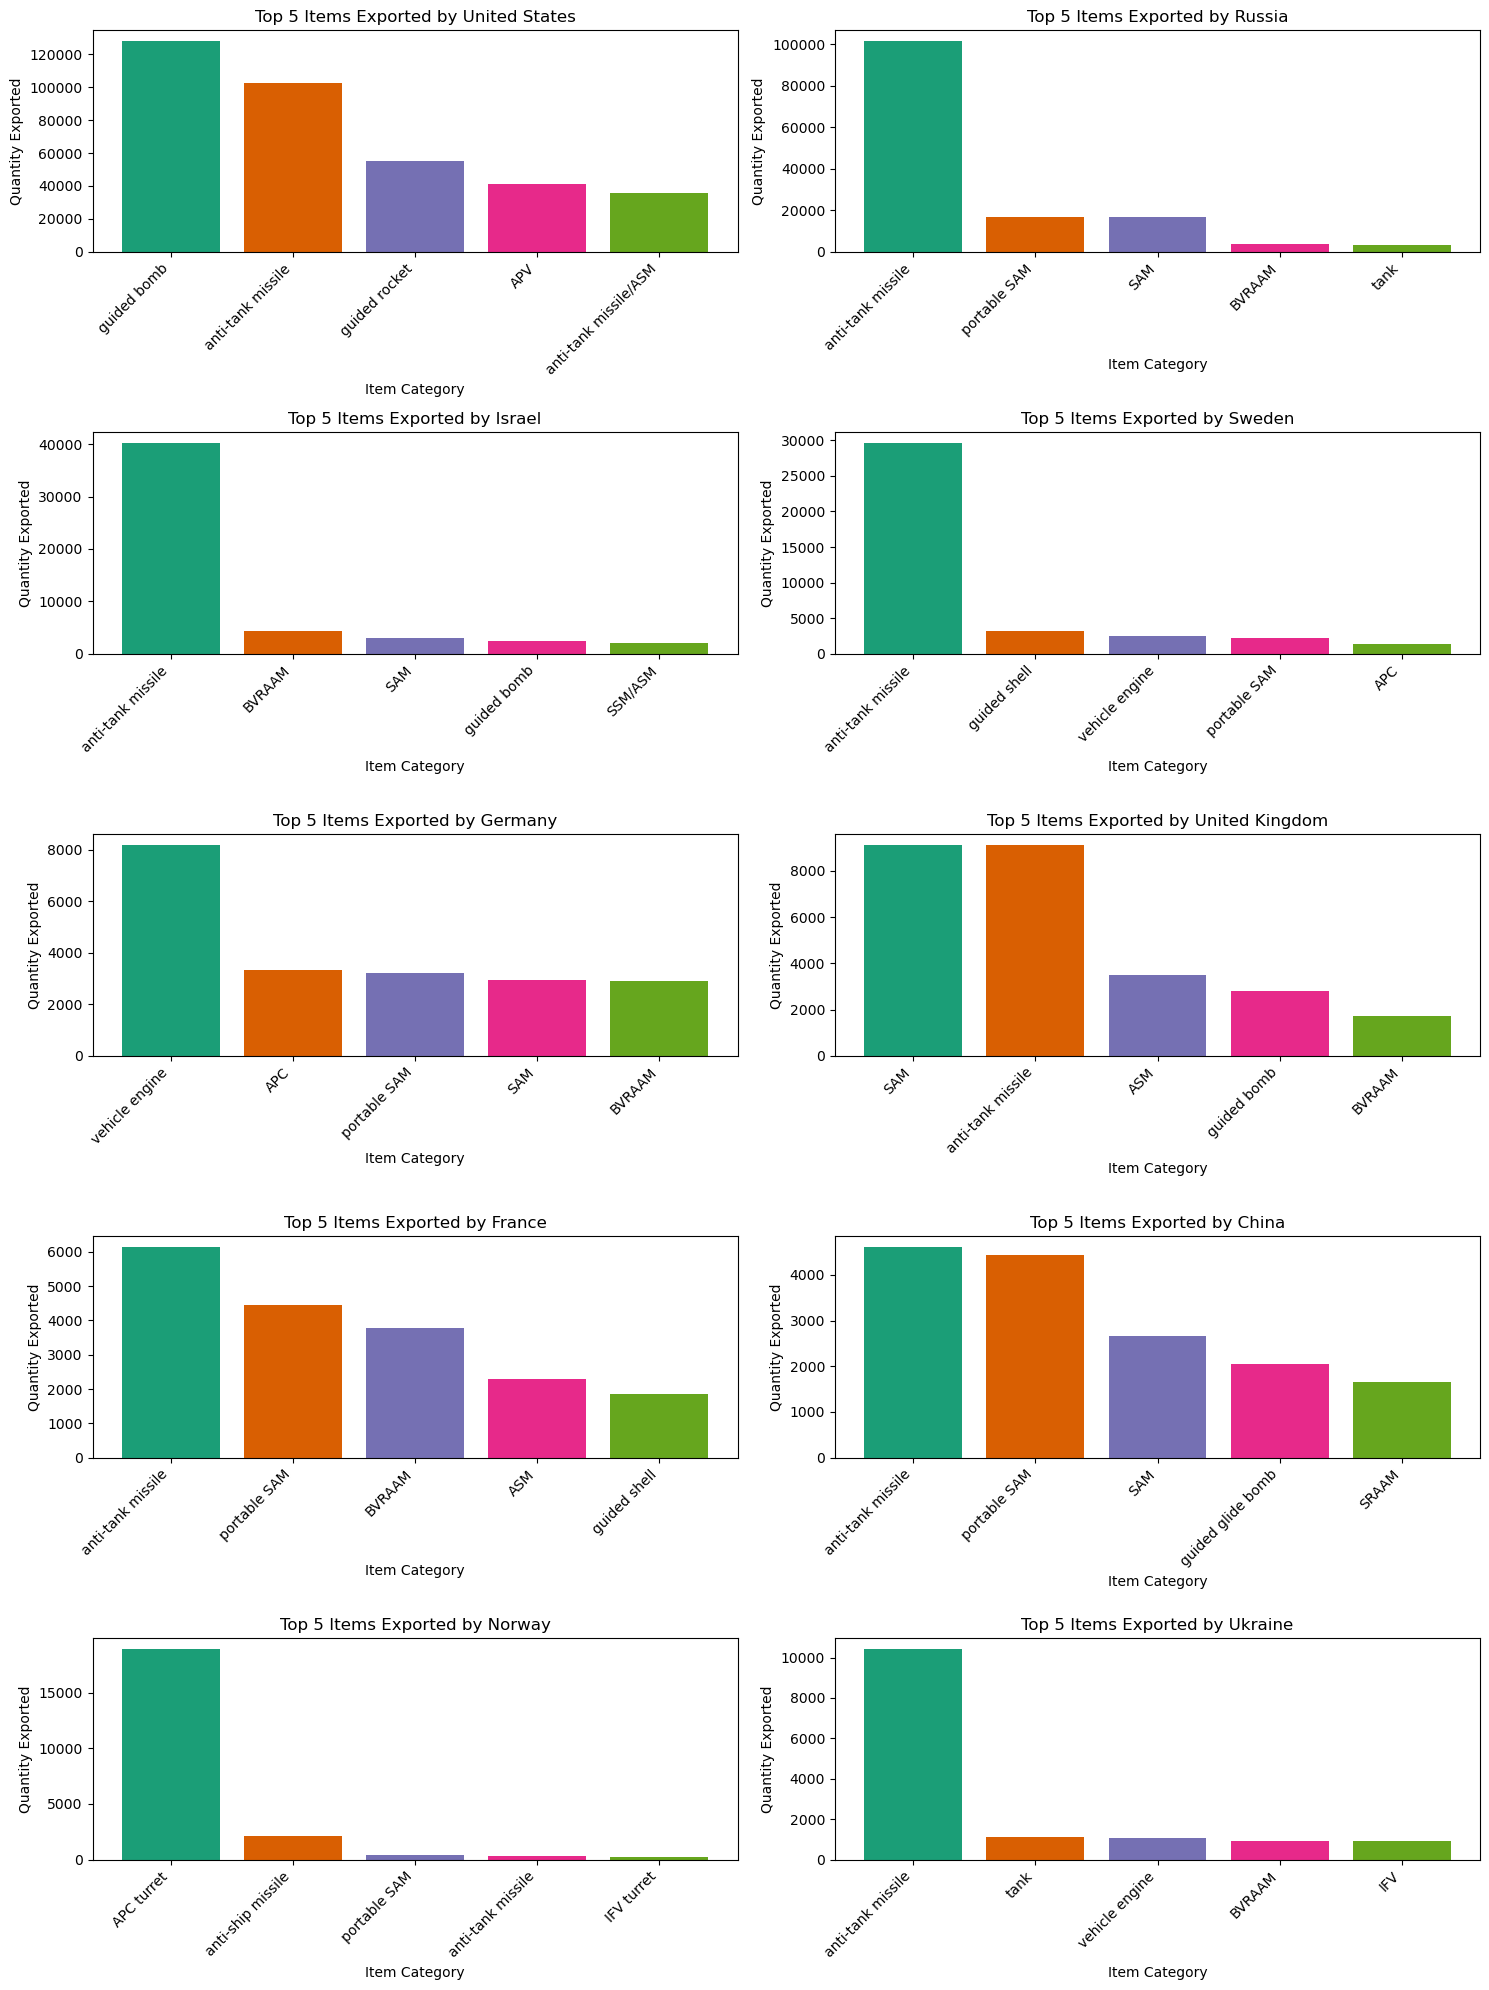

In [70]:
# Create a 5-row, 2-column subplot layout
fig, axes = plt.subplots(5, 2, figsize=(15, 20))  # Adjust figure size
axes = axes.flatten()  # Flatten for easy iteration

# Get unique top 10 exporting countries
top_countries_list = result['Exporting_Country'].unique()

color_palette = ['#1B9E77', '#D95F02', '#7570B3', '#E7298A', '#66A61E', '#E6AB02', '#A6761D', '#666666']

# Loop through each country and plot its top 5 exported item categories
for i, country in enumerate(top_countries_list):
    ax = axes[i]
    
    # Get data for the current country and sort by quantity in descending order
    country_data = result[result['Exporting_Country'] == country].sort_values('No_Of_Quantity', ascending=False)
    
    colors = color_palette[:len(top_items)]

    # Plot bar chart
    ax.bar(country_data['Item_Category'], country_data['No_Of_Quantity'],color = colors)
    
    # Rotate x-axis labels for better readability
    ax.set_xticklabels(country_data['Item_Category'], rotation=45, ha='right')
    
    # Set labels and title
    ax.set_ylabel("Quantity Exported")
    ax.set_xlabel("Item Category")
    ax.set_title(f"Top 5 Items Exported by {country}")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Observation :

- US is an all-rounder — top exporter of guided bombs, anti-tank missiles, rockets, and vehicles.
- Russia leans heavily on missile and SAM systems, with strong portable SAM sales.
- Israel’s export focus is precision-heavy, led by anti-tank missiles and BVRAAM.
- Sweden’s portfolio is ATGM-heavy, plus engines and niche shells.
- Germany splits between engines, SAMs, and armored platforms.

# 17
**Item_Weapon Category and their top 5 Importing Country :**

In [71]:
# Step 1: Get total quantity for each Item_Weapon_Category (only top 11 categories)
weapon_category_quantity = (
    df.groupby('Item_Weapon_Category', as_index=False)['No_Of_Quantity'].sum()
    .nlargest(11, 'No_Of_Quantity')
)

# Rename total quantity column before merging
weapon_category_quantity = weapon_category_quantity.rename(columns={'No_Of_Quantity': 'Total_Quantity'})

# Step 2: Filter dataset for these top 11 categories
filtered_data = df[df['Item_Weapon_Category'].isin(weapon_category_quantity['Item_Weapon_Category'])]

# Step 3: Get the top 5 importing countries per weapon category
top_10_buyers_per_category = (
    filtered_data.groupby(['Item_Weapon_Category', 'Importing_Country'], as_index=False)['No_Of_Quantity'].sum()
    .sort_values(['Item_Weapon_Category', 'No_Of_Quantity'], ascending=[True, False])
    .groupby('Item_Weapon_Category').head(5)  # Select top 5 buyers per category
)

# Step 4: Merge to sort first by total category quantity, then by country-wise quantity
result = (
    top_10_buyers_per_category.merge(weapon_category_quantity, on='Item_Weapon_Category')
    .sort_values(['Total_Quantity', 'No_Of_Quantity'], ascending=[False, False])
)

# Step 5: Display result
print("\nItem Weapon Category & Their Top 5 Buyers (Descending Order)\n")
print(result[['Item_Weapon_Category', 'Importing_Country', 'No_Of_Quantity']])


Item Weapon Category & Their Top 5 Buyers (Descending Order)

   Item_Weapon_Category     Importing_Country  No_Of_Quantity
25             Missiles          Saudi Arabia           87446
26             Missiles               Ukraine           83486
27             Missiles                 India           80880
28             Missiles  United Arab Emirates           60909
29             Missiles                Poland           44813
10    Armoured vehicles           Afghanistan           22523
11    Armoured vehicles                  Iraq           18090
12    Armoured vehicles          Saudi Arabia            7823
13    Armoured vehicles               Ukraine            7718
14    Armoured vehicles         United States            7583
20              Engines          Saudi Arabia            4508
21              Engines                Poland            3076
22              Engines                Turkey            2876
23              Engines                 India            2677
24     

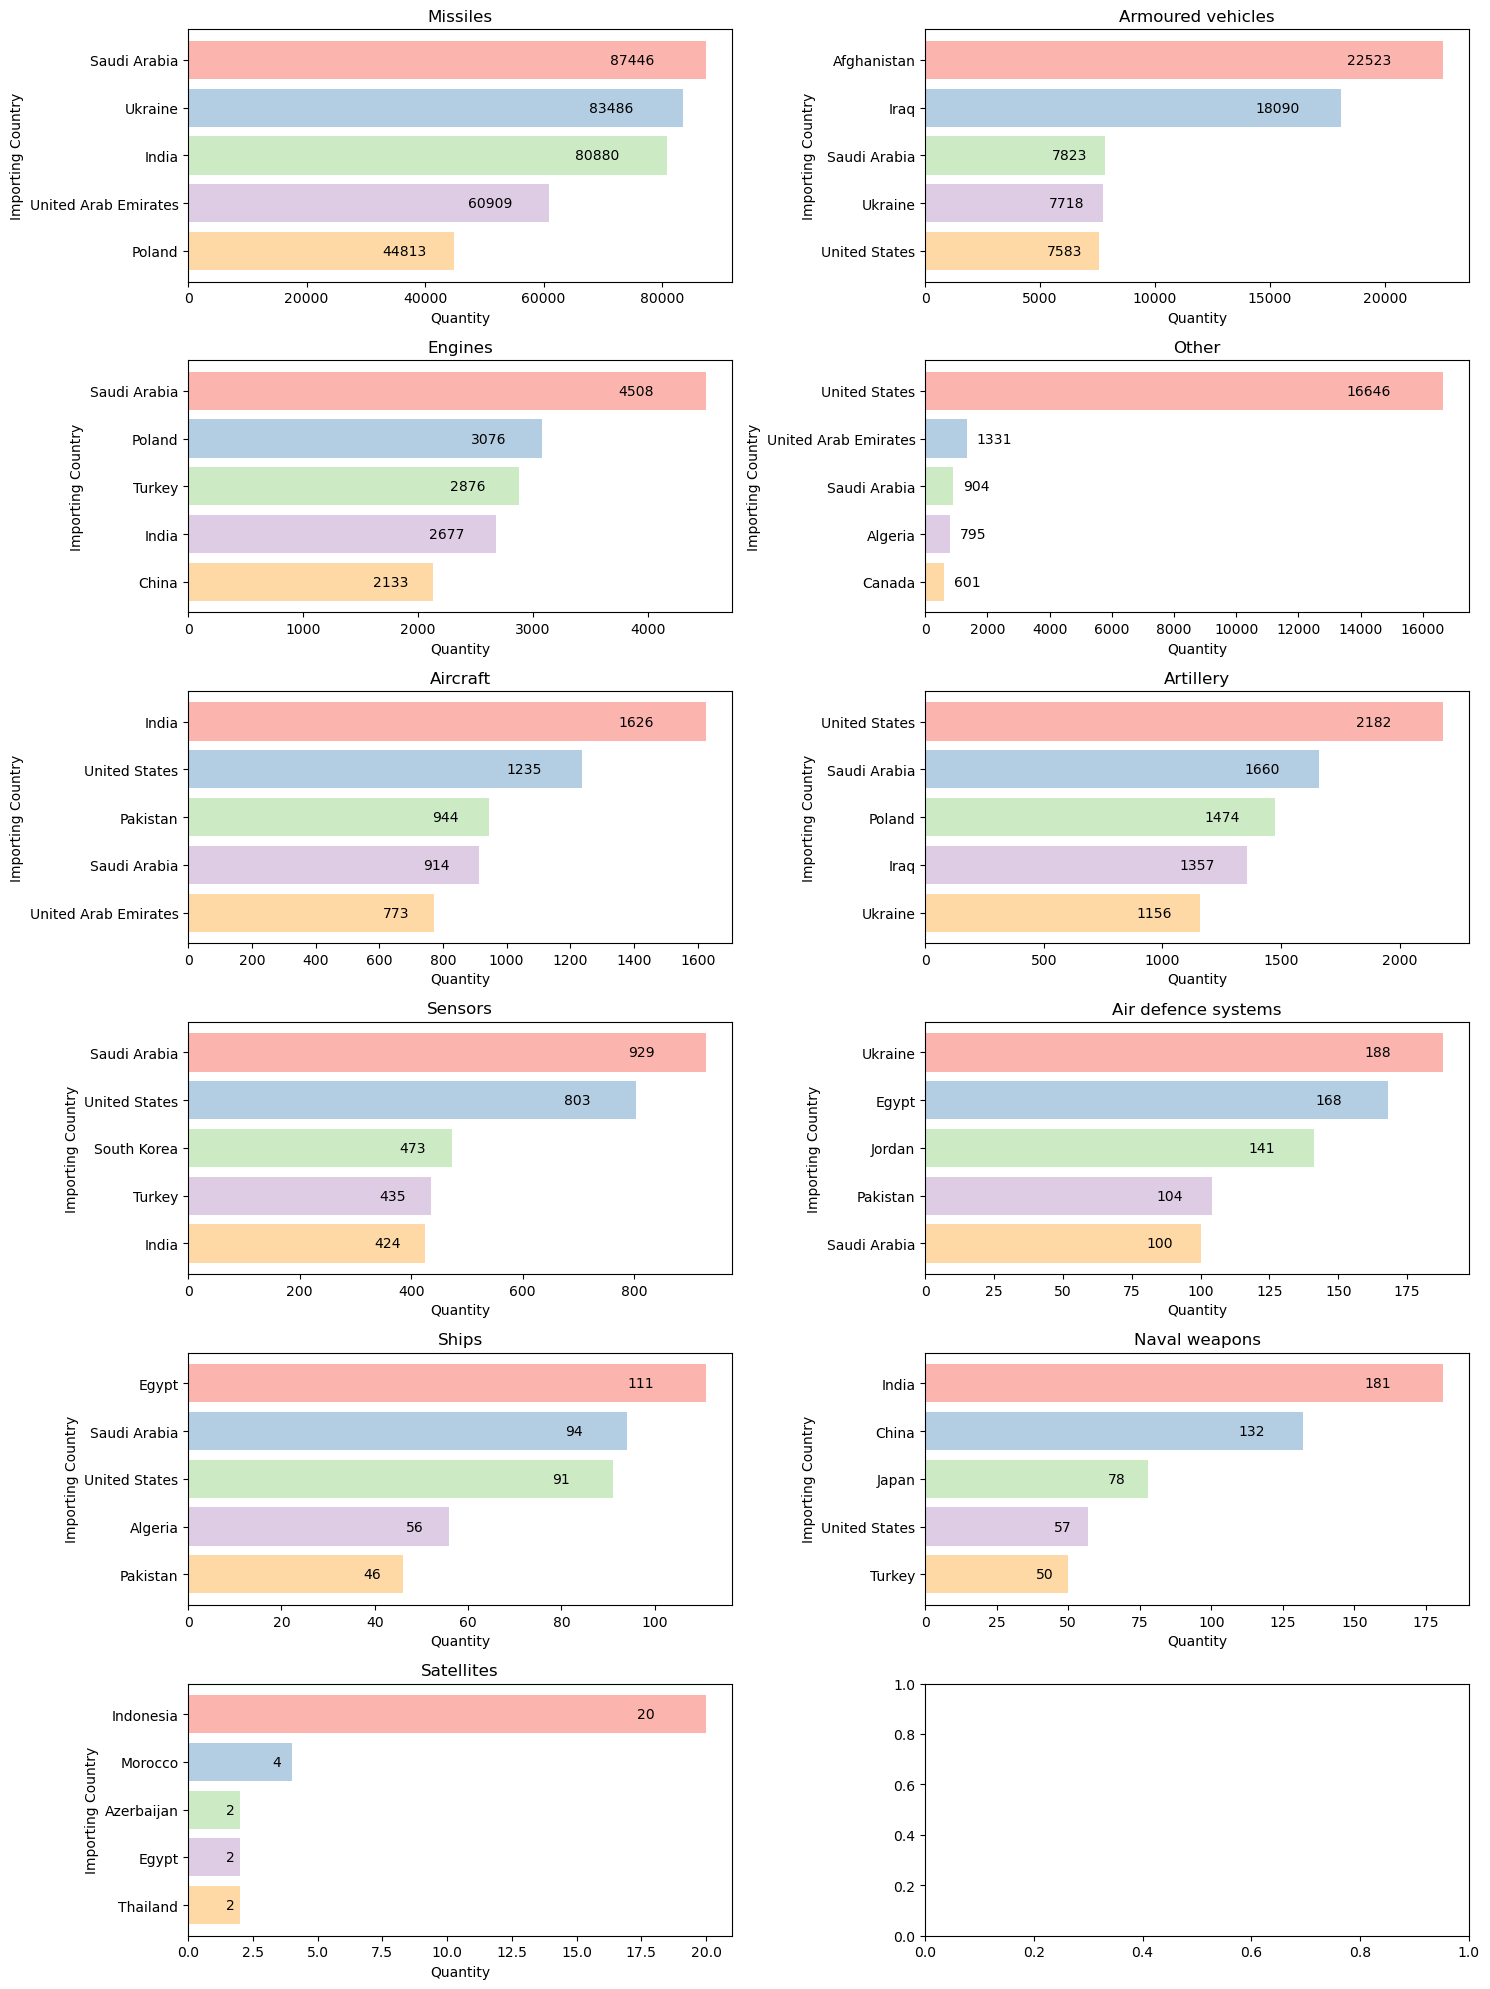

In [72]:
# Get unique weapon categories
weapon_categories = result['Item_Weapon_Category'].unique()

# Create subplots (6 rows, 2 columns to fit 11 categories)
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))
axes = axes.flatten()  # Flatten for easy iteration

color_palette = ['#FBB4AE', '#B3CDE3', '#CCEBC5', '#DECBE4', '#FED9A6']

# Loop through each weapon category and plot its buyers
for i, category in enumerate(weapon_categories):
    ax = axes[i]

    # Filter data for the current category
    category_data = result[result['Item_Weapon_Category'] == category]

    # Sort data for clear visualization
    category_data = category_data.sort_values(by='No_Of_Quantity', ascending=False)
    
    colors = color_palette[:len(top_items)]


    # Plot horizontal bar chart
    bars = ax.barh(category_data['Importing_Country'], category_data['No_Of_Quantity'], color=colors)

    # Add quantity labels inside for large bars, outside for small bars
    for bar in bars:
        width = bar.get_width()
        text_position = width - (width * 0.1)  # Inside for large bars
        ha_position = 'right'  # Default inside

        if width < max(category_data['No_Of_Quantity']) * 0.1:  # If bar is small, place text outside
            text_position = width + (max(category_data['No_Of_Quantity']) * 0.02)
            ha_position = 'left'

        ax.text(text_position, 
                bar.get_y() + bar.get_height()/2, 
                f'{int(width)}', 
                ha=ha_position, va='center', fontsize=10, 
                color='black' if ha_position == 'right' else 'black' 
                )

    ax.set_title(category)
    ax.set_xlabel('Quantity')
    ax.set_ylabel('Importing Country')
    ax.invert_yaxis()  # Highest quantity on top

plt.tight_layout()
plt.show()

# Observation :

- Missiles dominate demand globally — Saudi Arabia, Ukraine, India are top buyers.
- Armored vehicles see concentrated demand — Afghanistan, Iraq, and Ukraine stand out.
- Engines (critical enablers) — high demand in Saudi Arabia, Poland, and Turkey.
- Smaller categories like sensors & naval weapons have niche but stable buyers.
- Air defense system imports are low but focused — Ukraine, Egypt, Jordan.

# 18
**Top 10 Importing Country and their top 5 Buying Item_weapon Category :**

In [73]:
# Step 1: Get the top 10 importing countries based on total quantity
top_10_countries = df.groupby('Importing_Country', as_index=False)['No_Of_Quantity'].sum().nlargest(10, 'No_Of_Quantity')

# Step 2: Filter the dataset for only these top 10 importing countries
filtered_data = df[df['Importing_Country'].isin(top_10_countries['Importing_Country'])]

# Step 3: Get top 5 buying Item_Weapon_Categories per country
top_5_weapon_categories_per_country = (
    filtered_data.groupby(['Importing_Country', 'Item_Weapon_Category'], as_index=False)['No_Of_Quantity'].sum()
    .sort_values(['Importing_Country', 'No_Of_Quantity'], ascending=[True, False])
    .groupby('Importing_Country').head(5)  # Select top 5 categories per country
)

# Step 4: Merge to retain sorting by total country quantity
result = (
    top_5_weapon_categories_per_country.merge(top_10_countries, on='Importing_Country', suffixes=('', '_Total'))
    .sort_values(['No_Of_Quantity_Total', 'No_Of_Quantity'], ascending=[False, False])
)

# Step 5: Display the result
print("\nTop 10 Importing Countries & Their Top 5 Buying Item_Weapon_Categories (Descending Order)\n")
print(result[['Importing_Country', 'Item_Weapon_Category', 'No_Of_Quantity']])


Top 10 Importing Countries & Their Top 5 Buying Item_Weapon_Categories (Descending Order)

       Importing_Country Item_Weapon_Category  No_Of_Quantity
25          Saudi Arabia             Missiles           87446
26          Saudi Arabia    Armoured vehicles            7823
27          Saudi Arabia              Engines            4508
28          Saudi Arabia            Artillery            1660
29          Saudi Arabia              Sensors             929
30               Ukraine             Missiles           83486
31               Ukraine    Armoured vehicles            7718
32               Ukraine            Artillery            1156
33               Ukraine             Aircraft             304
34               Ukraine  Air defence systems             188
5                  India             Missiles           80880
6                  India    Armoured vehicles            3130
7                  India              Engines            2677
8                  India             Air

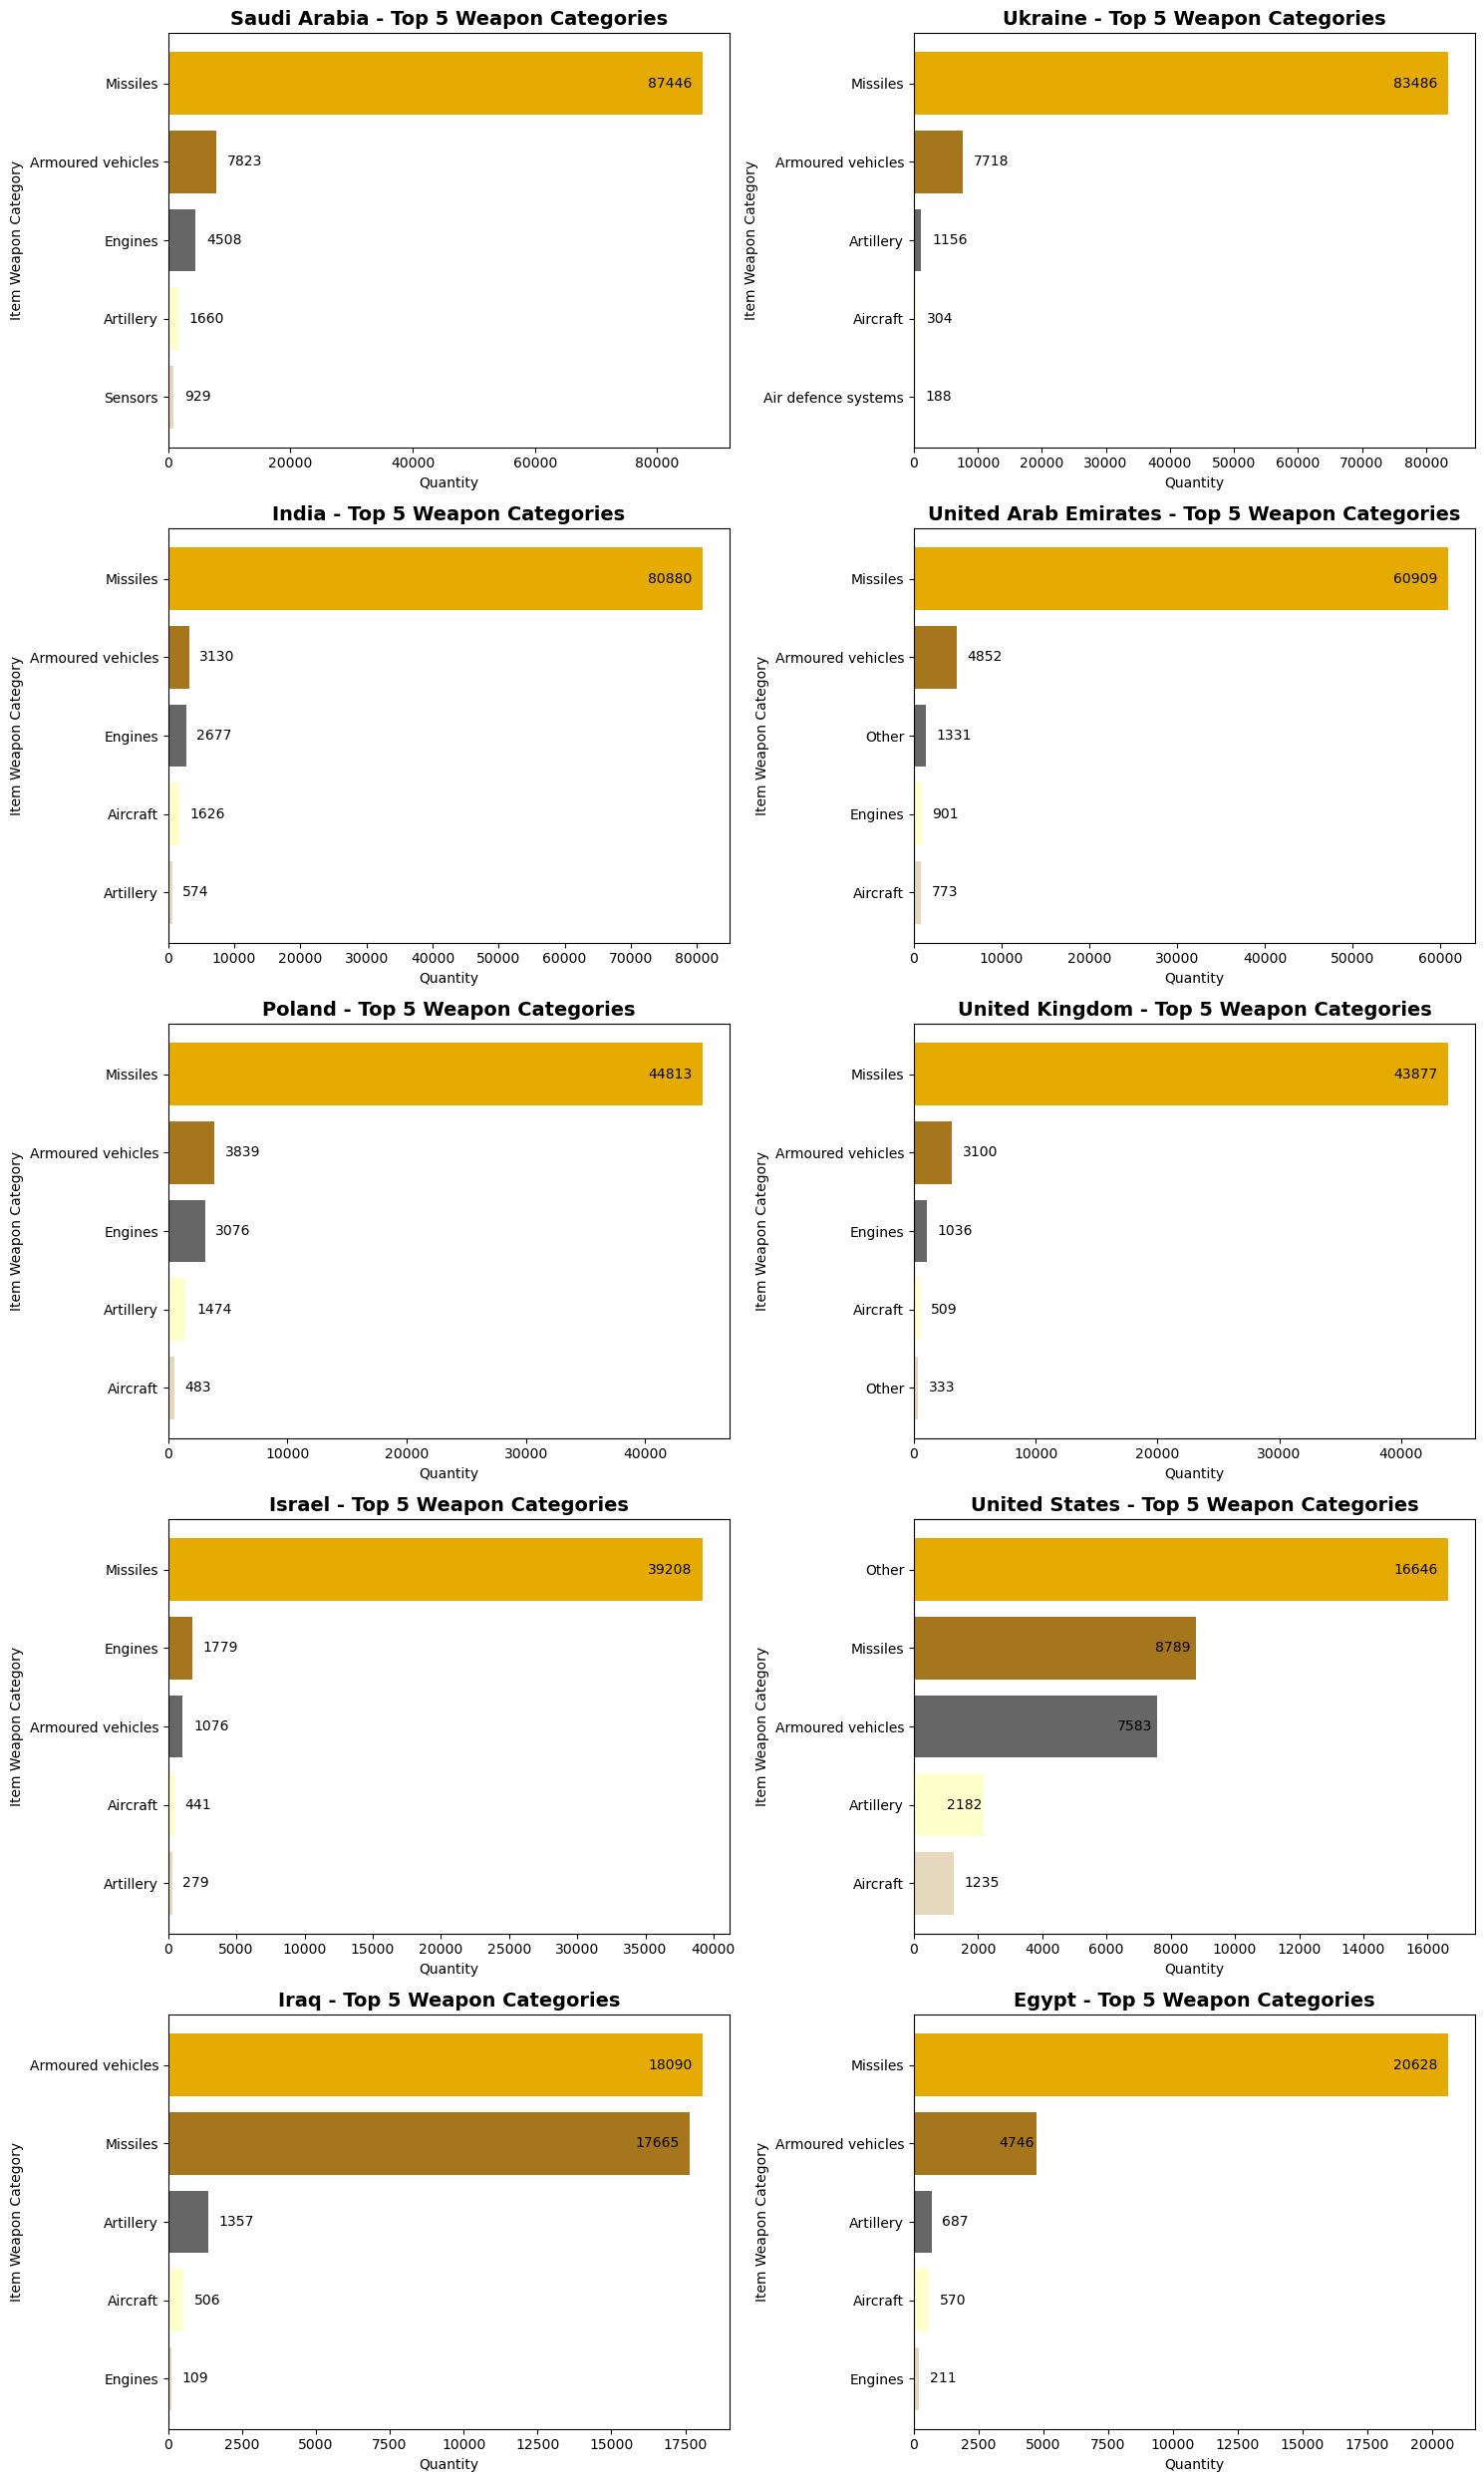

In [74]:
# Get unique top 10 importing countries from the result
top_countries = result['Importing_Country'].unique()

# Create subplots (5 rows, 2 columns)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
axes = axes.flatten()  # Flatten for easy iteration

color_palette = ['#E6AB02', '#A6761D', '#666666', '#FFFFCC', '#E5D8BD', '#FDDAEC', '#F2F2F2']

# Loop through each country and plot its top 5 buying Item_Weapon_Category
for i, country in enumerate(top_countries):
    if i >= len(axes):  # Avoid index error if fewer than 10 countries
        break

    ax = axes[i]

    # Filter data for the current country and sort
    country_data = result[result['Importing_Country'] == country].sort_values(by='No_Of_Quantity', ascending=False)
    
    colors = color_palette[:len(top_items)]

    # Plot bar chart
    bars = ax.barh(country_data['Item_Weapon_Category'], country_data['No_Of_Quantity'], color=colors)
    ax.set_title(f"{country} - Top 5 Weapon Categories", fontsize=14, fontweight='bold')
    ax.set_xlabel('Quantity')
    ax.set_ylabel('Item Weapon Category')
    ax.invert_yaxis()  # Highest quantity on top

    # Add quantity labels inside bars
    max_width = country_data['No_Of_Quantity'].max()  # Get max quantity for relative label placement
    for bar in bars:
        width = bar.get_width()
        if width > max_width * 0.1:  # Inside if big
            ax.text(width - (width * 0.02), bar.get_y() + bar.get_height()/2, f'{int(width)}', 
                    ha='right', va='center', color='black', fontsize=10)
        else:  # Outside if small
            ax.text(width + (max_width * 0.02), bar.get_y() + bar.get_height()/2, f'{int(width)}', 
                    ha='left', va='center', color='black', fontsize=10)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

# Observation :

- Saudi Arabia leads missile demand, followed by armored vehicles, engines, artillery, and sensors.
- Ukraine’s wartime shopping cart: missiles, vehicles, artillery, aircraft, air defense.
- India prioritizes missiles, vehicles, engines, and aircraft — diverse, long-term modernization.
- Poland focuses heavily on missiles and vehicles, aligned with its NATO posture.
- Israel’s imports are more balanced — missiles, engines, armor, aircraft, artillery.

- **Countries under active threat diversify purchases (Ukraine).**
- **Stable nations concentrate on deterrence tech (Saudi missiles, Indian modernization).**

# 19
**Item_Weapon Category and their top 5 Exporting Country :**

In [75]:
# Step 1: Get total quantity for each Item_Weapon_Category
weapon_category_quantity = df.groupby('Item_Weapon_Category', as_index=False)['No_Of_Quantity'].sum()

# Step 2: Get the top 11 weapon categories based on quantity
top_11_categories = weapon_category_quantity.nlargest(11, 'No_Of_Quantity')

# Step 3: Filter dataset to include only these top 11 categories
filtered_data = df[df['Item_Weapon_Category'].isin(top_11_categories['Item_Weapon_Category'])]

# Step 4: Get the top 5 exporting countries per weapon category
top_5_sellers_per_category = (
    filtered_data.groupby(['Item_Weapon_Category', 'Exporting_Country'], as_index=False)['No_Of_Quantity'].sum()
    .sort_values(['Item_Weapon_Category', 'No_Of_Quantity'], ascending=[True, False])
    .groupby('Item_Weapon_Category').head(5)  # Select top 5 sellers per category
)

# Step 5: Merge to sort first by total category quantity, then by country-wise quantity
result = (
    top_5_sellers_per_category.merge(top_11_categories, on='Item_Weapon_Category', suffixes=('', '_Total'))
    .sort_values(['No_Of_Quantity_Total', 'No_Of_Quantity'], ascending=[False, False])
)

# Step 6: Display result
print("\nItem Weapon Category & Their Top 5 Sellers (Descending Order)\n")
print(result[['Item_Weapon_Category', 'Exporting_Country', 'No_Of_Quantity']].to_string(index=False))


Item Weapon Category & Their Top 5 Sellers (Descending Order)

Item_Weapon_Category Exporting_Country  No_Of_Quantity
            Missiles     United States          450288
            Missiles            Russia          146948
            Missiles            Israel           54292
            Missiles            Sweden           35572
            Missiles    United Kingdom           27857
   Armoured vehicles     United States           65613
   Armoured vehicles            Canada            8303
   Armoured vehicles            Turkey            7759
   Armoured vehicles      South Africa            7632
   Armoured vehicles           Germany            7237
             Engines     United States           21319
             Engines           Germany           10318
             Engines            Russia            2562
             Engines            Sweden            2531
             Engines           Ukraine            2153
               Other            Norway           19215
 

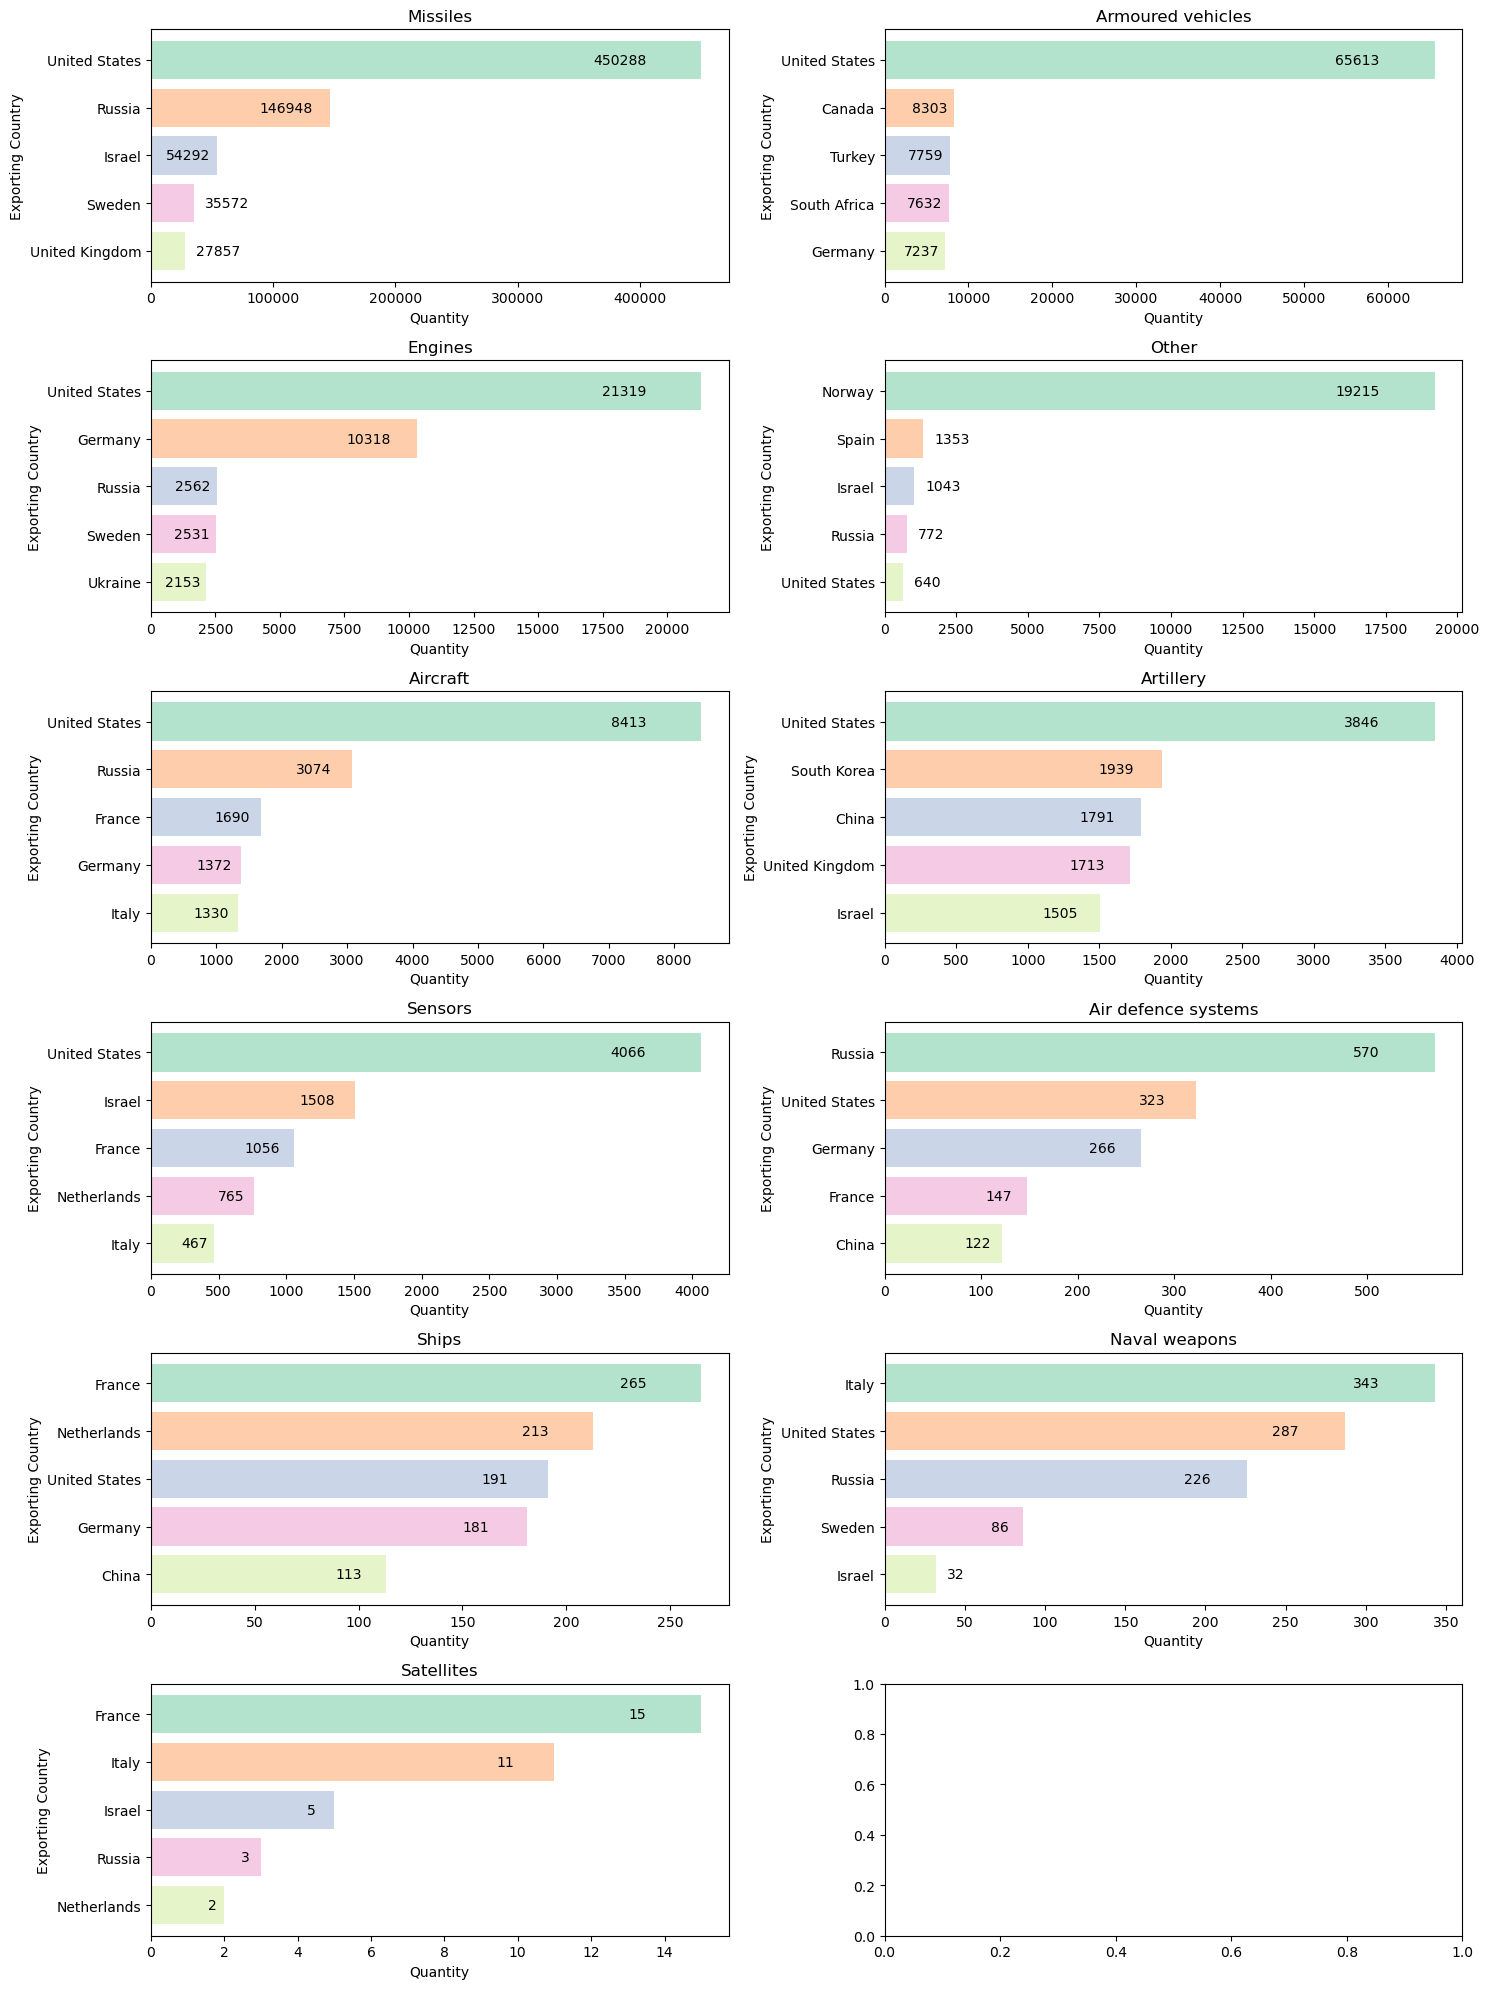

In [76]:
# Get unique weapon categories
weapon_categories = result['Item_Weapon_Category'].unique()

# Create subplots (6 rows, 2 columns to fit 11 categories)
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))
axes = axes.flatten()  # Flatten for easy iteration

color_palette = ['#B3E2CD', '#FDCDAC', '#CBD5E8', '#F4CAE4', '#E6F5C9']

#Loop through each weapon category and plot its buyers
for i, category in enumerate(weapon_categories):
    ax = axes[i]

    # Filter data for the current category
    category_data = result[result['Item_Weapon_Category'] == category]

    # Sort data for clear visualization
    category_data = category_data.sort_values(by='No_Of_Quantity', ascending=False)
    
    colors = color_palette[:len(top_items)]

    # Plot horizontal bar chart
    bars = ax.barh(category_data['Exporting_Country'], category_data['No_Of_Quantity'], color=colors)

    # Add quantity labels inside for large bars, outside for small bars
    for bar in bars:
        width = bar.get_width()
        text_position = width - (width * 0.1)  # Inside for large bars
        ha_position = 'right'  # Default inside

        if width < max(category_data['No_Of_Quantity']) * 0.1:  # If bar is small, place text outside
            text_position = width + (max(category_data['No_Of_Quantity']) * 0.02)
            ha_position = 'left'

        ax.text(text_position, 
                bar.get_y() + bar.get_height()/2, 
                f'{int(width)}', 
                ha=ha_position, va='center', fontsize=10, 
                color='black' if ha_position == 'right' else 'black' 
                )

    ax.set_title(category)
    ax.set_xlabel('Quantity')
    ax.set_ylabel('Exporting Country')
    ax.invert_yaxis()  # Highest quantity on top

plt.tight_layout()
plt.show()

# Observation :

- Missiles dominate exports across categories, with the United States leading by a huge margin (450K+ units), followed by Russia and Israel.
- Armoured vehicles are heavily exported by the United States, with notable contributions from Canada, Turkey, and South Africa.
- Engines exports show strong presence of United States, Germany, and Russia, indicating both tech capability and demand.
- Aircraft & Artillery—the U.S. and Russia dominate, but France, Germany, and Israel also contribute.
- Specialized categories like Sensors, Ships, and Satellites show fragmented export patterns, with France, Israel, and Italy playing key roles.

# 20
**Top 10 Exporting Country and their 5 selling Item_Weapon Category :**

In [77]:
# Step 1: Get the Top 10 Exporting Countries based on Total Quantity
top_10_countries = df.groupby('Exporting_Country', as_index=False)['No_Of_Quantity'].sum().nlargest(10, 'No_Of_Quantity')

# Step 2: Filter the dataset for only these top 10 exporting countries
filtered_data = df[df['Exporting_Country'].isin(top_10_countries['Exporting_Country'])]

# Step 3: Get total quantity for each Item_Weapon_Category and select **Top 5**
top_5_weapon_categories = (
    df.groupby('Item_Weapon_Category', as_index=False)['No_Of_Quantity'].sum()
    .nlargest(5, 'No_Of_Quantity')
)

# Step 4: Filter dataset to include only these **Top 5 Item Weapon Categories**
filtered_data = filtered_data[filtered_data['Item_Weapon_Category'].isin(top_5_weapon_categories['Item_Weapon_Category'])]

# Step 5: Get total quantity per exporting country for these top 5 weapon categories
exported_items_per_country = (
    filtered_data.groupby(['Exporting_Country', 'Item_Weapon_Category'], as_index=False)['No_Of_Quantity'].sum()
    .sort_values(['Exporting_Country', 'No_Of_Quantity'], ascending=[True, False])  # Sorting within each country
)

# Step 6: Merge to maintain sorting by total quantity per country
result = (
    exported_items_per_country.merge(top_10_countries, on='Exporting_Country', suffixes=('', '_Total'))
    .sort_values(['No_Of_Quantity_Total', 'No_Of_Quantity'], ascending=[False, False])
)

# Step 7: Display result without tabulate
print("\nTop 10 Exporting Countries & Their Top 5 Exported Item Weapon Categories \n")
print(result[['Exporting_Country', 'Item_Weapon_Category', 'No_Of_Quantity']].to_string(index=False))


Top 10 Exporting Countries & Their Top 5 Exported Item Weapon Categories 

Exporting_Country Item_Weapon_Category  No_Of_Quantity
    United States             Missiles          450288
    United States    Armoured vehicles           65613
    United States              Engines           21319
    United States             Aircraft            8413
    United States                Other             640
           Russia             Missiles          146948
           Russia    Armoured vehicles            6917
           Russia             Aircraft            3074
           Russia              Engines            2562
           Russia                Other             772
           Israel             Missiles           54292
           Israel    Armoured vehicles            1386
           Israel                Other            1043
           Israel             Aircraft             710
           Sweden             Missiles           35572
           Sweden              Engines      

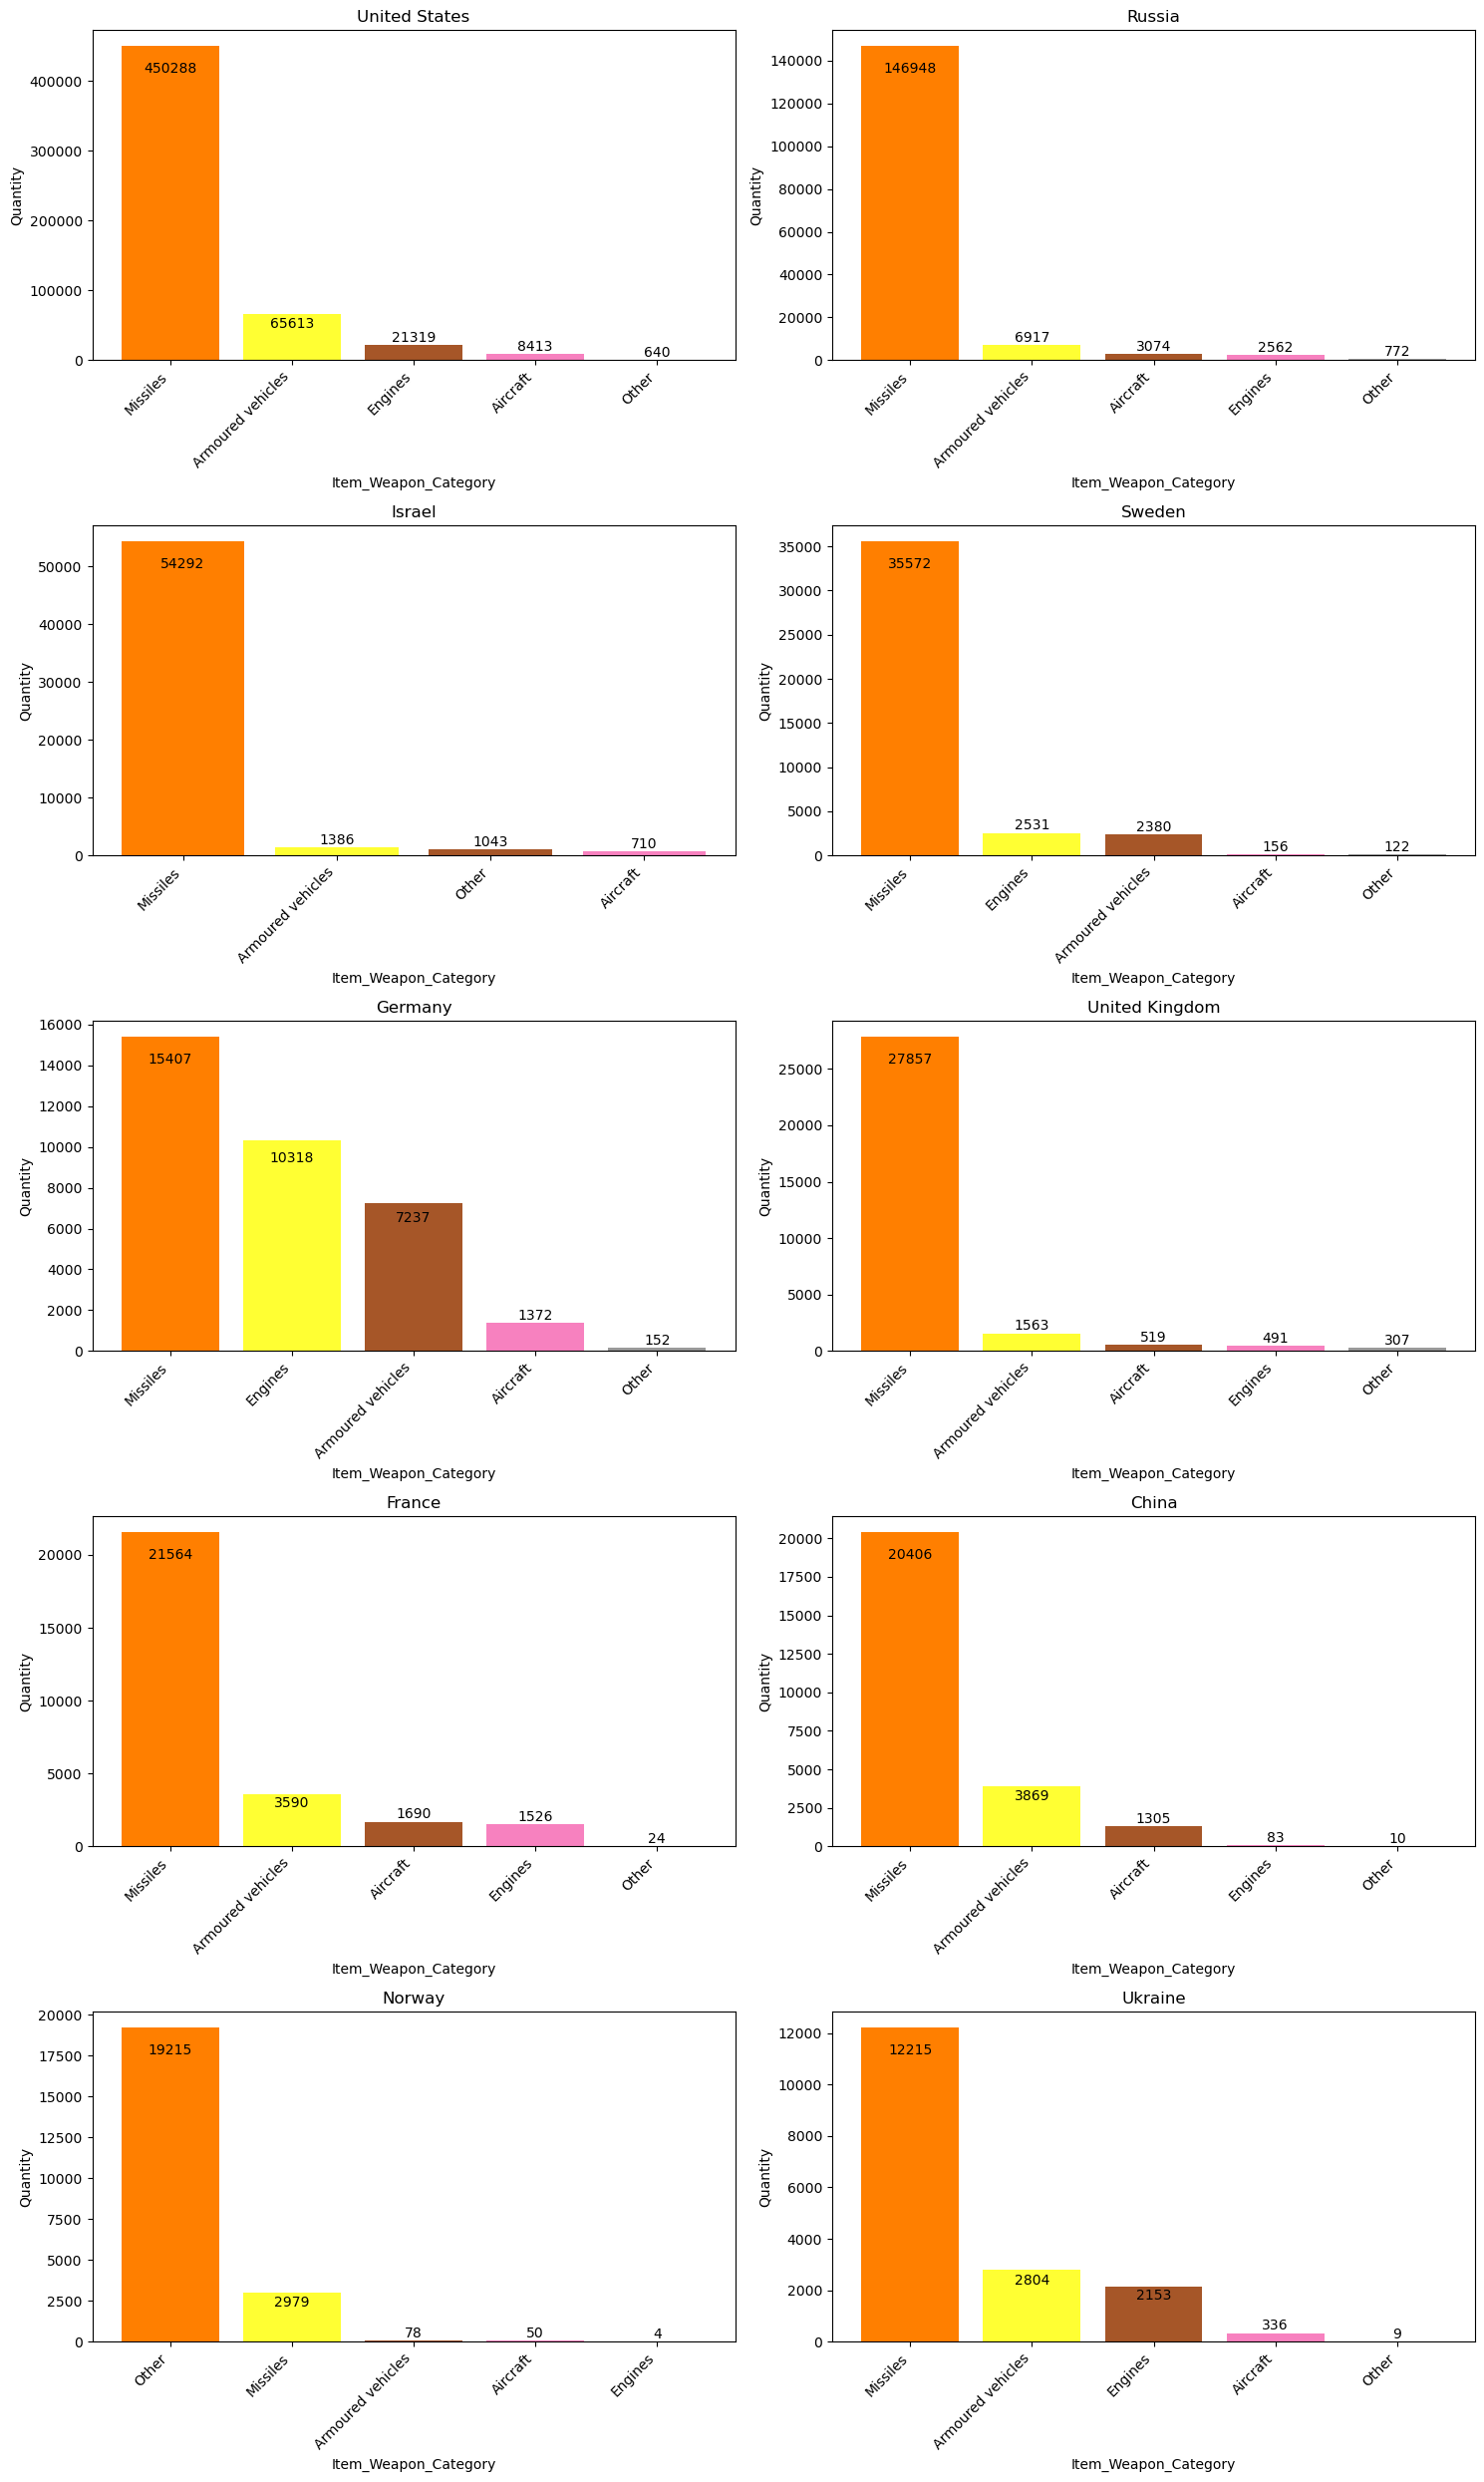

In [78]:
# Get unique top 10 exporting countries
exporting_countries = result['Exporting_Country'].unique()

# Create subplots (5 rows, 2 columns)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
axes = axes.flatten()  # Flatten for easy iteration

color_palette = ['#FF7F00', '#FFFF33', '#A65628', '#F781BF', '#999999']

# Loop through each exporting country and plot its exported weapon categories
for i, country in enumerate(exporting_countries):
    ax = axes[i]

    # Filter data for the current country
    country_data = result[result['Exporting_Country'] == country]

    # Sort data for better visualization
    country_data = country_data.sort_values(by='No_Of_Quantity', ascending=False)
    
    colors = color_palette[:len(top_items)]

    # Plot bar chart
    bars = ax.bar(country_data['Item_Weapon_Category'], country_data['No_Of_Quantity'], color=colors)

    # Add quantity labels inside the bars
    for bar in bars:
        height = bar.get_height()
        if height > max(country_data['No_Of_Quantity']) * 0.1:  # If bar is big, place label inside
            ax.text(bar.get_x() + bar.get_width()/2, height - (height * 0.05), str(int(height)), 
                    ha='center', va='top', fontsize=10, color='black')
        else:  # If bar is small, place label outside
            ax.text(bar.get_x() + bar.get_width()/2, height + (height * 0.02), str(int(height)), 
                    ha='center', va='bottom', fontsize=10, color='black')

    # Set labels and title
    ax.set_title(country)
    ax.set_xlabel('Item_Weapon_Category')
    ax.set_ylabel('Quantity')
    ax.set_xticklabels(country_data['Item_Weapon_Category'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Observation :

- United States is the absolute leader across almost all weapon categories, especially Missiles & Armoured Vehicles.
- Russia follows closely, with strong performance in Missiles & Aircraft.
- Israel stands out for Missiles, but also exports niche equipment like Sensors & Other.
- European countries (Germany, France, UK, Sweden) show diversified portfolios but smaller volumes compared to the U.S./Russia.
- China’s exports are focused on Missiles & Armoured Vehicles, with minimal contribution to engines or sensors.

# 21
**Top 10 Importing Country from Each Continent :**

In [79]:
# Step 1: Group by Continent & Importing Country, then sum quantity
continent_country_quantity = df.groupby(['Importing_Continent', 'Importing_Country'], as_index=False)['No_Of_Quantity'].sum()

# Step 2: Get total quantity per continent
continent_total_quantity = continent_country_quantity.groupby('Importing_Continent', as_index=False)['No_Of_Quantity'].sum()

# Step 3: Sort continents by total quantity (most importing continent first)
continent_total_quantity = continent_total_quantity.sort_values('No_Of_Quantity', ascending=False)

# Step 4: Get top 10 importing countries per continent in the sorted order
top_10_countries_per_continent = (
    continent_country_quantity
    .merge(continent_total_quantity, on='Importing_Continent', suffixes=('', '_Total'))  # Merge to retain order
    .sort_values(['No_Of_Quantity_Total', 'Importing_Continent', 'No_Of_Quantity'], ascending=[False, True, False])
    .groupby('Importing_Continent')
    .head(10)  # Selects top 10 per continent
)

# Step 5: Display result without tabulate
print("\nTop 10 Importing Countries from Each Continent (Sorted by Total Import Volume)\n")
print(top_10_countries_per_continent[['Importing_Continent', 'Importing_Country', 'No_Of_Quantity']].to_string(index=False))


Top 10 Importing Countries from Each Continent (Sorted by Total Import Volume)

Importing_Continent              Importing_Country  No_Of_Quantity
               Asia                   Saudi Arabia          104388
               Asia                          India           89635
               Asia           United Arab Emirates           69447
               Asia                         Israel           42874
               Asia                           Iraq           37870
               Asia                       Pakistan           26556
               Asia                    Afghanistan           24676
               Asia                         Turkey           17230
               Asia                          Qatar           16344
               Asia                    South Korea           13887
             Europe                        Ukraine           93272
             Europe                         Poland           54307
             Europe                 United Kingd

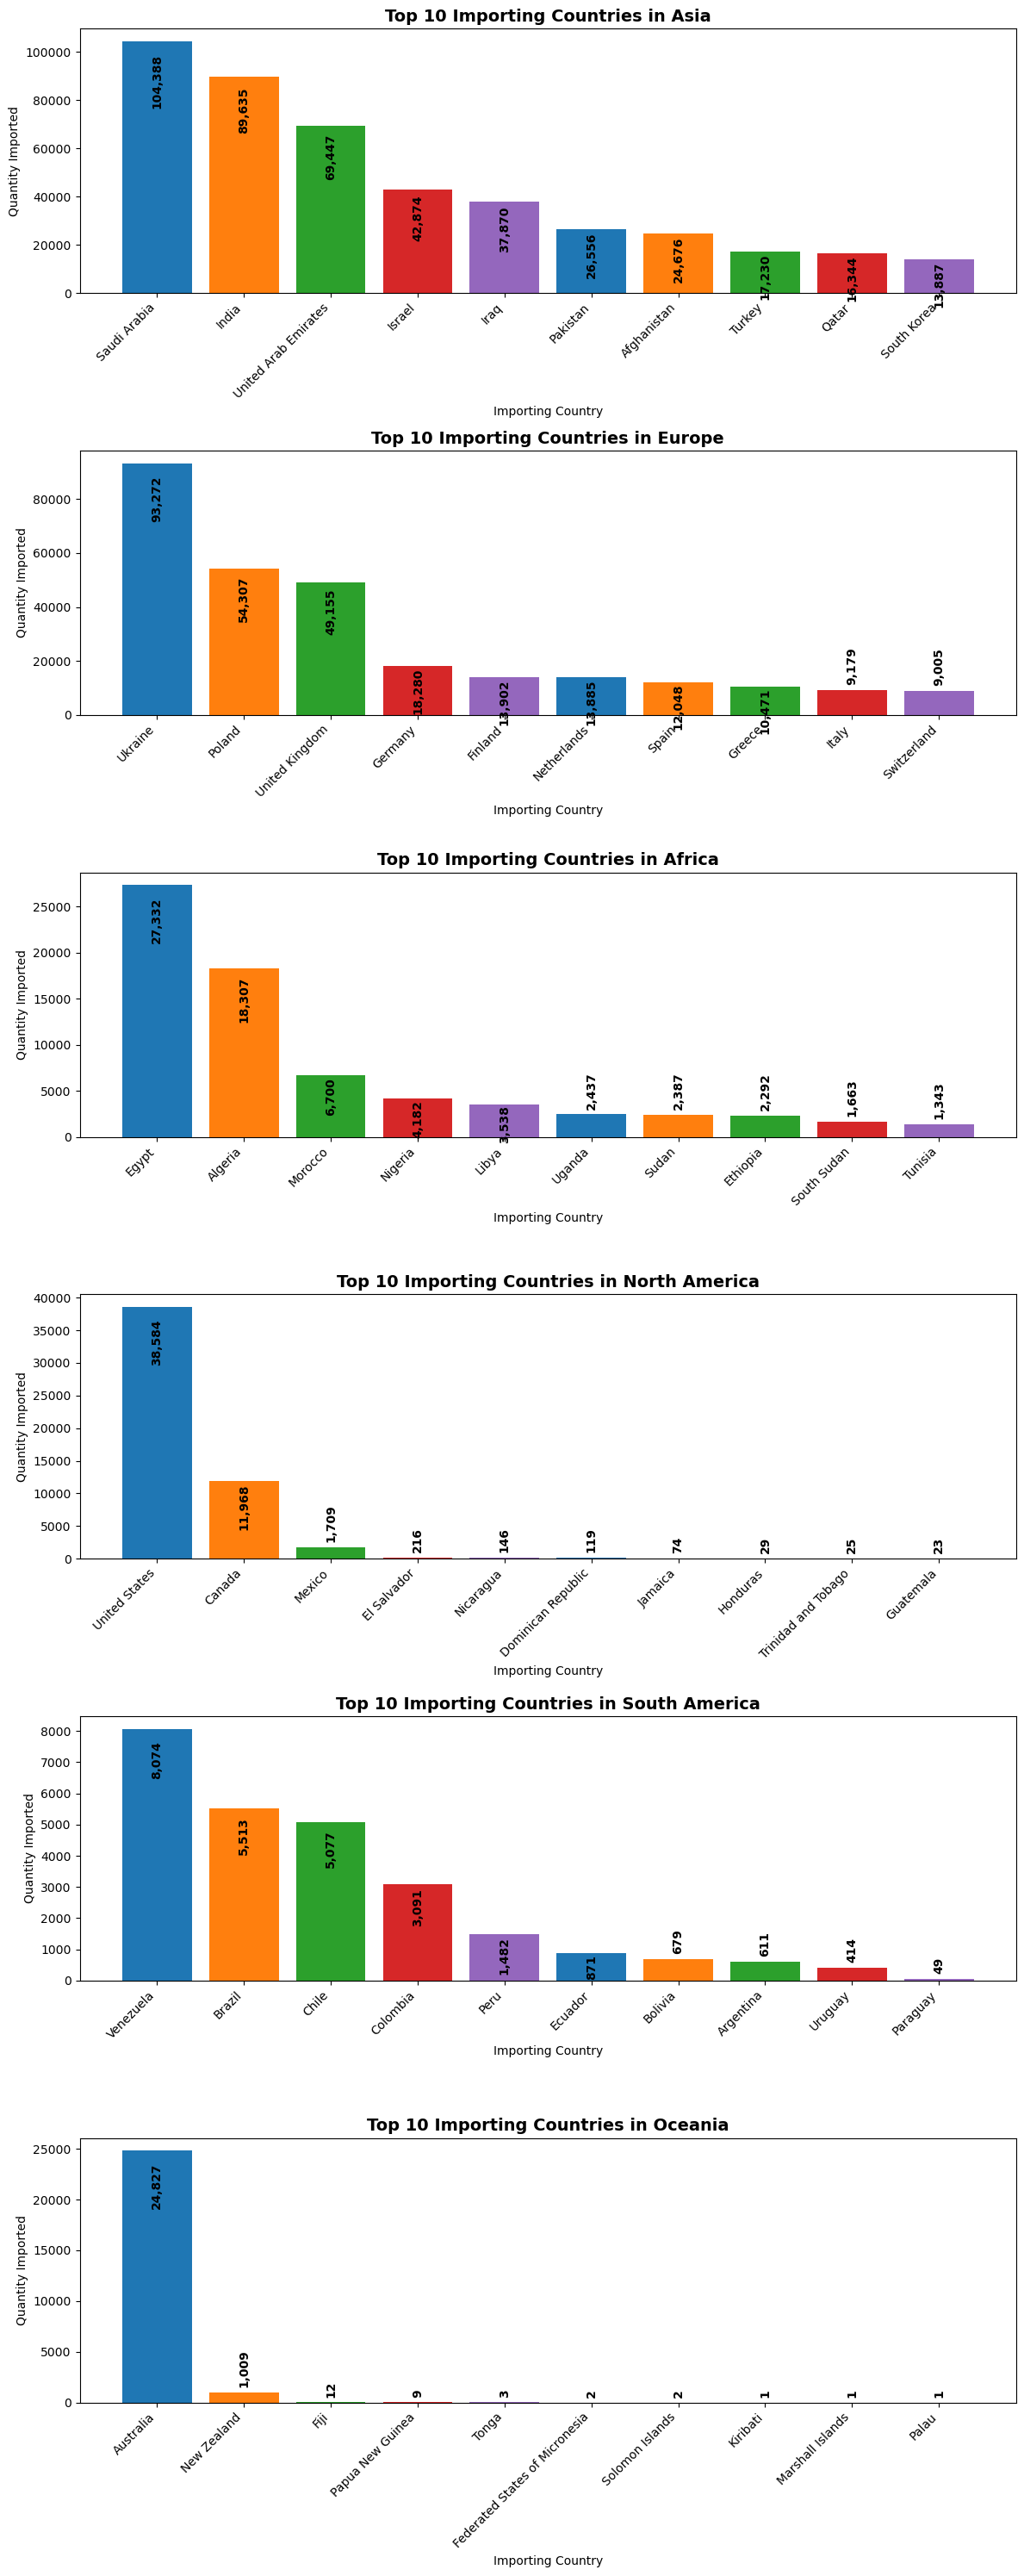

In [80]:
# Get unique continents sorted by total import quantity
continents = top_10_countries_per_continent['Importing_Continent'].unique()

# Create subplots (one for each continent)
fig, axes = plt.subplots(nrows=len(continents), ncols=1, figsize=(12, 5 * len(continents)))

# Ensure axes is iterable (needed if only one continent)
if len(continents) == 1:
    axes = [axes]

color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Loop through each continent and plot its top 10 importing countries
for i, continent in enumerate(continents):
    ax = axes[i]  # Select subplot

    # Filter data for the current continent
    continent_data = top_10_countries_per_continent[top_10_countries_per_continent['Importing_Continent'] == continent]

    # Sort for better visualization
    continent_data = continent_data.sort_values(by='No_Of_Quantity', ascending=False)

    colors = color_palette[:len(top_items)]

    # Plot bar chart
    bars = ax.bar(continent_data['Importing_Country'], continent_data['No_Of_Quantity'], color=colors)

    # Add quantity values on bars at the edge (inside for big bars, outside for small bars)
    for bar in bars:
        height = bar.get_height()
        xpos = bar.get_x() + bar.get_width() / 2  # Center position

        if height > continent_data['No_Of_Quantity'].max() * 0.1:  # Inside for big bars
            ax.text(xpos, height * 0.95, f'{int(height):,}', 
                    ha='center', va='top', fontsize=10, fontweight='bold', color='black', rotation=90)
        else:  # Outside for small bars
            ax.text(xpos, height + (continent_data['No_Of_Quantity'].max() * 0.02), f'{int(height):,}', 
                    ha='center', va='bottom', fontsize=10, fontweight='bold', color='black', rotation=90)

    # Labels and title
    ax.set_title(f"Top 10 Importing Countries in {continent}", fontsize=14, fontweight='bold')
    ax.set_ylabel('Quantity Imported')
    ax.set_xlabel('Importing Country')
    ax.set_xticklabels(continent_data['Importing_Country'], rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

# Observation :

- Asia dominates global imports, with Saudi Arabia, India, and UAE being massive buyers—indicating regional insecurity driving purchases.
- Europe—Ukraine, Poland, and the UK are top buyers, likely influenced by recent geopolitical events (e.g., Russia-Ukraine conflict).
- Africa’s import demand is smaller, concentrated in countries like Egypt, Algeria, and Morocco.
- North America—surprisingly, the U.S. itself is a notable importer, alongside Canada.
- South America and Oceania show modest import volumes, led by Venezuela, Brazil, and Australia.

# 22
**Top 10 Exporting Country from Each Continent :**

In [81]:
# Step 1: Group by Continent & Exporting Country, then sum quantity
continent_country_quantity = df.groupby(['Exporting_Continent', 'Exporting_Country'], as_index=False)['No_Of_Quantity'].sum()

# Step 2: Get total quantity per continent
continent_total_quantity = continent_country_quantity.groupby('Exporting_Continent', as_index=False)['No_Of_Quantity'].sum()

# Step 3: Sort continents by total quantity (most exporting continent first)
continent_total_quantity = continent_total_quantity.sort_values('No_Of_Quantity', ascending=False)

# Step 4: Get top 10 exporting countries per continent in the sorted order
top_10_countries_per_continent = (
    continent_country_quantity
    .merge(continent_total_quantity, on='Exporting_Continent', suffixes=('', '_Total'))  # Merge to retain order
    .sort_values(['No_Of_Quantity_Total', 'Exporting_Continent', 'No_Of_Quantity'], ascending=[False, True, False])
    .groupby('Exporting_Continent')
    .head(10)  # Selects top 10 per continent
)

# Step 5: Display result without tabulate
print("\nTop 10 Exporting Countries from Each Continent (Sorted by Total Export Volume)\n")
print(top_10_countries_per_continent[['Exporting_Continent', 'Exporting_Country', 'No_Of_Quantity']].to_string(index=False))


Top 10 Exporting Countries from Each Continent (Sorted by Total Export Volume)

Exporting_Continent    Exporting_Country  No_Of_Quantity
      North America        United States          554986
      North America               Canada           10724
      North America   Dominican Republic               3
      North America           Costa Rica               2
      North America               Panama               2
      North America              Bahamas               1
      North America               Mexico               1
             Europe               Russia          162138
             Europe               Sweden           41374
             Europe              Germany           35818
             Europe       United Kingdom           32764
             Europe               France           30764
             Europe               Norway           22491
             Europe              Ukraine           18184
             Europe                Italy           11160
       

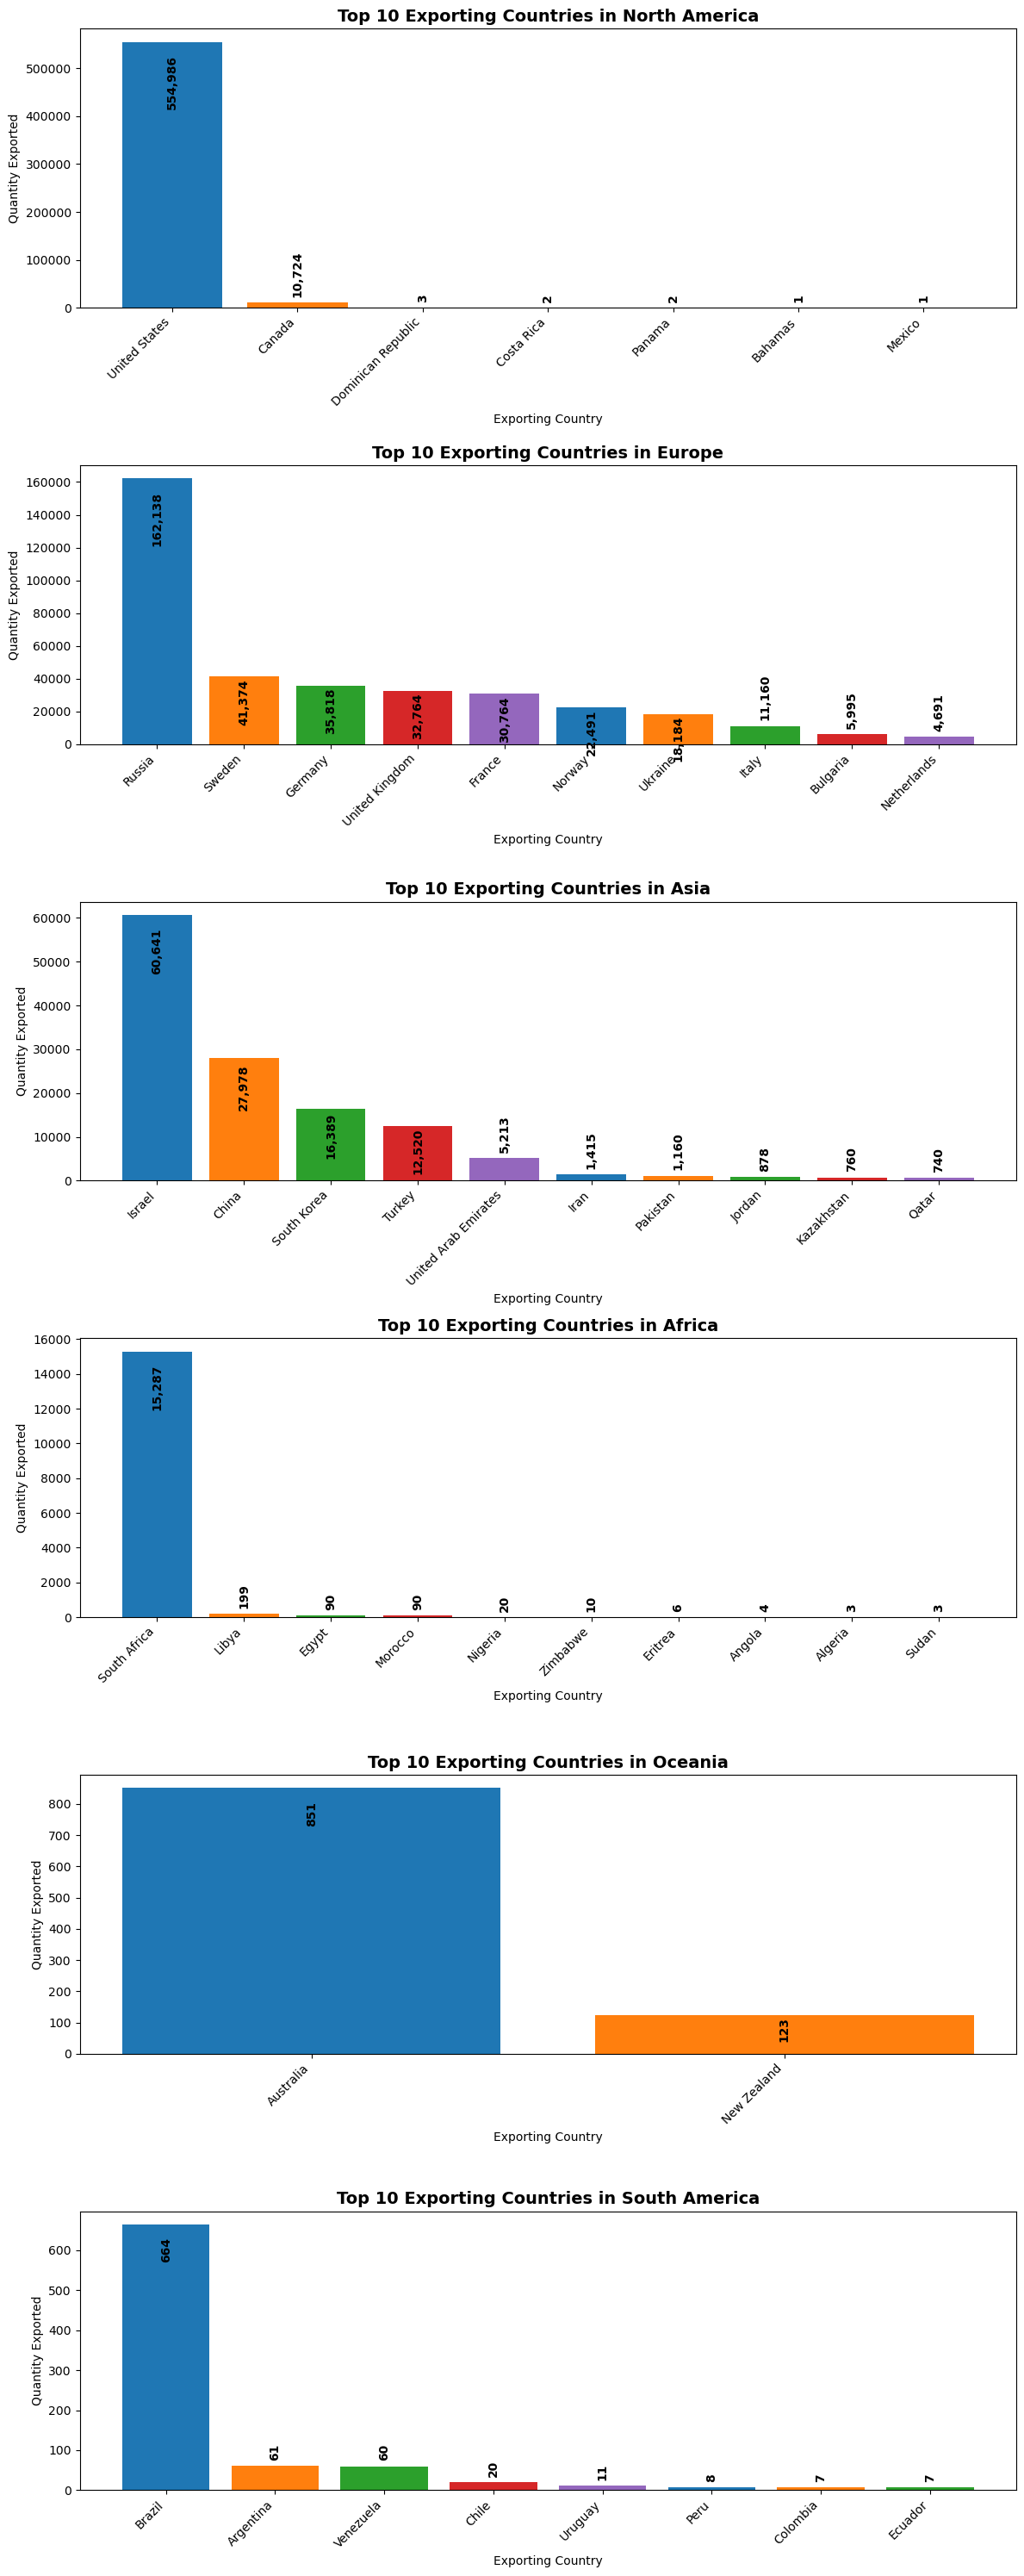

In [82]:
# Get unique continents sorted by total import quantity
continents = top_10_countries_per_continent['Exporting_Continent'].unique()

# Create subplots (one for each continent)
fig, axes = plt.subplots(nrows=len(continents), ncols=1, figsize=(12, 5 * len(continents)))

# Ensure axes is iterable (needed if only one continent)
if len(continents) == 1:
    axes = [axes]

color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Loop through each continent and plot its top 10 importing countries
for i, continent in enumerate(continents):
    ax = axes[i]  # Select subplot

    # Filter data for the current continent
    continent_data = top_10_countries_per_continent[top_10_countries_per_continent['Exporting_Continent'] == continent]

    # Sort for better visualization
    continent_data = continent_data.sort_values(by='No_Of_Quantity', ascending=False)
    
    colors = color_palette[:len(top_items)]

    # Plot bar chart
    bars = ax.bar(continent_data['Exporting_Country'], continent_data['No_Of_Quantity'], color=colors)

    # Add quantity values on bars at the edge (inside for big bars, outside for small bars)
    for bar in bars:
        height = bar.get_height()
        xpos = bar.get_x() + bar.get_width() / 2  # Center position

        if height > continent_data['No_Of_Quantity'].max() * 0.1:  # Inside for big bars
            ax.text(xpos, height * 0.95, f'{int(height):,}', 
                    ha='center', va='top', fontsize=10, fontweight='bold', color='black', rotation=90)
        else:  # Outside for small bars
            ax.text(xpos, height + (continent_data['No_Of_Quantity'].max() * 0.02), f'{int(height):,}', 
                    ha='center', va='bottom', fontsize=10, fontweight='bold', color='black', rotation=90)

    # Labels and title
    ax.set_title(f"Top 10 Exporting Countries in {continent}", fontsize=14, fontweight='bold')
    ax.set_ylabel('Quantity Exported')
    ax.set_xlabel('Exporting Country')
    ax.set_xticklabels(continent_data['Exporting_Country'], rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

# Observation :

- United States (North America) is the dominant global exporter, contributing more than half a million units.
- Russia, Sweden, Germany, and France lead European exports, with distinct specializations (e.g., missiles for Russia, vehicles for Germany).
- Israel and China lead Asian exports, with South Korea and Turkey also significant.
- South Africa is the only major African exporter.
- Australia leads Oceania exports, but at very low volumes.
- South American exports are minimal and fragmented, led by Brazil, Argentina, and Venezuela.

# Overall Key Insights & Summary — Global Arms Trade Analysis (2000-2023)

## 🌐 Global Arms Trade Landscape
- Covering **2000 to 2023**, the dataset reveals **over 1.28 million weapons units** traded globally.
- The global arms market remains **highly concentrated** — top 5 exporters (US, Russia, Israel, Sweden, Germany) account for over **75% of all exports**.
- The **United States alone contributes 43% of global arms exports**, cementing its status as the dominant global supplier.

---

## 💰 Import Hotspots — Geopolitical Drivers
- Across the 23-year period, **Asia and the Middle East consistently lead global arms imports**, driven by:
    - **Regional conflicts** (Middle East wars, India-Pakistan tensions, China’s military rise).
    - **Defense modernization** programs in Gulf states, India, and Southeast Asia.
- **Saudi Arabia, India, UAE, Israel, and Iraq** are **top importers**, with surges around key geopolitical events (2003 Iraq War, post-2011 Arab Spring, Syrian Civil War).

---

## ⚔️ Export Trends — Dominant Weapon Categories
- **Missiles dominate exports** across nearly all top suppliers, underlining the emphasis on **strike capabilities and deterrence**.
- Other high-export categories:  
    - **Armoured vehicles** (ground warfare essentials).  
    - **Aircraft** (air superiority and transport needs).  
    - **Engines and sensors**, critical components in multi-platform weapon systems.
- The **US excels across all categories**, while some smaller nations (like **Norway** and **South Africa**) have niche strengths (sensors, light vehicles).

---

## 📈 Trend Shifts Over Time (2000-2023)
- **2000-2010:** Gradual increase driven by **post-9/11 security build-ups**, **Iraq War**, and rising Asian defense budgets.
- **2011-2015:** Sharp **surge in demand**, particularly from the Middle East due to **Arab Spring fallout**, Syrian conflict, and **Iranian threat perceptions**.
- **2016-2020:** Stable high demand, fueled by **India-China tensions**, Gulf state rearmament, and renewed European defense investments after **Crimea (2014)**.
- **2020-2023:** Slight slowdown due to **pandemic disruptions**, but quickly rebounding in **Eastern Europe and Asia**, driven by **Ukraine war** and **China’s Pacific assertiveness**.

---

## 🌍 Regional Trade Dynamics
- **North America & Europe dominate exports**, collectively supplying over 70% of global arms.
- **Asia & Middle East dominate imports**, accounting for nearly 65% of total arms flows.
- **Africa and South America** play relatively **minor roles** but show interest in **cost-effective land and air systems**.
- **Oceania**, led by **Australia**, focuses heavily on advanced **aircraft and naval systems**.

---

## 🏅 Top Exporting Countries (2000-2023)
- **United States & Russia** form a long-standing **duopoly**, with complementary strengths:
    - US: **High-tech, premium systems** (aircraft, missiles, sensors).
    - Russia: **Affordable, rugged equipment** (armoured vehicles, artillery, missiles).
- **Israel & Sweden** emerge as agile niche players, leveraging technological innovation (drones, precision munitions).
- **China & South Korea** rise as **price-competitive alternatives**, especially for developing nations.

---

## 🔥 Emerging Trends
- Strong **demand growth for drones, air defence systems, and cyber-integrated sensors**, especially post-2015.
- Buyers increasingly prefer **technology transfers and local assembly** rather than direct imports — especially in **India, Turkey, and Saudi Arabia**.
- **Niche exporters (like Turkey & South Korea)** gaining ground in price-sensitive segments.

---

## 🚨 Conflict-Driven Demand Spikes
- Every major **geopolitical flashpoint** is reflected in **import surges**:
    - **2003 Iraq War** — Gulf states rearm.
    - **2014 Crimea Crisis** — Eastern Europe import spike.
    - **2015 Yemen Conflict** — Saudi & UAE bulk purchases.
    - **2022 Ukraine Invasion** — Europe races to rearm.
- **Asia-Pacific rearmament** is continuous, driven by:
    - **China-India border tensions**.
    - **South China Sea militarization**.
    - **North Korean missile threats**.

---

## 💼 Supply Chain Observations
- Global arms trade follows **tight bilateral corridors**:
    - US to **NATO and Gulf allies**.
    - Russia to **CIS states and key Asian partners**.
    - Europe to **NATO partners and Middle East buyers**.
- **Component dependence** (like engines, sensors, electronics) creates hidden vulnerabilities, pushing countries to diversify sources.

---

## 🚀 Key Takeaways for Strategic Analysis
- **US remains unmatched**, but **China, Turkey, South Korea** are the rising challengers.
- Arms trade flows **mirror geopolitics** — any regional tension translates directly into increased arms transfers.
- Future trends to watch:
    - **Increased tech transfers/local assembly**.
    - **Autonomous weapon systems (drones, AI-integrated platforms)**.
    - **Shift toward multi-source procurement to reduce single-source dependency**.